# Face Recognition Project

**финальный проект курса Deep Learning School:** [Deep Learning (семестр 1, осень 2024)](https://stepik.org/course/212774/)  
**выполнил:** Лунов Михаил (telegram: @mlunov)

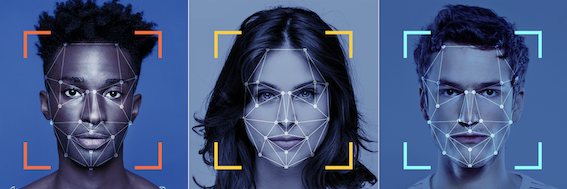

<a name="content"></a>
## Содержание:

- [О проекте](#about_project)
  - [Сведения о проекте](#project_info)
  - [Пути реализации](#ways_to_solve)
- [Постановка задачи и план решения](#problem_statement)
- [Part 1. Face Detection (Детекция лица)](#part1)
  - [1.1. Реализация модели по детекции лиц](#1.1)
- [Part 2. Face Alignment (Выравнивание лица)](#part2)
  - [2.1. Обучение нейросети для поиска ключевых точек лица и его выравнивания](#2.1)
- [Part 3. Face Recognition (Распознавания лица)](#part3)
  - [3.1. Обучение нейросети на CE loss](#3.1)
  - [3.2. Оценка Identification Rate Metric](#3.2)
  - [3.3. Обучение нейросети на ArcFace loss](#3.3)
  - [3.4. Исследование пространства полученных эмбеддингов](#3.4)
  - [3.5. Обучение нейросети на Triplet loss](#3.5)
  - [3.6. Обучение нейросети на смеси ArcFace loss и Triplet loss](3.6)
  - [Заключение](#conclusion)
- [Приложение](#appendix)

<a name="about_project"></a>
## О проекте
[к содержанию](#content)


<a name="project_info"></a>
### Сведения о проекте 
[к содержанию](#content)

**Про что проект:** 
- Разработка пайплайна для задачи Face Recognition. 

**Краткое описание сути и самый интересный момент в проекте:**
- Этот проект больше исследовательский, направленный на изучение новой архитектуры нейросети, чтения статей и постановки экспериментов. Он как раз примечателен своим исследовательским акцентом.

**Что нужно будет сделать? Образ итогового результата:**
- Разобраться в том, как работает пайплайн для задачи распознавания лиц. Реализовать основные компоненты: нейросети, лосс-функции, метрики качества. Исследовать литературу по задаче, разобраться в техниках улучшения пайплайна.

**Основные этапы:**
    
    Основная часть:
    1) Изучить литературу, разобраться в том, как работают системы распознавания лиц
    2) Выбрать и скачать датасет
    3) Обучить нейросеть для распознавания лиц (третий из трех этапов пайплайна) на лицах, которые уже детектированы и заалайнены;
    4) Реализовать метрику качества ID rate, проверить точность распознавания сетей
    5) Поставить эксперименты с разными лосс-функциями
    6) Сделать выводы
    
    Дополнительная часть:
    1) Изучить разные лосс-функции: ArcFace, TripletLoss и другие. Обучить сеть с их помощью
    2) Обучить сеть для элайна фото лиц.
    3) Обучить свою сеть для детекции лиц на фото, собрать весь пайплайн из сетей для детекции, элайна и распознавания;
    4) Исследовать литературу по распознаванию лиц, сделать обзор современных улучшений. Реализовать их на выбор.
    5) Исследовать распределение выученных эмбеддингов лиц

 
 **Предварительные критерии оценивания:**
 
    Основная часть — 6 баллов:
        - Обучение нейросети для распознавания лиц — 2 балла;
        - Реализация метрики ID rate — 2 балла;
        - Эксперименты с лосс-функциями — 2 балла.
    
    Дополнительные части:
        - 1-2 балла каждое, в зависимости от сложности.
    
    Максимум по проекту можно будет получить 10 баллов. 

 
**Ссылки на ресурсы для более подробного чтения:**

 - Face recogtinion pipeline clearly explained (medium): https://medium.com/backprop-labs/face-recognition-pipeline-clearly-explained-f57fc0082750
 - Как работает распознавание лиц: https://trends.rbc.ru/trends/industry/6050ac809a794712e5ef39b7
 - Face landmark detection using PyTorch: https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4
 - Face detection in Python: https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/
 - Пример метрики для подсчета качества систем распознавания лиц: http://www.eecs.qmul.ac.uk/~sgg/papers/ChengEtAl_PR2020.pdf (секция 3.2.3)

 
Если есть вопросы, пишите @atmyre

<a name="ways_to_solve"></a>
### Пути реализации 
[к содержанию](#content)

#### Задача проекта
В целом, **задача проекта — реализовать один или несколько частей системы распознавания лиц**. Вот что можно делать:

- (2 балла, обязательная часть!) Обучить нейросеть для 3 части пайплайна (распознавание лиц) на CE loss. Для этого можно использовать нейросети, предобученные на ImageNet. Нельзя брать нейросети, которые уже предобучены на распознавание лиц! Добиться достаточного качества классификации.
- (2 балла) Обучить нейросеть для поиска ключевых точек лица и написать код, который принимает на вход фотографию лица и возвращает выровненное лицо на основе найденных точек (т.е. реализовать вторую часть пайплайна face recognition);
- (2 балла) Собрать весь пайплайн распознавания лиц. Этому пайплайну должно быть можно подать на вход картинку с лицами, и пайплайн должен возвращать эмбеддинги всех найденных лиц. Хорошо будет продемонстрировать работу вашего пайплайна на паре лиц одинаковых и разных людей с подсчетом метрики расстояния между их эмбеддингами. В пайплайне можно использовать предобученную сеть для детекции лиц, или же обучить свою;
- (2 балла) Реализовать Identification Rate Metric (ниже дан щаблон кода для него и ячейки для тестирования);
- (2 балла) Реализовать ArcFace loss, обучить сеть с нуля на нем. Добиться достаточного качества классификации;
- (2 балла) Реализовать Triplet loss, обучить сеть с нуля на нем. Добиться достаточного качества классификации;
- (1 балл) Обучить сеть на смеси ArcFace loss и Triplet loss. Добиться достаточного качества классификации;
- (2 балла) Исследовать литературу, статьи по Face Recognition, написать literature review с обзором современных методов, улучшений сети и пайплайна.
- (2 балла) Исследовать пространство полученных эмбеддингов. Например, как в случае Arcface Loss расположены эмбеддинги на сфере? Где расположены эмбеддинги картинок-аутлаеров? (например, если лицо на картинке сильно смазано или почти не видно. Или это вообще не картинка лица). Как еще можно исследовать модель?
- Улучшить сеть с помощью разных трюков. Например, попробовать другие лосс-функции, поискать статьи с разными улучшениями и попробовать что-то закодить. Баллы тут зависят от сложности улучшения и вашей иреализации.

Пожалуйста, пишите подробные комментарии к своему коду. Вставляйте ссылки на статьи, где нашли какие-то трюки. Объясняйте, почему реализовали что-то именно так. Будет классно, если вы опишете свой путь в экспериментах при работе с оубчением модели или Triplet Loss.


#### Данные. Какие данные можно использовать для выполнения проекта

Для третьей части пайплайна (нейросети для распознавания лиц) есть такие варианты:
- Использовать данные лиц 500 людей CelebA-500. Они уже выровнены. Скачать можно тут: https://disk.yandex.ru/d/S8f03spLIA1wrw
    Внутри:
        - celebA_imgs — папка с выровненными картинками;
        - celebA_anno.txt — файл с аннотацией — каждой картинке из celebA_imgs поставлен в соответствие ее id;
        - celebA_train_split.txt — файл со сплитом на train/val/test.
    Эти данные — часть открытого датасета [CelebA](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmmlab.ie.cuhk.edu.hk%2Fprojects%2FCelebA.html), который один из стандартных для обучения моделей, связанных с лицами.
- Использовать любые другие данные. Например, можно взять больше картинок из [CelebA](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmmlab.ie.cuhk.edu.hk%2Fprojects%2FCelebA.html). Или вот еще один популярный датасет: [LFW](https://colab.research.google.com/corgiredirector?site=http%3A%2F%2Fvis-www.cs.umass.edu%2Flfw%2F). Обращайте внимание на то, выровнены ли лица в том датасете, который вы скачиваете, и кропайте картинки так, чтобы на них оставалось преимущественно лицо.


Может быть удобно сначала проверить вашу сеть на данных CelebA-500, а затем переходить к ее обучению на большем датасете.

Для обучения других частей пайплайна данные нужно выбрать самим. Разные части пайплайна можно обучать на разных данных. Но нужно, чтобы затем весь пайплайн хорошо работал на новых лицах.

- Для тестирования кода Identification Rate Metric также подготовлены [данные из CelebA](https://disk.yandex.com/d/KN4EEkNKrF_ZXQ), которые выровнены точно так же, как картинки из CelebA-500. Эти данные уже разбиты на query и distractors, и в отдельном файле также находится информация о классах для картинок из query. Если вы обучили нейросеть на датасете CelebA-500, можете ее тестировать с помощью этих данных. 

    Если вы обучали нейросеть на других данных, то вам нужно сделать данные для тестирования самому. Делается это примерно так:
    - Выбраете несколько id, которые не использовались при тренировке моделей, и помещаете их в query set;
    - Выбираете несколько id, которые не использовались при тренировке моделей и не входят в query, и помещаете их в distractors set. Обычно distractors set должен быть сильно больше, чем query set.
    - Обрабатываете картинки из query и distractors тем же способом, что картинки для обучения сети.
  
    Обратите внимание, что если картинок в query и distractors очень много, то полученных пар картинок в пунктах 1-2-3 алгоритма подсчета TPR@FPR будет очень-очень много. Чтобы код подсчета работал быстрее, ограничивайте размеры этих датасетов. Контролируйте, сколько значений расстояний вы считаете.


#### Критерии оценивания
**Проект оценивается из 10 баллов. Чтобы проект считался сданным, нужно набрать 5 или более баллов.**  Можно выполнять любые части проекта, которые описаны выше, баллы будут суммироваться. Единственная обязательная часть — обучение сети с нуля на CE loss.

Самый простой способ набрать 6 баллов:
- (2 балла) Обучить нейросеть для распознавания лиц на датасете CelebA-500. Чтобы получить два балла, нужно добиться accuracy на тестовой части >0.7;
- (2 балла) Реализовать Identification Rate Metric, протестировать ее на предоставленных данных;
- (2 балла) Реализовать ArcFace loss, обучить сеть с нуля на нем. Добиться accuracy на тестовой части >0.7;

<a name="problem_statement"></a>
## Постановка задачи и план решения
[к содержанию](#content)

### Постановка задачи
Допустим, вы владеете компанией и хотите разработать систему распознавания лиц, чтобы применять ее в своем офисе. Например, чтобы ваши сотрудники могли сканировать лицо вместо прикладывания id карточек к турникетам при входе. Или для обеспечения безопасности в офисах (да, вы — хороший владелец компании, и используете face recognition только для обеспечения безопасности. Никакие данные не собираете, нигде долго не храните и никуда не передаете)  

Получается, вам нужна система, которая может принимать на вход видео, полученное с камер наблюдения, и на выходе выдавать, что за люди были замечены на этом видео. Ваша система должна уметь работать в случаях, когда лица людей запечатлены крупным или мелким планом, когда они чуть повернуты или наклонены, и когда на одном кадре с камеры находятся несколько лиц людей.

Вот решением такой задачи мы сейчас и займемся.

### План решения задачи распознавания лиц

Обычно система распознавания лиц состоит из трех элементов:

- детекция лица (face detection);
- выравнивание лица (face alignment);
- распознавания лица (face recognition).

В данном ноутбуке (на данном этапе) реализована часть 3.

<a name="part1"></a>
## Part 1. Face Detection (Детекция лица)
[к содержанию](#content)

#### Детекция лиц

Пусть мы получили кадр с камеры наблюдения, на котором мы хотим распознать лица. Этот кадр может выглядеть как-то так:

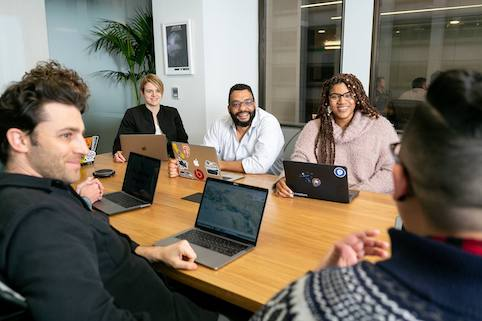

Первый этап обработки фото — детекция лиц на нем. Результат детекции может выглядеть примерно так:

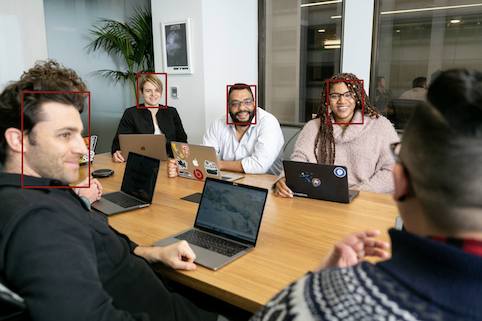

Для детекции лиц на фото может использоваться модель (например, нейросеть), обученная на задачу детекции лиц людей.

<a name="1.1"></a>
### 1.1. Реализация модели по детекции лиц 
[к содержанию](#content) 

**Задача:** 
- Взять предобученную сеть для детекции лиц, или же обучить свою. Это потребуется для того, чтобы можно было подать на вход картинку с лицами, и получить на выходе эмбеддинги всех найденных лиц

<a name="part2"></a>
## Part 2. Face Alignment (Выравнивание лица)
[к содержанию](#content)

#### Выравнивание лиц


После этапа детекции работа с каждым детектированным лицом идет по отдельности
(точнее, с bounding box'ами каждого детектированного лица).

Второй этап — выравнивание лица. Он состоит из двух этапов:
1. На картинке ищутся ключевые точки лица (обычно это координаты зрачков глаз, кончик носа и точки вокруг рта). Для этой задачи используется отдельная модель (возможно, тоже нейросеть). У PyTorch есть [туториал](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) с кодом и описанием того, как подобная модель работает;
2. Повернуть и растянуть изображение так, чтобы точки глаз лица лежали на заданной горизонтальной линии, и чтобы между зрачками глаз было определенное расстояние.
   
Вот так это может выглядеть:

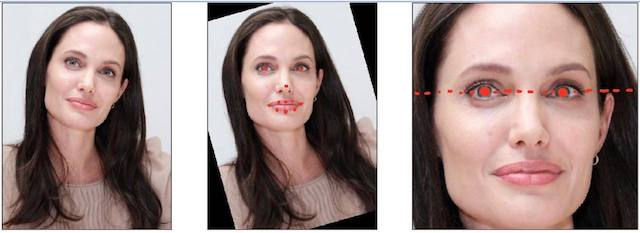

Таким образом, после второго этапа лица выглядят как-то так:

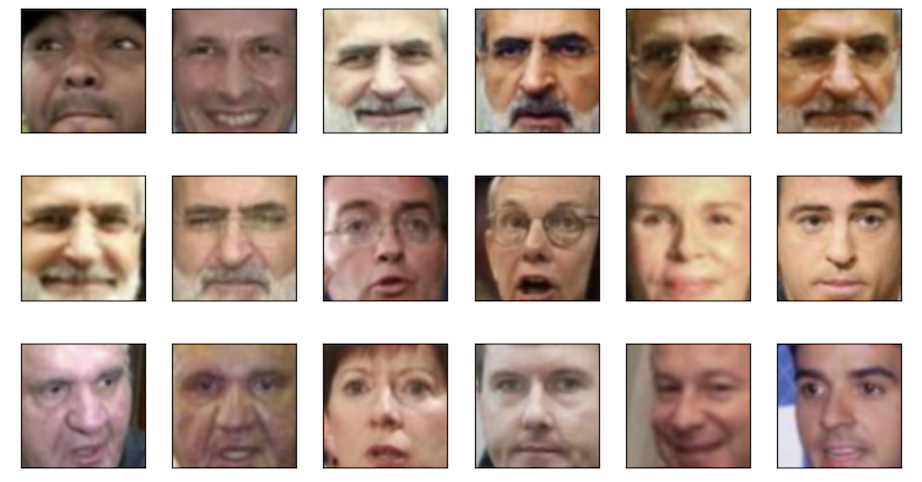

На таких картинках лиц и будет работать третья часть пайплайна — нейросеть, которая распознает лица.

**Зачем нужна стадия выравнивания?** 

Выравнивание лиц датасета делает задачу распознавания лиц проще для модели на третьей стадии пайплайна. Если у всех лиц, которые принимает на вход модель, примерно одинаковый размер и все ключевые части (глаза, нос, рот) находятся в примерно одинаковых местах, это упрощает модели задачу понимания того, что за человек изображен на картинке. Модели не нужно "искать" глаза, рот и т.п. на картинке.

Практика подтверждает, что это сильно улучшает эффективность модели: без стадии выравнивания практически невозможно обучить хорошую систему распознавания лиц. Точнее, возможно, но только если есть очень-очень-очень много обучающих данных. Больше, чем практически у всех даже больших компаний.

<a name="2.1"></a>
### 2.1. Обучение нейросети для поиска ключевых точек лица и его выравнивания. (2 балла) 
[к содержанию](#content) 

**Задача:** 
- Обучить нейросеть для поиска ключевых точек лица и написать код, который принимает на вход фотографию лица и возвращает выровненное лицо на основе найденных точек.  

<a name="part3"></a>
## Part 3. Face Recognition (Распознавания лица)
[к содержанию](#content)

#### Распознавание лиц

Третья часть пайплайна — это, собственно, распознавание лиц.

Что такое "распознавание": мы хотим построить такую нейросеть, которая принимает на вход картинку лица, а выдает вектор определенного размера. И мы хотим, чтобы векторы лиц одного и того же человека были близки по некоторому расстоянию (например, косинусному), а векторы лиц разных людей были далеки по этому же расстоянию. Обычно в качестве расстояния используется [косинусное расстояние](https://en.wikipedia.org/wiki/Cosine_similarity) (cosine distance).

Почему мы хотим построить именно такую сеть? Почему не посмтроить обычную сеть для классификации и научить ее классифицировать лица из обучающей выборки, где каждый отдельный человек — это один класс? Ответ такой — мы хотим, чтобы наша модель умела работать с лицами людей, которых нет в обучающей выборке. Хотим, чтобы она на лица одного и того же незнакомого человека выдавала близкие векторы (т.е. "говорила" нам, что это один и тот же человек), а на лица разных людей — далекие векторы.

Пусть тогда у нас есть база данных людей вида (id, набор векторов его лиц). Когда к нам придет новая картинка лица, мы ее прогоним через модель и получим вектор этого лица. Далее сравним этот вектор по метрике расстояния с векторами из нашей базы. Тот id, чьи векторы будут наиболее близки к нашему, и будет ответом на вопрос "кто изображен на картинке"

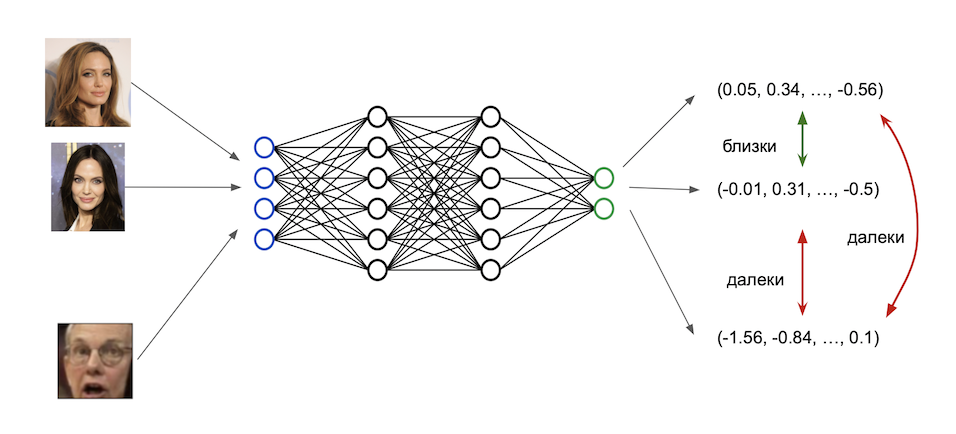

Такую сеть можно обучать разными способами. Два самых распространенных — такие:

1. Можно обучить нейросеть на обучающей выборке лиц на задачу классификации. Каждый отдельный человек — это один класс. В качестве лосс-функции можно использовать стандартную кросс-энтропию или специальные ее модификации (разберем ниже в ноутбуке). Затем, после обучения сети, выкинуть последний слой и считать вектором лица выход предпоследнего слоя сети. Это будет работать: полученные таким образом векторы лиц действительно будут близки для лиц одного и того же человека, и далеки для лиц разных людей. Причем это будет работать даже на тех лицах, которые не было в обучающей выборке (при условии, что обучающая выборка достаточно велика).

    У этого подхода есть недостаток: классов в обучающем датасете может быть очень много. Из-за этого последний слой сети станет очень широким. Это сделает обучение сети вычислительно затратным и сложным по памяти. Иногда приходится этот последний слой делить на несколько разных GPU, настолько он бывает большим.
2.  Можно пойти другим путем: обучать сеть напрямую на задачу "выдавать похожие эмбеддинги для лиц одного и того же человека, и далекие эмбеддинги для лиц разных людей". Это называется **contrastive training**.
    
    На каждой итерации обучения тогда происходит следующее:
    - берется картинка лица, к ней выбирается позитивная пара (еще одна картинка лица того же человека) и негативная (картинка лица другого человека). Все три картинки подаются на вход сети, на выходе получаются три вектора. Далее считается расстояние между векторами 1 и 2 и расстояние между векторами 1 и 3. Нейросеть обучается так, чтобы расстояние между векторами 1 и 2 было как можно меньше, а расстояние между векторами 1 и 3 — как можно больше.

    Лосс-функция в этом случае выглядит так:

    $$L = D(anchor, positive) - D(anchor, negative)$$

    У contrastive loss тоже есть недостаток: его достаточно сложно настроить (подобрать к нему гиперпараметры).

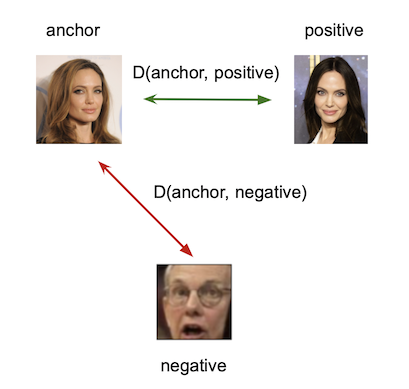

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

from matplotlib import colors
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm import tqdm

sns.set_theme()

<a name="3.1"></a>
### 3.1. Обучение нейросети на CE loss. (2 балла)
[к содержанию](#content) 

**Задача:** 
- обучить нейросеть для распознавания лиц (не обязательно на датасете CelebA-500) на CE loss. Для обучения можно использовать нейросети, предобученные на ImageNet. Нельзя брать нейросети, которые уже предобучены на распознавание лиц. 

**Критерий оценки:** 
- accuracy на тестовой части датасета CelebA-500 > 0.7.

#### Подготовка датасета для dataloader:

In [2]:
# Указываем пути к данным:
images_dir = '/kaggle/input/celeba/celebA_train_500/celebA_train_500/celebA_imgs'
annotations_file = '/kaggle/input/celeba/celebA_train_500/celebA_train_500/celebA_anno.txt'
split_file = '/kaggle/input/celeba/celebA_train_500/celebA_train_500/celebA_train_split.txt'

images_info = pd.merge(
    pd.read_csv(annotations_file, sep='\s+', header=None, names=["img_name", "image_id"]),
    pd.DataFrame(map(lambda x: x.split(), open(split_file, 'r').read().splitlines()), columns = ["img_name", "segment"]),
    on="img_name",
    # how="inner"
)
images_info["segment"] = images_info.segment.replace({"0":"train", "1":"val", "2":"test"})
print(f"dataset size: {images_info.shape[0]} x {images_info.shape[1]}")
display(images_info.head())
print(f"\ndistribution by segment:")
display(images_info["segment"].value_counts())


dataset size: 12011 x 3


img_name  image_id segment
0  000001.jpg         0   train
1  000404.jpg         0   train
2  003415.jpg         0   train
3  004390.jpg         0   train
4  018062.jpg         0   train


distribution by segment:


segment
train    8544
val      1878
test     1589
Name: count, dtype: int64

In [3]:
# разные режимы датасета:
DATA_MODES = ['train', 'val', 'test']

# все изображения будут масштабированы к размеру 224x224 px:
RESCALE_SIZE = 224

# работаем на видеокарте если есть доступ:
train_on_gpu = torch.cuda.is_available()
DEVICE = torch.device('cuda:0' if train_on_gpu else 'cpu')
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


**класс для создания датасетов:**

In [4]:
class CelebADataset(Dataset):
    def __init__(self, images_info, images_dir, mode):
        super().__init__()

        self.mode = mode
        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.images_dir = images_dir
        self.images_info = images_info[images_info.segment == mode]

    def __len__(self):
        return len(self.images_info)

    def __getitem__(self, idx):

        # loading image:
        img_name = os.path.join(self.images_dir, self.images_info.iloc[idx]['img_name'])
        image = np.array(Image.open(img_name))

        # cropping image:
        image = Image.fromarray(image[77:-41, 45:-50])

        # getting label:
        label = self.images_info.iloc[idx]['image_id']  # Или любая метка

        if self.mode == 'train':
            transform = transforms.Compose([
                transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
                transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
                transforms.RandomResizedCrop(RESCALE_SIZE, scale=(0.9, 1.0)),  # Random crop with slight zoom-in effect
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # в соответствии со значениями среднего и стандартного отклонения для моделей, обученных на ImageNet
            ])
        else:
            transform = transforms.Compose([
                transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

        image = transform(image)

        return image, label


# Создание объектов Dataset
train_dataset = CelebADataset(images_info, images_dir, mode="train")
val_dataset = CelebADataset(images_info, images_dir, mode="val")
test_dataset = CelebADataset(images_info, images_dir, mode="test")

# # Создание DataLoader
# BATCH_SIZE = 128
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


**функция для вывода изображений:**

In [5]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """ Imshow for tensors"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

**посмотрим на примеры изображений:**

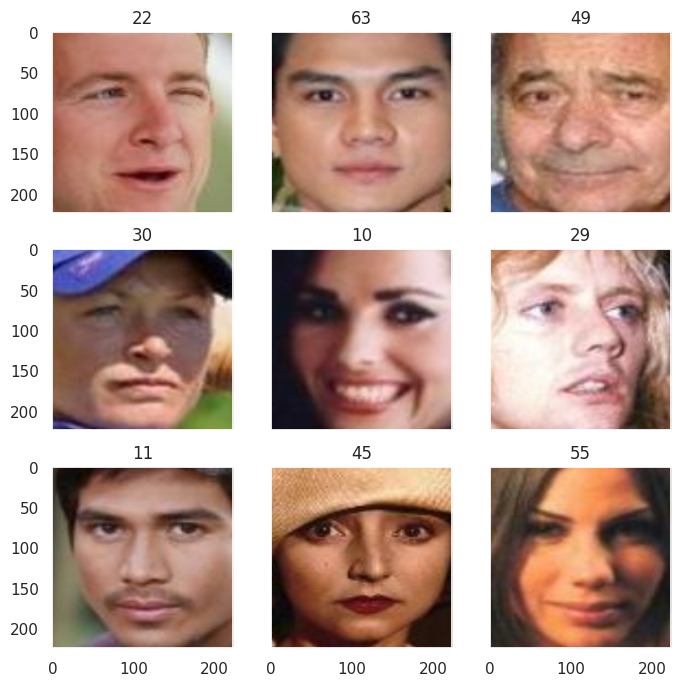

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,300))
    im_val, label = val_dataset[random_characters]
    imshow(im_val.data.cpu(), title=f'{label}',plt_ax=fig_x)

**проверим, что картинкам одного и того же класса соответствует один и тот же человек**

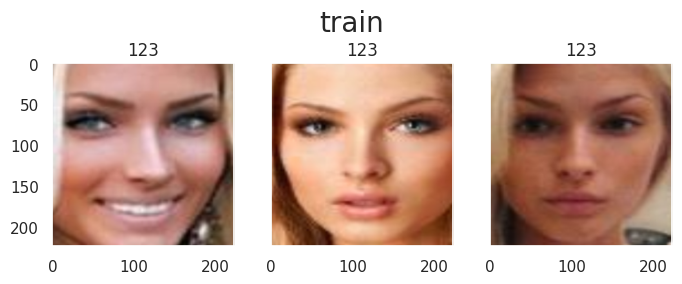

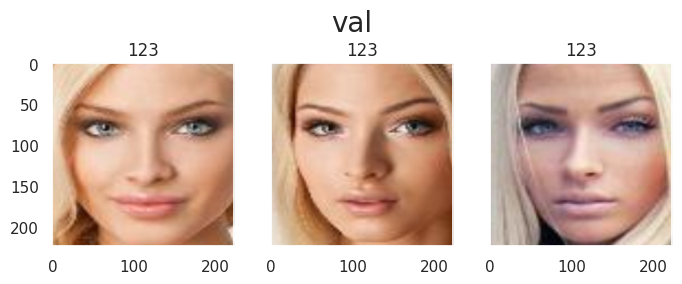

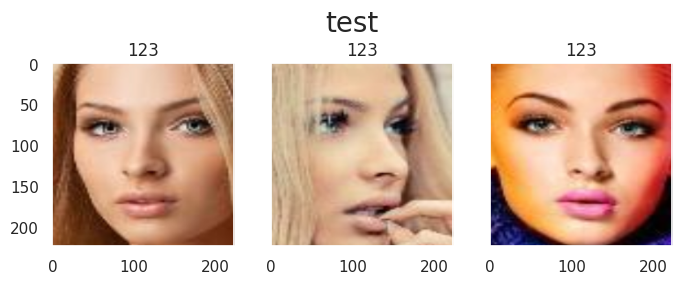

In [7]:
label = 123
for mode, dataset in [("train", train_dataset), ("val", val_dataset), ("test", test_dataset)]:
    dataset_size = len(dataset)
    i = 0

    fig, ax = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(8, 3),
        sharey=True,
        sharex=True
        )

    for fig_x in ax.flatten():
        while dataset[i][1] != label:
            i += 1
        im_val, _ = dataset[i]
        imshow(im_val.data.cpu(), title=f'{label}', plt_ax=fig_x)
        i+=1

    fig.suptitle(f"{mode}", fontsize=20)

#### Обучение нейросети:

- **model:** efficientnet_b1 
- **weights:** IMAGENET1K_V2
- **loss:** CrossEntropyLoss

*Примечание:* в процессе исследования изначально все попытки обучения производились на resnet50 и resnet18, более того с условием Pretrained=True. Как выяснилось потом, [такое задание весов означает](https://pytorch.org/vision/0.20/models.html), что будут использоваться веса версии `IMAGENET1K_V1`. Поэтому было решено переобучить все модели на более новых весах версии `IMAGENET1K_V2`, что действительно дало прирост в точности.
    
На случай если использовать такие веса было нельзя в [приложении](#appendix) сохранены процесс и результат обучения на старых весах с accuracy > 0.7

**выберем сеть для обучения:**

In [8]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNet(nn.Module):
    def __init__(self, n_classes):
        super(EfficientNet, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT) # weights: IMAGENET1K_V2
        
        emb_size = self.net.classifier[1].in_features
        self.net._fc = nn.Linear(emb_size, n_classes)
        # self.net.classifier = nn.Linear(emb_size, n_classes)
    
    def forward(self, x):
        return self.net(x)


n_classes = len(np.unique(images_info.image_id))
print(f"we will classify: {n_classes}")

model = EfficientNet(n_classes)
model = model.to(DEVICE)

we will classify: 500


Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 161MB/s] 


**создадим функцию для обучения:**

In [9]:
torch.autograd.set_detect_anomaly(True)

def train_model(
    model, 
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda'
):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    # Early stopping
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Wrap train_loader with tqdm
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_predictions / total_predictions
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        # Wrap val_loader with tqdm
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels).mean()
                val_running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            # Save model checkpoint
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        print(f'Epoch [{epoch + 1} / {num_epochs}], '
              f'Train Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies

**создадим директорию для сохранения чекпоинтов модели:**

In [10]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

**создадим даталоудер:**

In [11]:
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

**запустим обучение:**

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model, 
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100,
    model_name="efficientnetb1"
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Validation: 100%|██████████| 30/30 [00:07<00:00,  3.97batch/s]


Epoch [1 / 100], Train Loss: 6.0930, Train Accuracy: 2.35%, Validation Loss: 4.8309, Validation Accuracy: 10.81%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.58batch/s]


Epoch [2 / 100], Train Loss: 3.8804, Train Accuracy: 21.76%, Validation Loss: 2.9207, Validation Accuracy: 36.05%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.66batch/s]


Epoch [3 / 100], Train Loss: 2.0532, Train Accuracy: 52.28%, Validation Loss: 2.0635, Validation Accuracy: 55.27%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.74batch/s]


Epoch [4 / 100], Train Loss: 1.0425, Train Accuracy: 73.88%, Validation Loss: 1.7021, Validation Accuracy: 61.18%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.38batch/s]


Epoch [5 / 100], Train Loss: 0.5231, Train Accuracy: 86.60%, Validation Loss: 1.5007, Validation Accuracy: 66.13%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.74batch/s]


Epoch [6 / 100], Train Loss: 0.2958, Train Accuracy: 92.13%, Validation Loss: 1.4762, Validation Accuracy: 66.99%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.73batch/s]


Epoch [7 / 100], Train Loss: 0.1905, Train Accuracy: 95.10%, Validation Loss: 1.4063, Validation Accuracy: 69.70%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.18batch/s]


Epoch [8 / 100], Train Loss: 0.1362, Train Accuracy: 96.68%, Validation Loss: 1.3239, Validation Accuracy: 72.42%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.66batch/s]


Epoch [9 / 100], Train Loss: 0.1028, Train Accuracy: 97.57%, Validation Loss: 1.3375, Validation Accuracy: 71.94%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.87batch/s]


Epoch [10 / 100], Train Loss: 0.0912, Train Accuracy: 97.75%, Validation Loss: 1.3322, Validation Accuracy: 71.62%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.13batch/s]


Epoch [11 / 100], Train Loss: 0.0823, Train Accuracy: 98.00%, Validation Loss: 1.3101, Validation Accuracy: 71.46%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.83batch/s]


Epoch [12 / 100], Train Loss: 0.0788, Train Accuracy: 97.90%, Validation Loss: 1.3629, Validation Accuracy: 71.78%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.61batch/s]


Epoch [13 / 100], Train Loss: 0.0850, Train Accuracy: 97.83%, Validation Loss: 1.3497, Validation Accuracy: 71.99%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.51batch/s]


Epoch [14 / 100], Train Loss: 0.0823, Train Accuracy: 97.76%, Validation Loss: 1.3316, Validation Accuracy: 73.48%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.60batch/s]


Epoch [15 / 100], Train Loss: 0.0399, Train Accuracy: 99.06%, Validation Loss: 1.1129, Validation Accuracy: 77.16%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.73batch/s]


Epoch [16 / 100], Train Loss: 0.0182, Train Accuracy: 99.63%, Validation Loss: 1.0731, Validation Accuracy: 77.74%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.81batch/s]


Epoch [17 / 100], Train Loss: 0.0126, Train Accuracy: 99.78%, Validation Loss: 1.0526, Validation Accuracy: 78.91%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.75batch/s]


Epoch [18 / 100], Train Loss: 0.0101, Train Accuracy: 99.80%, Validation Loss: 1.0453, Validation Accuracy: 78.43%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.73batch/s]


Epoch [19 / 100], Train Loss: 0.0107, Train Accuracy: 99.85%, Validation Loss: 1.0362, Validation Accuracy: 78.49%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.64batch/s]


Epoch [20 / 100], Train Loss: 0.0080, Train Accuracy: 99.87%, Validation Loss: 1.0200, Validation Accuracy: 79.45%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.80batch/s]


Epoch [21 / 100], Train Loss: 0.0082, Train Accuracy: 99.88%, Validation Loss: 1.0120, Validation Accuracy: 79.39%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.76batch/s]


Epoch [22 / 100], Train Loss: 0.0072, Train Accuracy: 99.86%, Validation Loss: 1.0226, Validation Accuracy: 79.66%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.69batch/s]


Epoch [23 / 100], Train Loss: 0.0073, Train Accuracy: 99.86%, Validation Loss: 1.0219, Validation Accuracy: 79.23%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.79batch/s]


Epoch [24 / 100], Train Loss: 0.0064, Train Accuracy: 99.89%, Validation Loss: 1.0399, Validation Accuracy: 79.71%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.75batch/s]


Epoch [25 / 100], Train Loss: 0.0055, Train Accuracy: 99.89%, Validation Loss: 1.0187, Validation Accuracy: 79.77%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.83batch/s]

Early stopping triggered.


**выведем графики изменения loss и accuracy в зависимости от эпохи обучения:**

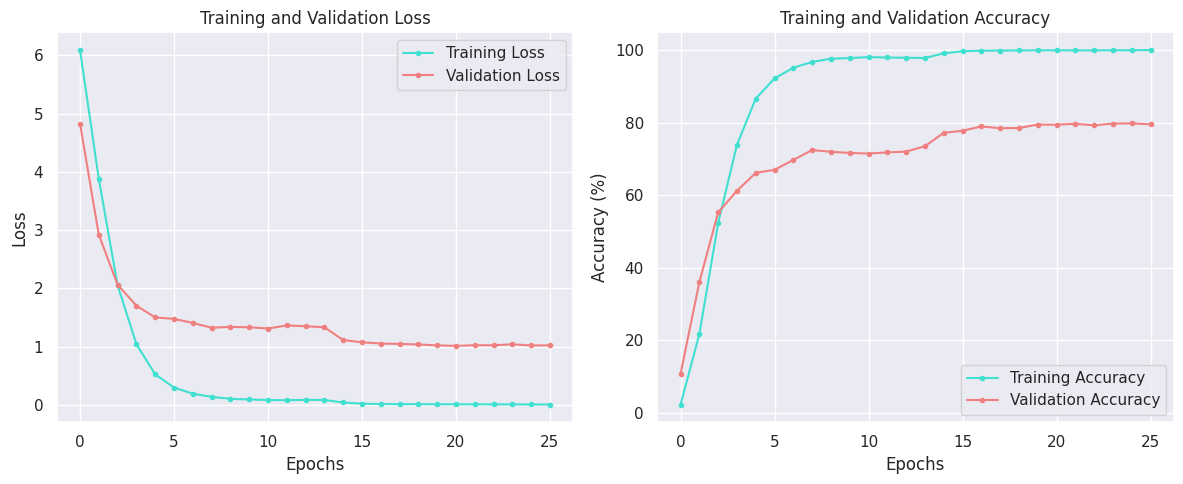

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='turquoise', marker='.')
plt.plot(val_losses, label='Validation Loss', color='lightcoral', marker='.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='turquoise', marker='.')
plt.plot(val_accuracies, label='Validation Accuracy', color='lightcoral', marker='.')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()

**оценим accuracy модели на тесте:**

In [14]:
model.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Test', unit='batch'):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        loss = criterion(outputs, labels).mean()
        test_running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test: 100%|██████████| 25/25 [00:06<00:00,  3.72batch/s]

Test Loss: 1.1805, Test Accuracy: 77.66%


**сохраним модель:**

In [15]:
checkpoint_path='/kaggle/working/runs/efficientnetb1_trained_26_epochs.pth'
torch.save(model.state_dict(), checkpoint_path)

<a name="3.2"></a>
### 3.2. Оценка Identification Rate Metric (2 балла) 
[к содержанию](#content) 

**Задача:** 
- реализовать Identification Rate Metric;
- протестировать на предоставленных данных.

Если нейросеть обучена на датасете CelebA-500, то для тестирования кода и оценки Identification Rate Metric подготовлены [данные из CelebA](https://disk.yandex.com/d/KN4EEkNKrF_ZXQ). Эти данные уже разбиты на query и distractors, и в отдельном файле также находится информация о классах для картинок из query. Эти картинки выровнены точно так же, как картинки из обучающей выборки CelebA-500

**Критерий оценки:** 
- реализован Identification Rate Metric;
- протестирован на предоставленных данных.


При обучении модели для распознавания лиц с помощью CE (кросс-энтропии) мы можем считать метрику accuracy как индикатор того, насколько хорошо наша модель работает. Но у accuracy тут есть недостаток: она не сможет померить, насколько хорошо наша модель работает на лицах людей, которых нет в обучающей выборке.  

Чтобы это исправить, придумали новую метрику: **identification rate**. Вот как она работает:

Создадим два набора изображений лиц: query и distractors. Никакие лица из этих наборов не должны содержаться в обучающем и валидационном датасете.

1. посчитаем косинусные расстояния между лицами, соответствующими одним и тем же людям из query части. Например, пусть одному человеку соответствуют три фото в query: 01.jpg, 02.jpg, 03.jpg. Тогда считаем три косинусных расстояния между всеми тремя парами из этих фото.
2. посчитаем косинусные расстояния между лицами, соответствующими разным людям из query части.
3. посчитаем косинусные расстояния между всеми парами лиц из query и distractors. Т.е. пара — это (лицо из query, лицо из distractors). Всего получится |query|*|distractors| пар.
4. Сложим количества пар, полученных на 2 и 3 шагах. Это количество false пар.
5. Зафиксируем **FPR** (false positive rate). Пусть, например, будет 0.01. FPR, умноженный на количество false пар из шага 4 — это разрешенное количество false positives, которые мы разрешаем нашей модели. Обозначим это количество через N.
6. Отсортируем все значения косинусных расстояний false пар. N — ое по счету значение расстояния зафиксируем как **пороговое расстояние**.
7. Посчитаем количество positive пар с шага 1, которые имеют косинусное расстояние меньше, чем пороговое расстояние. Поделим это количество на общее количество positive пар с шага 1. Это будет TPR (true positive rate) — итоговое значение нашей метрики.

Такая метрика обычно обозначается как TPR@FPR=0.01. FPR может быть разным. Приразных FPR будет получаться разное TPR.

Смысл этой метрики в том, что мы фиксируем вероятность ошибки вида false positive, т.е. когда "сеть сказала, что это один и тот же человек, но это не так", считаем порог косинусного расстояния для этого значения ошибки, потом берем все positive пары и смотрим, у скольких из них расстояние меньше этого порога. Т.е. насколько точно наша сеть ищет похожие лица при заданной вероятности ошибки вида false positive.

**Создадим класс для обученной модели так, чтобы можно было извлечь эмбеддинг картинки:**

In [8]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNet(nn.Module):
    def __init__(self, n_classes):
        super(EfficientNet, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT) # weights: IMAGENET1K_V2
        
        emb_size = self.net.classifier[1].in_features
        self.net._fc = nn.Linear(emb_size, n_classes)
        
    def forward(self, x):
        return self.net(x)
        

model = EfficientNet(500)
model.to(DEVICE)

PATH ='/kaggle/input/trained_models/pytorch/default/1/efficientnetb1_trained_26_epochs.pth'
model.load_state_dict(torch.load(PATH, weights_only=True, map_location=torch.device(DEVICE)))
model.net.classifier = nn.Identity() ## удалим последний слой, для выдачи эмбеддингов
model.eval()

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 125MB/s] 


EfficientNet(
  (net): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_acti

**подготовим данные для работы с query и distractors:**

In [9]:
from collections import defaultdict


# file with query part annotations: which image belongs to which class
# format:
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
with open('/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_anno_query.csv', 'r') as f:
    query_lines = f.readlines()[1:]
    query_lines = [x.strip().split(',') for x in query_lines]

# plain list of image names from query. Neede to compute embeddings for query
query_img_names = [x[0] for x in query_lines]

# dictionary with info of which images from query belong to which class
# format:
#     {class: [image_1, image_2, ...]}
query_dict = {}
for img_name, img_class in query_lines:
  query_dict.setdefault(img_class, []).append(img_name)

# list of distractor images
distractors_img_names = os.listdir('/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_distractors')

**Функция для вычисления эмбеддингов картинок:**

In [10]:
def compute_embeddings(model, images_list):
    '''
    compute embeddings from the trained model for list of images.
    params:
        model: trained nn model that takes images and outputs embeddings
        images_list: list of images paths to compute embeddings for
    output:
        array: array of model embeddings. Each embedding corresponds to images
              names from images_list
    '''

    model.eval()
    embeddings = []
    
    transform = transforms.Compose([
        transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    with torch.no_grad():
        for image_name in images_list:
            image = Image.open(image_name)
            image = transform(image)
            embedding = model(image.unsqueeze(0).to(DEVICE))
            normalized_output = F.normalize(embedding)
            embeddings.append(normalized_output.cpu().numpy())
    
    return np.concatenate(embeddings)

In [11]:
print(f"amount of images in query set: {len(query_img_names)}")
print(f"amount of images in distractors set: {len(distractors_img_names)}")

amount of images in query set: 1222
amount of images in distractors set: 2001


In [12]:
query_img_paths = ["/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_query/" + img_name for img_name in query_img_names]
query_embeddings = compute_embeddings(model, query_img_paths)
print(f"query_embeddings.shape: {query_embeddings.shape}")

distractors_img_paths = ["/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_distractors/" + img_name for img_name in distractors_img_names]
distractors_embeddings = compute_embeddings(model, distractors_img_paths)
print(f"distractors_embeddings.shape: {distractors_embeddings.shape}")

query_embeddings.shape: (1222, 1280)
distractors_embeddings.shape: (2001, 1280)


**Функции для вычисления:**
- косинусного расстояния между лицами, соответствующими одним и тем же людям из query части
- косинусного расстояния между лицами, соответствующими разным людям из query части.
- косинусного расстояния между всеми парами лиц из query и distractors. Пара — это (лицо из query, лицо из distractors). Всего получится |query|*|distractors| пар.

In [13]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
    '''
    compute cosine similarities between positive pairs from query (stage 1)
    params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
    output:
    list of floats: similarities between embeddings corresponding
                    to the same people from query list
    '''
    
    similarities = []
    embeddings_dict = dict(zip(query_img_names, query_embeddings))
    
    for label, img_names in query_dict.items():  
        num_images = len(img_names) 
        
        if num_images > 1:
            class_embeddings = np.array([embeddings_dict[img_name] for img_name in img_names]) 
            cos_sim_matrix = cosine_similarity(class_embeddings) 
            mask_upper = np.triu(np.ones((num_images, num_images)), k=1).astype(bool)
            similarities.extend(cos_sim_matrix[mask_upper])
      
    return similarities
    

def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
    '''
    compute cosine similarities between negative pairs from query (stage 2)
    params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
    output:
    list of floats: similarities between embeddings corresponding
                    to different people from query list
    '''

    similarities = []
    embeddings_dict = dict(zip(query_img_names, query_embeddings))

    labels = list(query_dict.keys())
    num_labels = len(labels)
    
    for i in range(num_labels - 1):
        i_embeddings = np.array([embeddings_dict[img_name] for img_name in query_dict[labels[i]]])  
        
        for j in range(i + 1, num_labels):
            j_embeddings = np.array([embeddings_dict[img_name] for img_name in query_dict[labels[j]]])  
            
            cos_sim_matrix = cosine_similarity(i_embeddings, j_embeddings) 
            similarities.extend(cos_sim_matrix.flatten())
      
    return similarities


def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
    '''
    compute cosine similarities between negative pairs from query and distractors
    (stage 3)
    params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
    output:
    list of floats: similarities between pairs of people (q, d), where q is
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
    '''
    
    cos_sim_matrix = cosine_similarity(query_embeddings, distractors_embeddings)
    
    return cos_sim_matrix.flatten()


**Ячейки для проверки корректности работы кода:**

In [14]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]


test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names,
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names,
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings,
                                                            test_distractors_embeddings)


In [15]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"


true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"


true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

**Функция, которая считает IR metric:**

In [16]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=0.1):
    '''
    compute identification rate using precomputer cosine similarities between pairs
    at given fpr
    params:
    cosine_query_pos: cosine similarities between positive pairs from query
    cosine_query_neg: cosine similarities between negative pairs from query
    cosine_query_distractors: cosine similarities between negative pairs
                              from query and distractors
    fpr: false positive rate at which to compute TPR
    output:
    float: threshold for given fpr
    float: TPR at given FPR
    '''
    
    false_pairs = np.concatenate([cosine_query_neg, cosine_query_distractors])
    N = len(false_pairs) * fpr
    threshold = sorted(false_pairs, reverse=True)[int(N)]
    tpr = np.sum([cosine_query_pos > threshold]) / len(cosine_query_pos)
    
    return threshold, tpr
  

**Ячейка для проверки корректности работы кода:**

In [17]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
  x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg,
                    test_cosine_query_distractors, fpr=fpr)
  test_thr.append(x)
  test_tpr.append(y)
    
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

**Оценка TPR@FPR для датасета с лицами:**

1. посчитаем косинусные расстояния между лицами, соответствующими одним и тем же людям из query части. Например, пусть одному человеку соответствуют три фото в query: 01.jpg, 02.jpg, 03.jpg. Тогда считаем три косинусных расстояния между всеми тремя парами из этих фото.
2. посчитаем косинусные расстояния между лицами, соответствующими разным людям из query части.
3. посчитаем косинусные расстояния между всеми парами лиц из query и distractors. Т.е. пара — это (лицо из query, лицо из distractors). Всего получится |query|*|distractors| пар.


In [18]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names,
                                            query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names,
                                            query_embeddings)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings,
                                                            distractors_embeddings)

4. Сложим количества пар, полученных на 2 и 3 шагах. Это количество false пар.
5. Зафиксируем **FPR** (false positive rate). Пусть, например, будет 0.01. FPR, умноженный на количество false пар из шага 4 — это разрешенное количество false positives, которые мы разрешаем нашей модели. Обозначим это количество через N.
6. Отсортируем все значения косинусных расстояний false пар. N — ое по счету значение расстояния зафиксируем как **пороговое расстояние**.
7. Посчитаем количество positive пар с шага 1, которые имеют косинусное расстояние меньше, чем пороговое расстояние. Поделим это количество на общее количество positive пар с шага 1. Это будет TPR (true positive rate) — итоговое значение нашей метрики.

Такая метрика обычно обозначается как TPR@FPR=0.01. FPR может быть разным. Приразных FPR будет получаться разное TPR.


-- эти шаги реализуются в функции **compute_ir**

**Посчитаем Identification Rate Metric для значений fpr = [0.5, 0.2, 0.1, 0.05].**

In [19]:
for fpr in [0.5, 0.2, 0.1, 0.05]:
    threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    print(f"at FPR = {fpr}: threshold = {threshold:.3}; TPR = {tpr:.3}")

at FPR = 0.5: threshold = 0.241; TPR = 0.98
at FPR = 0.2: threshold = 0.338; TPR = 0.903
at FPR = 0.1: threshold = 0.391; TPR = 0.812
at FPR = 0.05: threshold = 0.436; TPR = 0.703


<a name="3.3"></a>
### 3.3. Обучение нейросети на ArcFace loss. (2 балла)
[к содержанию](#content) 

**Задача:** 
- реализовать ArcFace loss;
- обучить сеть с нуля на нем (можно использовать модели предобученные на ImageNet. Предобученные на задачу распознавания лиц брать нельзя);
- добиться достаточного качества классификации.

**Критерий оценки:** 
- реализован ArcFace loss;
- обучена сеть с нуля на нем;
- accuracy на тестовой части датасета CelebA-500 > 0.7.

<!-- *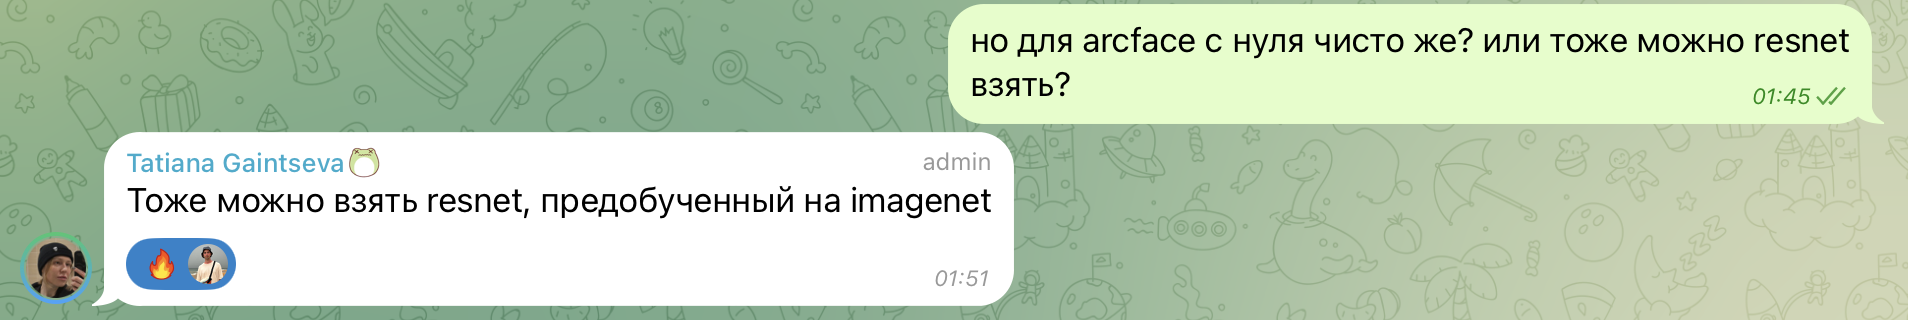 -->

#### ArcFace Loss (Additive Angular Margin Loss)

В случае с обучением на задачу классификации лосс-функция, которая нам приходит в голову — Cross-Entropy. И на нее действительно можно обучать сеть для распознавания лиц. Но за много лет люди придумали более хитрые лосс-функции, которые делают обучение сети для распознавания лиц более эффективным. Одним из лучших считается ArcFace Loss (Additive Angular Margin Loss).

Этот лосс — чуть измененная кросс-энтропия. Он позволяет достичь лучшего распределения векторов лиц на сфере. В нем добавлены некоторые дополнительные ограничения и гиперпараметры, для того чтобы эмбеддинги лиц одного класса были более близки между собой, а эмбеддинги лиц разных людей оставались далеки. То есть, этот лосс позволяет лучше кластеризовать лица на сфере единичного радиуса.


**Как устроен ArcFace**:

Стандартные SoftMax + кросс-энтропия (CE) выглядят так:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

здесь:
- $x_i \in \mathbb{R^d}$ — вектор $i$-го элемента обучающей выборки перед последним полносвязным слоем сети. $y_i$ — класс этого элемента;
- $W_j \in \mathbb{R^d}$ — j-ый столбец матрицы весов последнего слоя сети (т.е. слоя, который производит итоговую классификацю входящего объекта);
- $b_j \in \mathbb{R^d}$ — j-ый элемент вектора байеса последнего слоя сети;
- $N$ — batch size;
- $n$ — количество классов.


Хотя этот лосс работает хорошо, он явным образом не заставляет эмбеддинги $x_i$ элементов, принадлежащих одному классу, быть близкими друг к другу по расстоянию. И не заставляет эмбеддинги элементов, принадлежащих разным классам, быть далеко друг от друга. Все, что хочет этот лосс — чтобы на основе эмбеддингов $x_i$ можно было хорошо классифицировать элементы, никакие ограничений на расстояния между эмбеддингами $x_i$ он не вводит.

Из-за этого у нейросетей для распознавания лиц, которые обучены на обычном CE loss, бывают проблемы с распознаванием лиц, которые сильно отличаются от лиц того же человека разными допатрибутами (шляпа/прическа/очки и т.п.). Просто эмбеддинг для таких лиц получается довольно далек по расстоянию от других эмбеддингов лиц этого же человека.

Давайте теперь немного поправим формулу:
- уберем байес последнего слоя, т.е. сделаем $b_j=0$;
- нормализуем веса последнего слоя: ||$W_j$|| = 1;
- нормализуем эмбеддинги: ||$x_i$|| = 1. Перед подачей их на вход последнему слою (т.е. перед умножением на матрицу $W_j$) умножим их на гиперпараметр s. По сути, мы приводим норму всех эмбеддингов к s. Смысл этого гиперпараметра в том, что, возможно, сети проще будет классифицировать эмбеддинги, у которых не единичная норма.

Нормализация эмбеддингов приводит к тому, что эмбеддинги начинают быть распределены по сфере единичного радиуса (и сфере радиуса s после умножения на ниперпараметр s). И итоговые предсказания сети после последнего слоя зависят только от угла между эмбеддингами $x_i$ и выученных весов $W_j$. От нормы эмбеддинга $x_i$ они больше не зависят, т.к. у всех эмбеддингов они теперь одинаковые.

Получается, в степени экспоненты у нас останется выражение $s W_{y_i}^{T}x_i$, которое можно переписать в виде  $s W_{y_i}^{T}x_i = s ||W_{y_i}||\cdot ||x_i|| \cdot cos\Theta_{y_i}$. Тут $\Theta_{y_i}$ — это угод между векторами $W_{y_i}$ и $x_i$. Но так как мы сделали нормы $W_{y_i}$ и $x_i$ единичными, то все это выражение просто будет равно $s cos\Theta_{y_i}$.

В итоге мы получим следующую формулу лосса:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$


И последний шаг. Добавим еще один гиперпараметр $m$. Он называется additive angular margin penalty и заставляет эмбеддинги одного класса быть ближе друг к другу, а эмбеддинги разных классов — более далекими друг от друга.

В итоге получим вот что:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Это и есть ArcFace Loss с двумя  гиперпараметрами, s и m.

Получается, что ArcFace Loss завтавляет сеть выучивать эмбеддинги, распределенные по сфере радиуса s, причем чтобы эмбеддинги одного класса были ближе друг к другу, а эмбеддинги разных классов — более далеки друг от друга.  

<br /> 

**Доп. литература по ArcFace Loss:**

Оригинальная статья: https://arxiv.org/pdf/1801.07698.pdf

Репозиторий с кодом: https://github.com/deepinsight/insightface

#### Реализация ArcFaceLoss (version 1):

Класс принимает на вход эмбеддинги (предпоследний слой сети) и матрицу весов для вычисления лосса. В данной реализации матрица весов инициализируются внутри класса модели 

In [6]:
class ArcFaceLoss(nn.Module):
    def __init__(self, s=50.0, m=0.50):
        super(ArcFaceLoss, self).__init__()
        self.s = s # Scale factor
        self.m = m # Additive angular margin penalty

    def forward(self, embeddings, weights, labels):
        
        # L2 Нормализация эмбеддингов и весов классов
        embeddings = F.normalize(embeddings)
        weights = F.normalize(weights, dim=0)

        # Вычисление косинуса угла между эмбеддингами и весами классов
        cosine = embeddings @ weights
        
        # Установка ограничений на значения, для избежания NaN
        cosine = cosine.clip(-1 + 1e-7, 1 - 1e-7)  
        
        # Вычисление угла theta
        theta = torch.acos(cosine)  
        
        # Сдвиг угла на m (additive angular margin penalty)
        theta += F.one_hot(labels, n_classes) * self.m 
        
        # re-scale на гиперпараметр s
        cosine_upd = theta.cos() * self.s 
        
        return F.cross_entropy(cosine_upd, labels)

#### Пример работы лосс функции на синтетических данных:

**Сгенерируем данные:**

In [7]:
import numpy as np 

n_classes = 8
examples_per_class = 50
emb_size = 128 # Dimensionality of the feature vectors
noise_variance = 1  # Variance of the noise

# generate synthetic data (with `n_classes` centers, each with 50 samples)
centers = np.random.uniform(-1, 1, (n_classes, emb_size))
data = []
labels = []
for i in range(n_classes):
    noise = np.random.normal(0, noise_variance, (examples_per_class, emb_size))
    examples = centers[i] + noise # add random noise around centre 
    data.append(examples)
    labels += [i] * examples_per_class

data = np.vstack(data).astype(np.float32)
labels = np.array(labels)

**визуализируем их:**

In [8]:
def visualise(data:np.ndarray, labels:np.ndarray, title=None):
    """
    Visualise high dimension (>2 dim) data on 2D plane using t-sne
    """
    assert data.shape[0] == labels.shape[0], "Number of samples & labels do not match"
    
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42) 
    data_2d = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Class label')
    
    if title is None:
        plt.title('t-SNE Visualization of the Dataset')
    else:
        plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

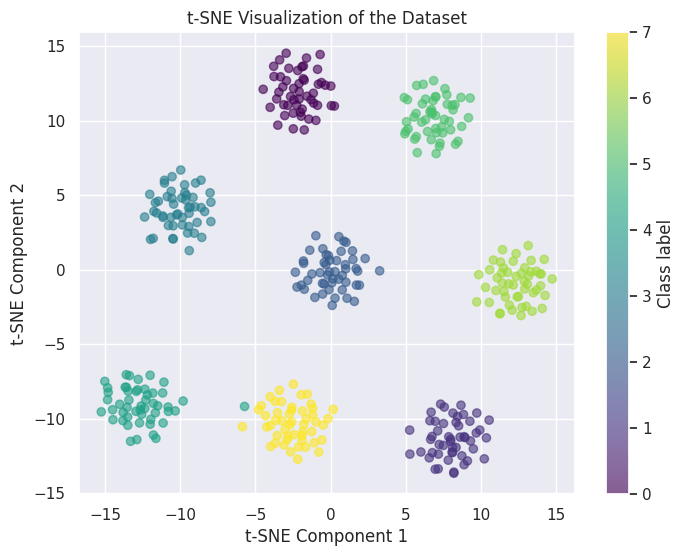

In [9]:
visualise(data, labels)

**создадим игрушечную модель:**

c инициализацией весов внутри модели

In [10]:
# define model
class SimpleModel(nn.Module):
    """
    Simple 2 layer models that takes in inputs (with `emb_size` dimensions) 
    and output an embedding (with `emb_size` dimensions)
    """
    def __init__(self, emb_size, n_classes):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(emb_size, 256)  
        self.fc2 = nn.Linear(256, emb_size)  
        self.weights = nn.Parameter(torch.Tensor(emb_size, n_classes))
        nn.init.xavier_uniform_(self.weights)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

**создадим функцию для обучения:**

In [11]:
def train(x, y, model, criterion, optimizer, num_epochs = 500, loss_name="other"):
    """
    Simple training loop
    """
    
    for epoch in range(num_epochs):
        model.train()

        # forward pass
        features = model(x)
        if loss_name == "arcface":
            loss = criterion(features, model.weights, y)
        else:
            logits = features @ model.weights
            loss = criterion(logits, y)

        # backpropagation and update weights 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training loss 
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss}')
    
    return model

**обучим модель с CE loss и посмотрим как близки друг к другу окажутся эмбеддинги одного класса:**

Epoch 50, Loss: 1.5108368396759033
Epoch 100, Loss: 1.0093908309936523
Epoch 150, Loss: 0.6560488939285278
Epoch 200, Loss: 0.43406346440315247


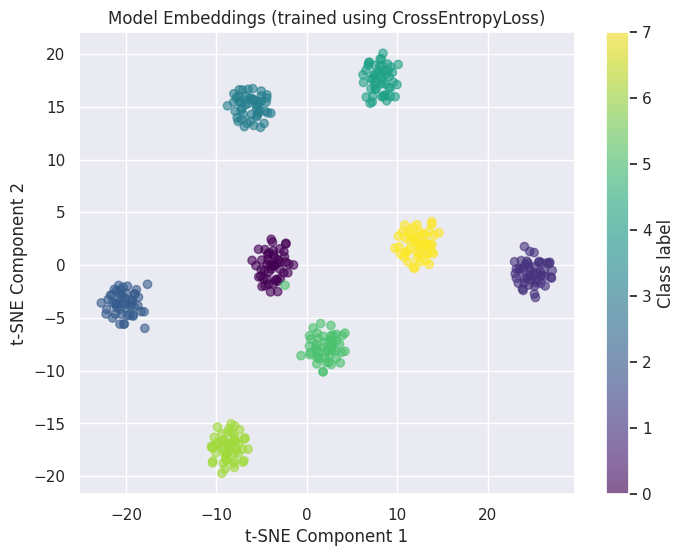

In [12]:
x = torch.from_numpy(data)
y = torch.from_numpy(labels)

model_1 = SimpleModel(emb_size, n_classes)
criterion1 = nn.CrossEntropyLoss() 
optimizer1 = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.8)
num_epochs = 200

model_1 = train(x, y, model_1, criterion1, optimizer1, num_epochs) 
features1 = model_1(x)
visualise(features1.detach().numpy(), labels, title="Model Embeddings (trained using CrossEntropyLoss)")

**проделаем тоже самое для модели с ArcFace loss:**

Epoch 50, Loss: 0.05905739217996597
Epoch 100, Loss: 0.004035465884953737
Epoch 150, Loss: 0.002602491294965148
Epoch 200, Loss: 0.0019880083855241537


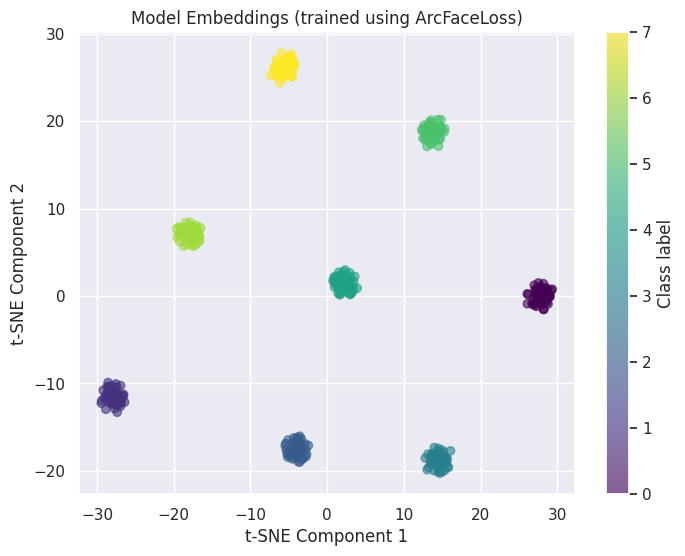

In [13]:
x = torch.from_numpy(data)
y = torch.from_numpy(labels)

model_2 = SimpleModel(emb_size, n_classes)
criterion2 = ArcFaceLoss()
optimizer2 = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.8)
num_epochs = 200

model_2 = train(x, y, model_2, criterion2, optimizer2, num_epochs, "arcface") 
features2 = model_2(x)
visualise(features2.detach().numpy(), labels, title="Model Embeddings (trained using ArcFaceLoss)")

Как можно увидеть, эмбеддинги полученные моделью с ArcFaceLoss расположены намного компактнее другу к другу.

Осталось убедиться, что этот подход сработает и для задачи Face Recognition

#### Реализация ArcFaceLoss (version 2):

Данная реализация разбита на 2 класса:
- LogitsCalculation() - класс вычисления логитов. Принимает на вход эмбеддинги и в отличие от первой версии ArcFaceLoss матрица весов инициализируются внутри этого класса, а не внутри модели. 
- ArcFaceLoss() - класс для вычисления лосса. В данной версии принимает на вход уже посчитанные логиты.

In [14]:
class LogitsCalculation(nn.Module):
    def __init__(self, ebmb_size, n_classes):
        super(LogitsCalculation, self).__init__()
        self.weights = nn.Parameter(torch.Tensor(ebmb_size, n_classes)).to(DEVICE)
        nn.init.xavier_uniform_(self.weights)
        
    def forward(self, embeddings):
        embeddings = F.normalize(embeddings)
        weights = F.normalize(self.weights, dim=0)
        
        logits = embeddings @ weights
        return logits

class ArcFaceLoss(nn.Module):
    def __init__(self, s=50.0, m=0.50):
        super(ArcFaceLoss, self).__init__()
        self.s = s # Scale factor
        self.m = m # Additive angular margin penalty

    def forward(self, logits, labels):
        # Установка ограничений на значения, для избежания NaN
        cosine = logits.clip(-1 + 1e-7, 1 - 1e-7)  
        
        # Вычисление угла theta
        theta = torch.acos(cosine)  
        
        # Сдвиг угла на m (additive angular margin penalty)
        theta += F.one_hot(labels, n_classes) * self.m 
        
        # Домножение на гиперпараметр s
        cosine_upd = theta.cos() * self.s 
        
        return F.cross_entropy(cosine_upd, labels)

**создадим игрушечную модель:**

в данном случае внутри модели веса не инициализируются, так как теперь это происходит внутри класса `LogitsCalculation`

In [15]:
# define model
class SimpleModel(nn.Module):
    """
    Simple 2 layer models that takes in inputs (with `emb_size` dimensions)
    and output an embedding (with `emb_size` dimensions)
    """
    def __init__(self, emb_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(emb_size, 256)  
        self.fc2 = nn.Linear(256, emb_size)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

**создадим функцию для обучения:**

исправим с учетом, что теперь в функцию потерь нужно передавать логиты, вместо эмбеддингов и матрицы весов

In [16]:
def train(x, y, model, logits_calc, criterion, optimizer, num_epochs=500):
    """
    Simple training loop
    """
    
    for epoch in range(num_epochs):
        model.train()

        # forward pass
        features = model(x)
        outputs = logits_calc(features)
        loss = criterion(outputs, y)

        # backpropagation and update weights 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print training loss 
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss}')
    
    return model

**обучим модель с CE loss и посмотрим как близки друг к другу окажутся эмбеддинги одного класса:**

Epoch 50, Loss: 2.0433032512664795
Epoch 100, Loss: 2.0036895275115967
Epoch 150, Loss: 1.9634909629821777
Epoch 200, Loss: 1.9223487377166748
Epoch 250, Loss: 1.8803378343582153
Epoch 300, Loss: 1.8379992246627808
Epoch 350, Loss: 1.7962967157363892
Epoch 400, Loss: 1.756412148475647
Epoch 450, Loss: 1.719274878501892
Epoch 500, Loss: 1.6853570938110352


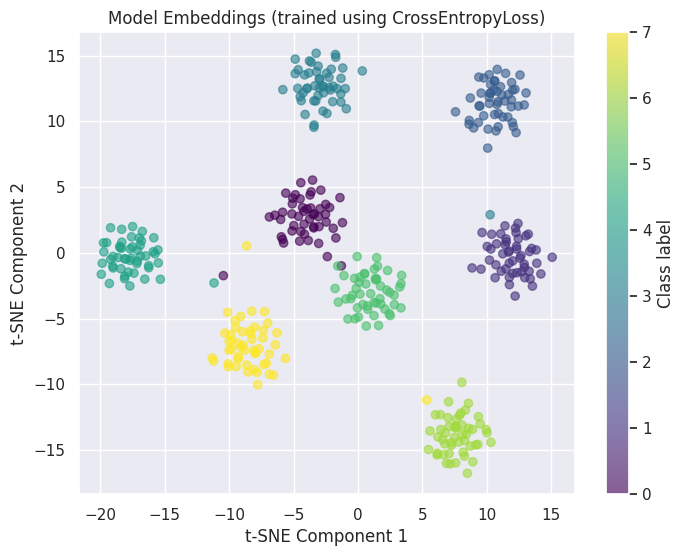

In [17]:
x = torch.from_numpy(data)
y = torch.from_numpy(labels)

model_1 = SimpleModel(emb_size)
logits_calc1 = LogitsCalculation(emb_size, n_classes)
criterion1 = nn.CrossEntropyLoss() 
optimizer1 = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.8)
num_epochs = 500

model_1 = train(x, y, model_1, logits_calc1, criterion1, optimizer1, num_epochs) 
features1 = model_1(x)
visualise(features1.detach().numpy(), labels, title="Model Embeddings (trained using CrossEntropyLoss)")

**проделаем тоже самое для модели с ArcFace loss:**

Epoch 50, Loss: 69.22418975830078
Epoch 100, Loss: 49.69184494018555
Epoch 150, Loss: 13.48879623413086
Epoch 200, Loss: 5.813308238983154
Epoch 250, Loss: 2.9881467819213867
Epoch 300, Loss: 1.795763373374939
Epoch 350, Loss: 1.2272342443466187
Epoch 400, Loss: 0.9256798624992371
Epoch 450, Loss: 0.7467755079269409
Epoch 500, Loss: 0.6319385766983032


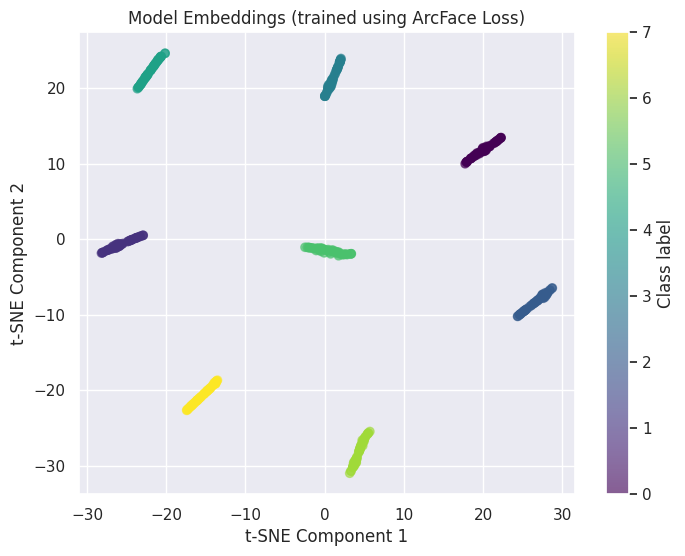

In [18]:
x = torch.from_numpy(data)
y = torch.from_numpy(labels)

model_2 = SimpleModel(emb_size)
logits_calc2 = LogitsCalculation(emb_size, n_classes)
criterion2 = ArcFaceLoss(emb_size, n_classes)
optimizer2 = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.8)
num_epochs = 500

model_2 = train(x, y, model_2, logits_calc2, criterion2, optimizer2, num_epochs) 
features2 = model_2(x)
visualise(features2.detach().numpy(), labels, title="Model Embeddings (trained using ArcFace Loss)")

**Краткие выводы:**

t-SNE представление эмбеддингов стало ещё более сжато - эмбеддинги объектов одного класса вытянулись в линии, что может быть связано как раз с тем, что углы образуемые между векторами (эмбеддингами) одного класса и матрицей весов очень близки друг к другу. 

Во время экспериментов с первой и второй версиями модель обученная на данной версии реализации ArcFaceLoss продемонстрировала лучшую точность и более быструю сходимость. Возможно, все дело в том, что при обучении модели с первой версией были использованы веса `IMAGENET1K_V1`, тогда как при обучении второй версии использовались веса `IMAGENET1K_V2`. Что именно повлияло - реализация или веса, или может даже lr (было 0.00001, стало 0.001) на данном этапе работы так и не было выяснено. Но как бы то ни было, я решил остановится на этой версии, так как, на мой взгляд, вторая версия приближает вектора гораздо сильнее, чем предыдущая, и поэтому в основных результатах проекта будет использоваться именно она.

Для подтверждения своих слов: обучение и его результаты, с использованием лосса первой и второй версий для одной и той же модели, но с разными реализациями весов, находится в [Приложении](#appendix).  

#### Обучение нейросети с ArcFaceLoss (version 2):

- **model:** efficientnet_b1 
- **weights:** IMAGENET1K_V2
- **loss:** ArcFaceLoss (version 2)

**Выбор сети и её модификация для работы с ArcFaceLoss (version 2):**

для того чтобы можно было вычислить ArcFaceLoss делаем так, чтобы модель возвращала:
- эмбеддинг картинки - outputs предпоследнего слоя модели

при этом матрицу весов последнего слоя инициализируем в отдельном классе считающем логиты

In [44]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNetModified(nn.Module):
    def __init__(self):
        super(EfficientNetModified, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT)
        
        # Извлечем информацию о размере эмбеддинга
        self.emb_size = self.net.classifier[1].in_features
        
        # Удаляем последний слой (классификатор)
        self.net = nn.Sequential(*list(self.net.children())[:-1])
        
    def forward(self, x):
        return self.net(x).squeeze()

**для того чтобы воспользоваться ArcFaceLoss изменим функцию для обучения сети:**

In [19]:
torch.autograd.set_detect_anomaly(True)

def train_model_with_arcface(
    model, 
    logits_calc,
    train_loader,
    val_loader,
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda'
):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    # Early stopping
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Wrap train_loader with tqdm
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            features = model(images)
            logits = logits_calc(features)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(logits.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_predictions / total_predictions
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        # Wrap val_loader with tqdm
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                features = model(images)
                logits = logits_calc(features)
                loss = criterion(logits, labels)
                val_running_loss += loss.item()

                _, predicted = torch.max(logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            # Save model checkpoint
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        print(f'Epoch [{epoch + 1} / {num_epochs}], '
              f'Train Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies

**создадим директорию для сохранения чекпоинтов модели:**

In [20]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

**подготовим даталоудер:**

In [21]:
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

**запустим обучение:**

In [45]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()


model_arc = EfficientNetModified() 
ebmb_size = model_arc.emb_size
print(f"ebmbedding size: {ebmb_size}")
n_classes = len(np.unique(images_info.image_id))
print(f"we will classify: {n_classes} classes")
print(f"device: {DEVICE}")
model_arc.to(DEVICE)

logits_calc = LogitsCalculation(ebmb_size, n_classes)
criterion = ArcFaceLoss() 
optimizer = optim.Adam(model_arc.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, train_accuracies, val_losses, val_accuracies = train_model_with_arcface(
    model_arc,
    logits_calc,
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100,
    model_name="efficientnetb1_with_arcface",
    device=DEVICE
)

ebmbedding size: 1280
we will classify: 500 classes
device: cuda:0


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.54batch/s]


Epoch [1 / 100], Train Loss: 30.1092, Train Accuracy: 3.20%, Validation Loss: 29.0483, Validation Accuracy: 11.61%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.56batch/s]


Epoch [2 / 100], Train Loss: 27.9668, Train Accuracy: 26.85%, Validation Loss: 27.3526, Validation Accuracy: 35.30%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.58batch/s]


Epoch [3 / 100], Train Loss: 25.7934, Train Accuracy: 55.77%, Validation Loss: 25.8759, Validation Accuracy: 49.20%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.32batch/s]


Epoch [4 / 100], Train Loss: 23.3280, Train Accuracy: 75.13%, Validation Loss: 23.7614, Validation Accuracy: 60.22%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.42batch/s]


Epoch [5 / 100], Train Loss: 20.6033, Train Accuracy: 84.98%, Validation Loss: 21.6049, Validation Accuracy: 68.48%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.48batch/s]


Epoch [6 / 100], Train Loss: 17.7409, Train Accuracy: 90.81%, Validation Loss: 19.2183, Validation Accuracy: 72.84%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.55batch/s]


Epoch [7 / 100], Train Loss: 15.0954, Train Accuracy: 93.14%, Validation Loss: 17.1924, Validation Accuracy: 75.93%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.54batch/s]


Epoch [8 / 100], Train Loss: 12.4886, Train Accuracy: 94.99%, Validation Loss: 15.2169, Validation Accuracy: 78.06%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.56batch/s]


Epoch [9 / 100], Train Loss: 10.2484, Train Accuracy: 96.28%, Validation Loss: 13.7583, Validation Accuracy: 79.82%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.51batch/s]


Epoch [10 / 100], Train Loss: 8.3698, Train Accuracy: 96.85%, Validation Loss: 12.4719, Validation Accuracy: 81.63%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.56batch/s]


Epoch [11 / 100], Train Loss: 6.7237, Train Accuracy: 98.14%, Validation Loss: 11.0510, Validation Accuracy: 82.64%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.48batch/s]


Epoch [12 / 100], Train Loss: 5.6314, Train Accuracy: 98.57%, Validation Loss: 10.5381, Validation Accuracy: 82.59%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.52batch/s]


Epoch [13 / 100], Train Loss: 4.7956, Train Accuracy: 98.65%, Validation Loss: 10.1031, Validation Accuracy: 84.13%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.46batch/s]


Epoch [14 / 100], Train Loss: 4.2044, Train Accuracy: 99.08%, Validation Loss: 10.0541, Validation Accuracy: 82.96%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.34batch/s]


Epoch [15 / 100], Train Loss: 3.6417, Train Accuracy: 99.18%, Validation Loss: 9.4663, Validation Accuracy: 83.65%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.51batch/s]


Epoch [16 / 100], Train Loss: 3.2753, Train Accuracy: 99.23%, Validation Loss: 9.2438, Validation Accuracy: 83.97%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.54batch/s]


Epoch [17 / 100], Train Loss: 2.8660, Train Accuracy: 99.53%, Validation Loss: 9.0246, Validation Accuracy: 84.35%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.56batch/s]


Epoch [18 / 100], Train Loss: 2.5525, Train Accuracy: 99.64%, Validation Loss: 8.4745, Validation Accuracy: 85.57%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.52batch/s]


Epoch [19 / 100], Train Loss: 2.3526, Train Accuracy: 99.72%, Validation Loss: 8.7760, Validation Accuracy: 83.60%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.45batch/s]


Epoch [20 / 100], Train Loss: 2.3893, Train Accuracy: 99.70%, Validation Loss: 9.0339, Validation Accuracy: 83.17%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.50batch/s]


Epoch [21 / 100], Train Loss: 2.1600, Train Accuracy: 99.78%, Validation Loss: 8.8075, Validation Accuracy: 83.17%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.51batch/s]


Epoch [22 / 100], Train Loss: 1.6945, Train Accuracy: 99.88%, Validation Loss: 6.7229, Validation Accuracy: 87.22%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [23 / 100], Train Loss: 1.3257, Train Accuracy: 99.95%, Validation Loss: 6.6434, Validation Accuracy: 87.01%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.10batch/s]


Epoch [24 / 100], Train Loss: 1.2181, Train Accuracy: 99.96%, Validation Loss: 6.5432, Validation Accuracy: 87.11%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.37batch/s]


Epoch [25 / 100], Train Loss: 1.0967, Train Accuracy: 99.98%, Validation Loss: 6.4865, Validation Accuracy: 87.49%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.40batch/s]


Epoch [26 / 100], Train Loss: 0.9563, Train Accuracy: 99.98%, Validation Loss: 6.3212, Validation Accuracy: 88.07%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.48batch/s]


Epoch [27 / 100], Train Loss: 0.9729, Train Accuracy: 99.95%, Validation Loss: 6.3373, Validation Accuracy: 88.29%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.45batch/s]


Epoch [28 / 100], Train Loss: 0.8420, Train Accuracy: 99.98%, Validation Loss: 6.3124, Validation Accuracy: 87.75%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.45batch/s]


Epoch [29 / 100], Train Loss: 0.7720, Train Accuracy: 99.96%, Validation Loss: 6.2851, Validation Accuracy: 88.23%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.45batch/s]


Epoch [30 / 100], Train Loss: 0.7390, Train Accuracy: 99.98%, Validation Loss: 6.2991, Validation Accuracy: 88.02%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.53batch/s]


Epoch [31 / 100], Train Loss: 0.7500, Train Accuracy: 99.93%, Validation Loss: 6.2105, Validation Accuracy: 88.18%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.45batch/s]


Epoch [32 / 100], Train Loss: 0.6795, Train Accuracy: 99.95%, Validation Loss: 6.2598, Validation Accuracy: 88.34%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.41batch/s]


Epoch [33 / 100], Train Loss: 0.6918, Train Accuracy: 99.95%, Validation Loss: 6.6283, Validation Accuracy: 87.38%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [34 / 100], Train Loss: 0.6137, Train Accuracy: 99.98%, Validation Loss: 6.3003, Validation Accuracy: 88.34%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.17batch/s]


Epoch [35 / 100], Train Loss: 0.5156, Train Accuracy: 99.99%, Validation Loss: 6.1443, Validation Accuracy: 87.70%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.34batch/s]


Epoch [36 / 100], Train Loss: 0.4346, Train Accuracy: 99.99%, Validation Loss: 5.9890, Validation Accuracy: 88.55%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [37 / 100], Train Loss: 0.4213, Train Accuracy: 99.99%, Validation Loss: 5.8201, Validation Accuracy: 88.98%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.47batch/s]


Epoch [38 / 100], Train Loss: 0.3897, Train Accuracy: 99.98%, Validation Loss: 5.9740, Validation Accuracy: 88.92%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.48batch/s]


Epoch [39 / 100], Train Loss: 0.4093, Train Accuracy: 99.98%, Validation Loss: 5.9553, Validation Accuracy: 88.45%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [40 / 100], Train Loss: 0.3579, Train Accuracy: 99.99%, Validation Loss: 5.8421, Validation Accuracy: 88.50%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.39batch/s]


Epoch [41 / 100], Train Loss: 0.3372, Train Accuracy: 99.98%, Validation Loss: 5.9187, Validation Accuracy: 88.55%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.52batch/s]


Epoch [42 / 100], Train Loss: 0.2793, Train Accuracy: 100.00%, Validation Loss: 5.7714, Validation Accuracy: 89.14%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.48batch/s]


Epoch [43 / 100], Train Loss: 0.3033, Train Accuracy: 99.99%, Validation Loss: 5.6917, Validation Accuracy: 89.24%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.46batch/s]


Epoch [44 / 100], Train Loss: 0.2800, Train Accuracy: 99.99%, Validation Loss: 5.6698, Validation Accuracy: 89.30%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.50batch/s]


Epoch [45 / 100], Train Loss: 0.2781, Train Accuracy: 100.00%, Validation Loss: 5.6752, Validation Accuracy: 89.46%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.03batch/s]


Epoch [46 / 100], Train Loss: 0.2497, Train Accuracy: 100.00%, Validation Loss: 5.6689, Validation Accuracy: 89.24%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.42batch/s]


Epoch [47 / 100], Train Loss: 0.2462, Train Accuracy: 99.99%, Validation Loss: 5.6364, Validation Accuracy: 89.72%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.50batch/s]


Epoch [48 / 100], Train Loss: 0.2350, Train Accuracy: 100.00%, Validation Loss: 5.6307, Validation Accuracy: 89.67%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [49 / 100], Train Loss: 0.2438, Train Accuracy: 100.00%, Validation Loss: 5.7011, Validation Accuracy: 88.98%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.50batch/s]


Epoch [50 / 100], Train Loss: 0.2476, Train Accuracy: 99.99%, Validation Loss: 5.6587, Validation Accuracy: 90.10%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.42batch/s]


Epoch [51 / 100], Train Loss: 0.2239, Train Accuracy: 99.99%, Validation Loss: 5.6877, Validation Accuracy: 89.51%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.49batch/s]


Epoch [52 / 100], Train Loss: 0.1985, Train Accuracy: 100.00%, Validation Loss: 5.6791, Validation Accuracy: 89.35%


Validation: 100%|██████████| 30/30 [00:04<00:00,  6.47batch/s]

Early stopping triggered.


**выведем графики изменения loss и accuracy в зависимости от эпохи обучения:**

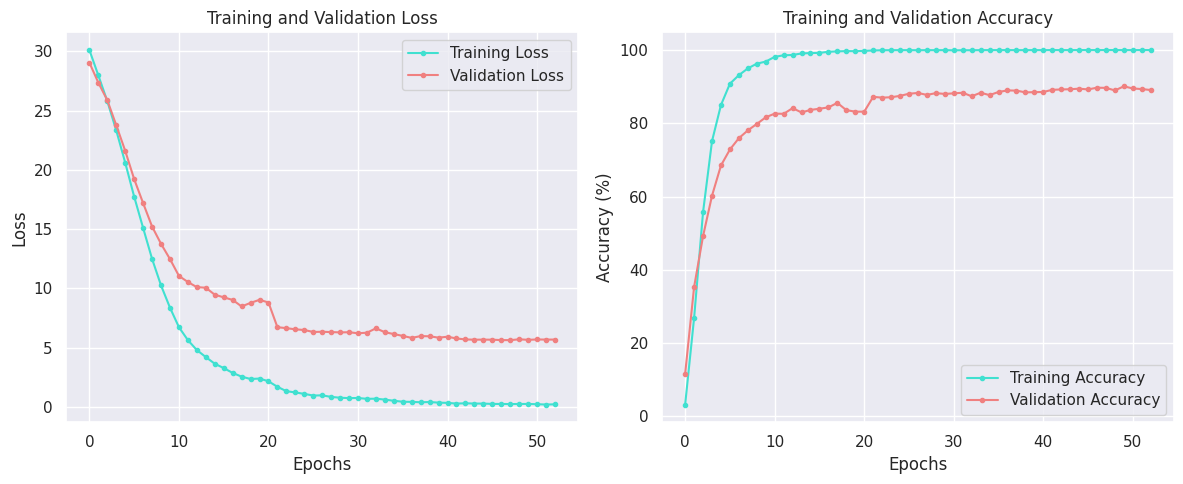

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='turquoise', marker='.')
plt.plot(val_losses, label='Validation Loss', color='lightcoral', marker='.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='turquoise', marker='.')
plt.plot(val_accuracies, label='Validation Accuracy', color='lightcoral', marker='.')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()


**оценим accuracy модели на тесте:**

In [47]:
model_arc.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Test', unit='batch'):        
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        features = model_arc(images)
        logits = logits_calc(features)
        loss = criterion(logits, labels).mean()
        test_running_loss += loss.item()

        _, predicted = torch.max(logits.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test: 100%|██████████| 25/25 [00:06<00:00,  3.89batch/s]

Test Loss: 6.3532, Test Accuracy: 87.73%


**сохраним модель:**

In [48]:
checkpoint_path='/kaggle/working/runs/efficientnetb1_with_arcface_trained_53_epochs.pth'
torch.save(model_arc.state_dict(), checkpoint_path)

#### IRM для модели с arcface:

In [20]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNetModified(nn.Module):
    def __init__(self):
        super(EfficientNetModified, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT)
        
        # Извлечем информацию о размере эмбеддинга
        self.emb_size = self.net.classifier[1].in_features
        
        # Удаляем последний слой (классификатор)
        self.net = nn.Sequential(*list(self.net.children())[:-1])
        
    def forward(self, x):
        return self.net(x).squeeze((2, 3))


model_arc = EfficientNetModified()
model_arc.to(DEVICE)

PATH ='/kaggle/input/trained_models/pytorch/default/1/efficientnetb1_with_arcface_trained_53_epochs.pth'
model_arc.load_state_dict(torch.load(PATH, weights_only=True, map_location=torch.device(DEVICE)))
model_arc.eval()

EfficientNetModified(
  (net): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activ

In [21]:
query_img_paths = ["/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_query/" + img_name for img_name in query_img_names]
query_embeddings_arc = compute_embeddings(model_arc, query_img_paths)
print(f"query_embeddings.shape: {query_embeddings_arc.shape}")

distractors_img_paths = ["/kaggle/input/celeba/celebA_ir/celebA_ir/celebA_distractors/" + img_name for img_name in distractors_img_names]
distractors_embeddings_arc = compute_embeddings(model_arc, distractors_img_paths)
print(f"distractors_embeddings.shape: {distractors_embeddings_arc.shape}")

query_embeddings.shape: (1222, 1280)
distractors_embeddings.shape: (2001, 1280)


**Посчитаем Identification Rate Metric для значений fpr = [0.5, 0.2, 0.1, 0.05].**

In [22]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names,
                                            query_embeddings_arc)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names,
                                            query_embeddings_arc)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings_arc,
                                                            distractors_embeddings_arc)

for fpr in [0.5, 0.2, 0.1, 0.05]:
    threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    print(f"at FPR = {fpr}: threshold = {threshold:.3}; TPR = {tpr:.3}")

at FPR = 0.5: threshold = 0.0475; TPR = 0.948
at FPR = 0.2: threshold = 0.105; TPR = 0.855
at FPR = 0.1: threshold = 0.14; TPR = 0.776
at FPR = 0.05: threshold = 0.174; TPR = 0.695


#### Сравним результаты с моделью обученной на CrossEntropyLoss:

**accuracy на тестовой выборке:**
  - для efficientnetb1 с CE Loss: 77.66%
  - для efficientnetb1 с ArcFace Loss: 87.73%

**IRM:**

    - с CE Loss:
  
        at FPR = 0.5: threshold = 0.241; TPR = 0.98
        at FPR = 0.2: threshold = 0.338; TPR = 0.903
        at FPR = 0.1: threshold = 0.391; TPR = 0.812
        at FPR = 0.05: threshold = 0.436; TPR = 0.703
        
    - с ArcFaceLoss:

        at FPR = 0.5: threshold = 0.0475; TPR = 0.948
        at FPR = 0.2: threshold = 0.105; TPR = 0.855
        at FPR = 0.1: threshold = 0.14; TPR = 0.776
        at FPR = 0.05: threshold = 0.174; TPR = 0.695
  

**Краткие выводы:**
- Обучение модели с `ArcFaceLoss` дает достаточно сильный прирост в точности, в данном случае, на целых 10% на тестовой выборке;  
- По сравнению с моделью обученной на `CrossEntropyLoss`, `threshold` уменьшился - значит и в целом среди negative pairs векторы классов имеют между собой меньшую близость, что плюс;
- Но при этом `TPR` хуже, что странно, учитывая лучшую точность модели обученной с `ArcFaceLoss`. Возможно это связанно с тем, что модель переобучилась под 500 классов в датасете, и для новых людей эмбеддинги одного класса будут уже не так близки друг к другу, либо где-то допущена ошибка при подсчете метрики / неправильно забраны эмбеддинги.

<a name="3.4"></a>
### 3.4. Исследование пространства полученных эмбеддингов. (2 балла)
[к содержанию](#content) 

**Задача:** 
 - исследовать как в случае Arcface Loss расположены эмбеддинги на сфере;
 - исследовать где расположены эмбеддинги картинок-аутлаеров, (например, если лицо на картинке сильно смазано или почти не видно. Или это вообще не картинка лица);
 - ответить на вопрос как еще можно исследовать модель.

<!-- **Критерий оценки:** 
- ? -->

**Доп. материал:** [Understanding ArcFace Loss: Intuitive Insights and Its Application for Representation Learning](https://medium.com/@teekaifeng/understanding-arcface-loss-intuitive-insights-and-its-application-for-representation-learning-7286f831147e)

**возьмем 10 случайных классов среди тех у кого больше всего картинок на валидационной и тестовой выборках:**

In [23]:
top10_ids = images_info[images_info["segment"].isin(["val", "test"])]["image_id"].value_counts().iloc[:50].sample(10).sort_index()
display(top10_ids)
ids = top10_ids.index

image_id
5      9
42     9
57     9
400    9
409    9
417    9
425    9
429    9
446    9
450    9
Name: count, dtype: int64

In [24]:
val_test_dataset = torch.utils.data.ConcatDataset([val_dataset, test_dataset]) 
top10_labels = []
for label in ids[:10]:
    i = 0
    for j in range(9):
        while (val_test_dataset[i][1] != label):
            i += 1  
        # print(val_test_dataset[i][1])
        top10_labels.append(val_test_dataset[i])
        i += 1

print(len(top10_labels))
# top10_labels[:2]

90


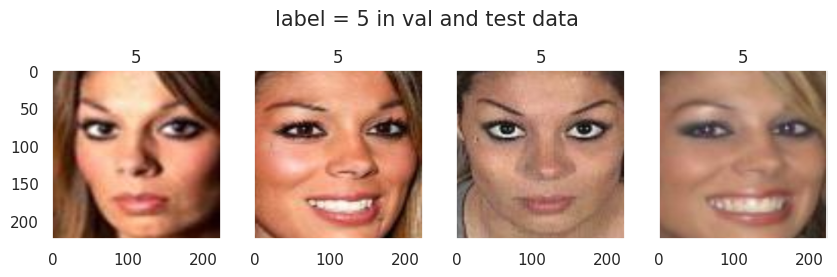

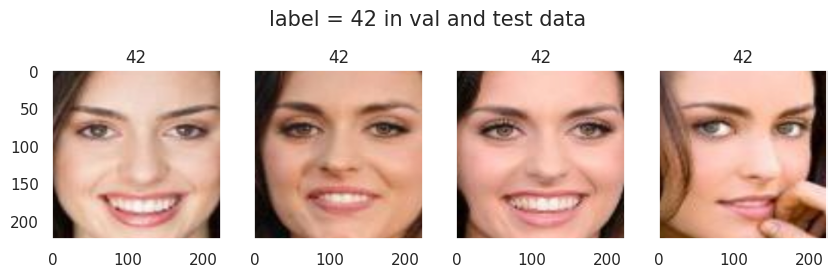

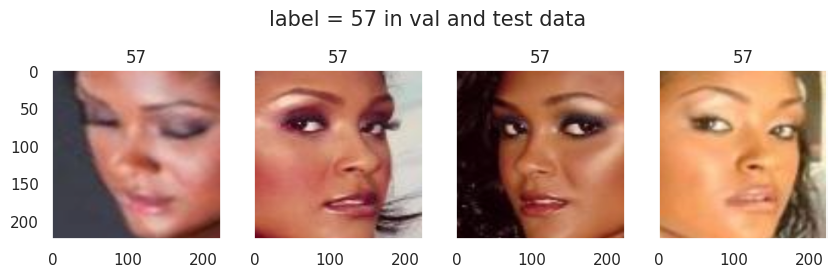

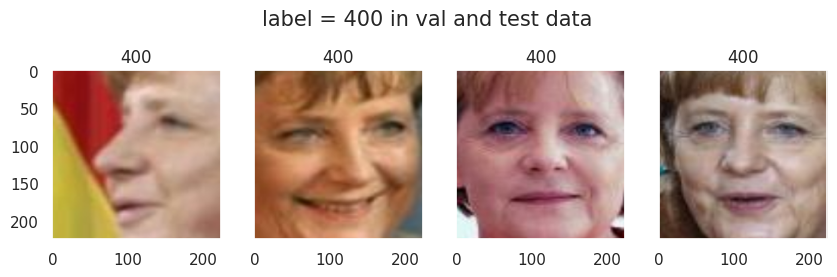

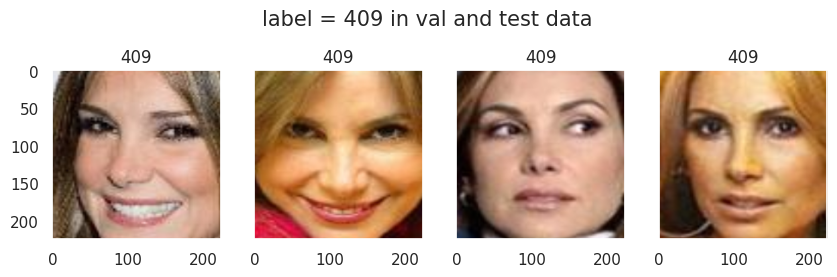

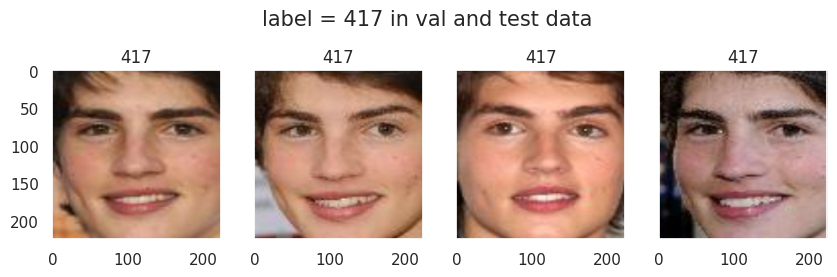

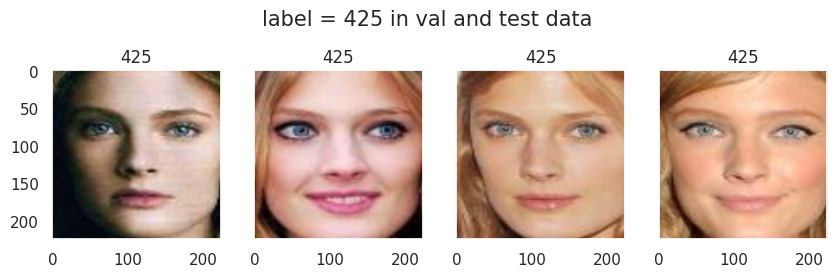

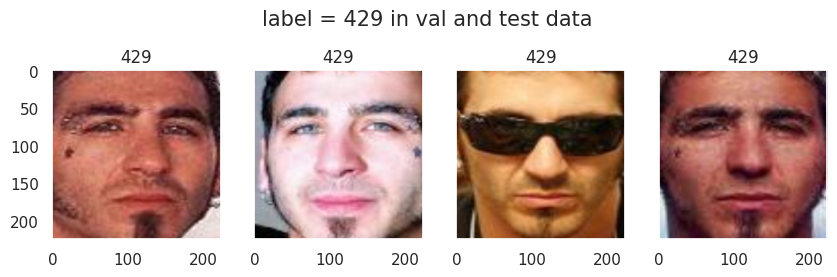

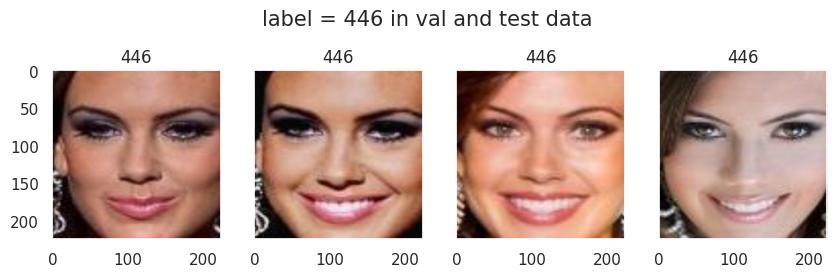

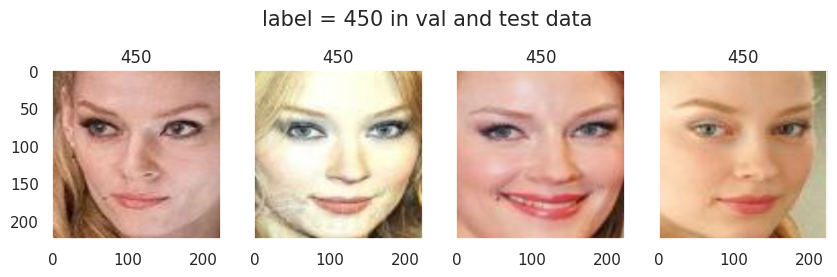

In [25]:
i = 0
for label in ids[:10]:
    fig, ax = plt.subplots(
        nrows=1,
        ncols=4,
        figsize=(10, 3),
        sharey=True,
        sharex=True
        )
    for fig_x in ax.flatten():
        # print(i)
        im_val, _ = top10_labels[i]
        imshow(im_val.data.cpu(), title=f'{label}', plt_ax=fig_x)
        i += 1
    i += 5
        
    fig.suptitle(f"label = {label} in val and test data", fontsize=15)

#### Распределение эмбеддингов сэмпла классов для модели обученной с CE loss:

Text(0, 0.5, 't-SNE Component 2')

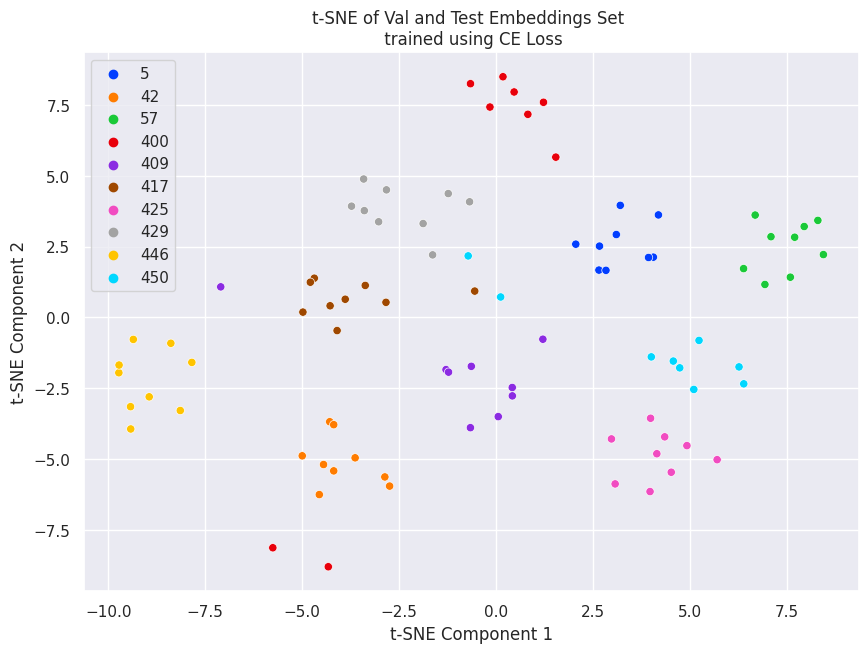

In [26]:
test_embeddings = []
test_labels = []

with torch.no_grad():
    for inputs, labels in top10_labels:  
        inputs = inputs.unsqueeze(0).to(DEVICE)
        embeddings = model(inputs)
        test_embeddings.append(embeddings.to("cpu").numpy())
        test_labels.append(labels)

test_embeddings = np.concatenate(test_embeddings)
test_labels = np.array(test_labels)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(np.array(test_embeddings))

plt.figure(figsize=(10, 7))
sns.scatterplot(x = tsne_result[:, 0], y = tsne_result[:, 1], hue=test_labels, palette='bright', style=labels)
plt.title('t-SNE of Val and Test Embeddings Set \n trained using CE Loss')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

#### Распределение эмбеддингов сэмпла классов для модели обученной с ArcFace loss:

Text(0, 0.5, 't-SNE Component 2')

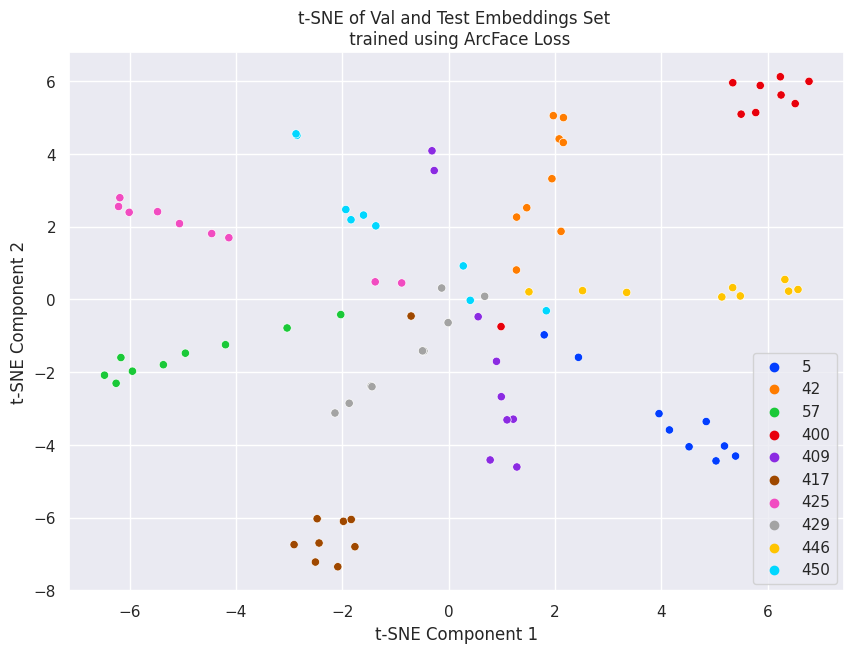

In [28]:
test_embeddings = []
test_labels = []

with torch.no_grad():
    for inputs, labels in top10_labels:  
        inputs = inputs.unsqueeze(0).to(DEVICE)
        embeddings = model_arc(inputs)
        test_embeddings.append(embeddings.to("cpu").numpy())
        test_labels.append(labels)

test_embeddings = np.concatenate(test_embeddings)
test_labels = np.array(test_labels)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(np.array(test_embeddings))

plt.figure(figsize=(10, 7))
sns.scatterplot(x = tsne_result[:, 0], y = tsne_result[:, 1], hue=test_labels, palette='bright', style=labels)
plt.title('t-SNE of Val and Test Embeddings Set \n trained using ArcFace Loss')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

**Краткие выводы:**
- эмбеддинги полученные моделью обученной с `CrossEntropyLoss` почти для каждого класса скопились в визуально разделимые кластеры, за исключением некоторых outliers (вероятно на этих фото тот же самый человек сильно отличался от других фото с собой, причиной могут быть очки, другой возраст, сильный поворот головы и тд);
- эмбеддинги полученные моделью обученной с `ArcFaceLoss` так же образуют визуально разделимые кластеры для каждого класса, но в то же время они характерно вытянуты вдоль одной линии, что вполне соответствует ситуации с синтетическими данными, когда проверялась работоспособность данного лосса при обучении. Данный результат хорошо отображает то как этот подход работает. 

<a name="3.5"></a>
### 3.5. Обучение нейросети на Triplet loss. (2 балла)
[к содержанию](#content) 


**Задача:** 
- реализовать Triplet loss;
- обучить сеть с нуля на нем (можно использовать модели предобученные на ImageNet. Предобученные на задачу распознавания лиц брать нельзя);
- добиться достаточного качества классификации.

**Критерий оценки:** 
- реализован Triplet loss;
- обучена сеть с нуля на нем;
- на тестовой части датасета достаточное качество классификации.

#### Triplet Loss

Triplet Loss — это один из лоссов для contrastive learning. Чтобы учить модель с помощью этого лосса, модели не нужен последний классификационный слой. Этот лосс работает прямо с эмбеддингами $x_i$ элементов, которые выдает модель.

Снова скажем, что идея лосса — заставить эмбеддинги лиц одного человека быть более близкими по некоторому расстоянию, а эмбеддинги лиц разных людей — далекими друг от друга. Общая формула лосса выглядит так:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

здесь
- $e$ — эмбеддинг входного лица (output модели)
- $p$ — "positive" эмбеддинг для входного лица (т.е. эмбеддинг такого элемента, что мы хотим, чтобы $e$ и $p$ были близки. В нашем случае это значит, что $e$ и $p$ должны быть выходами сети на два разных фото одного и того же человека).
- $n$ — "negative" эмбеддинг для входного лица (т.е. эмбеддинг такого элемента, что мы хотим, чтобы $e$ и $p$ были далеки. В нашем случае это значит, что $e$ и $p$ должны быть выходами сети на два разных фото разных людей).
- $d(x, y)$ — метрика расстояния между эмбеддингами, по которой мы их сравниваем.
- margin — гиперпараметр, который заставляет $d(a, p)$ и $d(a, n)$ быть еще дальше друг от друга.

**Эмбеддинги $e$, $p$ и $n$ нужно нормализовать, прежде чем подавать в лосс-функцию**.

У TripletLoss есть куча разных вариаций. В некоторых из них больше гиперпараметров, в других предлагают использовать больше одного позитивного и негативного эмбеддинга за раз. Где-то предлагается умный способ выбора negative эмбеддинга (например, выбирается такой, на котором нейросеть пока плохо работает, т.е. считает $e$ и $n$ близкими).

Пример реализации TripletLoss можно найти [здесь](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss).

Будьте готовы, что TripletLoss придется настраивать, чтобы добиться хорошего результата при обучении сети.

<br >

**Что нужно учесть при реализации Triplet Loss**:
- при обучении мы обычно хотим следить за ходом обучения модели, считая какую-то метрику качества. Тут у нас больше нет классификационного слоя, так что accuracy мы считать не можем. Нужно придумать, как в случае Triplet Loss считать метрику качества на вализации в течение обучения. Подумайте, как можно это сделать?
- скорее всего, чтобы обучить сеть на Triplet Loss, придется написать кастомный Dalaset/Dataloader, который будет возвращать тройки элементов (anchor, positive, negative).
- не забудьте нормализовать эмбеддинги перед подсчетом лосса! Это можно сделать руками, а можно, например, добавить в конец сети batchnorm без обучаемых параметров.

<br >

**Доплитература по Triplet Loss**:

- Идея TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss
- Хорошая статья про batch mining techniques для выбора positive и negative элементов: https://omoindrot.github.io/triplet-loss#triplet-mining
- Реализация TripletLoss в PyTorch : https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss
- Еще одна реализация TripletLoss: https://github.com/alfonmedela/triplet-loss-pytorch/blob/master/loss_functions/triplet_loss.py

#### Реализация TripletLoss:

In [55]:
class TripletLoss(torch.nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, embeddings, labels):
        """
        Реализует "semi-hard" подход для формирования троек (anchor, positive, negative)
        и вычисляет loss для них.

        Args:
            embeddings (torch.Tensor): Тензор эмбеддингов размерности (N, D),
                                       где N - количество примеров, D - размерность эмбеддингов.
            labels (torch.Tensor): Тензор с метками классов размерности (N).
            margin (float): Порог для определения "semi-hard" негативов.

        Returns:
            torch.Tensor: Значение Triplet Loss.
        """

        # Вычисляем сходство между всеми эмбеддингами
        similarity = torch.mm(embeddings, embeddings.t())
        distances = 1 - similarity  # Преобразуем сходство в расстояние

        loss_list = []
        batch_size = embeddings.size(0)

        for i in range(batch_size):
            anchor_label = labels[i]

            # Находим индексы положительных и отрицательных примеров
            pos_indices = torch.where(labels == anchor_label)[0]
            pos_indices = pos_indices[pos_indices != i]  # Исключаем якорь из положительных
            neg_indices = torch.where(labels != anchor_label)[0]

            # Пропускаем итерацию, если нет положительных или отрицательных примеров
            if pos_indices.size(0) == 0 or neg_indices.size(0) == 0:
                continue

            # Получаем расстояния до положительных и отрицательных примеров
            pos_distances_all = distances[i][pos_indices]
            neg_distances_all = distances[i][neg_indices]

            d_ap = pos_distances_all.max()  # Максимальное расстояние до положительного

            # Создаем маску для semi-hard негативов
            semi_hard_mask = (neg_distances_all > d_ap) & (neg_distances_all < d_ap + self.margin)
            
            if semi_hard_mask.sum() > 0:
                d_an = neg_distances_all[semi_hard_mask].min()  # Минимальное расстояние до semi-hard негатива
            else:
                continue

            # Вычисляем loss для текущего якоря
            loss_i = F.relu(d_ap - d_an + self.margin)
            loss_list.append(loss_i)

        # Если не было ни одного loss, возвращаем 0
        if len(loss_list) == 0:
            return torch.tensor(0.0, requires_grad=True)

        return torch.stack(loss_list).mean()  # Возвращаем средний loss

#### Обучение нейросети с TripletLoss:


**Выберем сеть для обучения:**

In [56]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNetModified(nn.Module):
    def __init__(self): #, emb_size
        super(EfficientNetModified, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT)

        # Заменяем последний слой на новый с emb_size
        # self.net.classifier = nn.Linear(self.net.classifier[1].in_features, emb_size)
        self.net.classifier = nn.Identity()   

    def forward(self, x):
        return F.normalize(self.net(x))

**для того чтобы обучаться, используя TripletLoss, изменим функцию для обучения сети:**

In [57]:
def train_model_with_triplet(
    model, 
    train_loader,
    val_loader,
    query_dict,
    query_imgs,
    query_names,
    distractors_imgs,
    criterion,
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda',
    fpr=0.01
):
    
    train_losses, val_losses = [], []
    
    best_val_loss = float('inf')
    counter = 0
    
    for epoch in range(num_epochs):
        model.train()  
        total_train_loss = 0.0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            embeddings = model(images)
            loss_contrastive = criterion(embeddings, labels)
            loss_contrastive.backward()
            optimizer.step()

            total_train_loss += loss_contrastive.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        model.eval()  
        total_val_loss = 0.0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                embeddings = model(images)    
                val_loss_contrastive = criterion(embeddings, labels)
                total_val_loss += val_loss_contrastive.item()

        avg_val_loss = total_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch + 1} / {num_epochs}], Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}')

        scheduler.step(avg_val_loss)

        if (epoch + 1) % 2 == 0:
            query_embeddings = compute_embeddings(model, query_imgs)
            distractor_embeddings = compute_embeddings(model, distractors_imgs)
            
            cosine_query_pos = compute_cosine_query_pos(query_dict, query_names, query_embeddings)
            cosine_query_neg = compute_cosine_query_neg(query_dict, query_names, query_embeddings)
            cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractor_embeddings)

            threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr)
            print(f"at FPR = {fpr}: threshold = {threshold:.3}; TPR = {tpr:.3}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            print(f'No improvement in validation loss for {counter} epochs.')

        if counter >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break
        
    return train_losses, val_losses

**создадим директорию для сохранения чекпоинтов модели:**


In [58]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

**создадим даталоудер:**


In [59]:
# Создание DataLoader
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

for image, label in train_loader:
    print("batch shape:", image.shape)
    break

batch shape: torch.Size([128, 3, 224, 224])


**запустим обучение:**

In [78]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()

model_triplet = EfficientNetModified() 
print(f"device: {DEVICE}")
model_triplet.to(DEVICE)

if torch.cuda.device_count() > 1:
    print(f'Using {torch.cuda.device_count()} GPUs')
    model_triplet = nn.DataParallel(model_triplet)

criterion = TripletLoss(0.7) 
optimizer = optim.Adam(model_triplet.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, val_losses = train_model_with_triplet(
    model_triplet, 
    train_loader,
    val_loader,
    query_dict,
    query_img_paths,
    query_img_names, 
    distractors_img_paths,
    criterion,
    optimizer, 
    scheduler, 
    num_epochs=50, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="efficientnetb1_with_triplet", 
    device=DEVICE,
    # fpr=0.01
) 

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


device: cuda:0
Using 2 GPUs


Epoch 1/50: 100%|██████████| 15/15 [00:09<00:00,  1.50batch/s]


Epoch [1 / 50], Train Loss: 0.6879, Validation Loss: 0.7954


Epoch 2/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [2 / 50], Train Loss: 0.6832, Validation Loss: 0.7924
at FPR = 0.01: threshold = 0.667; TPR = 0.166


Epoch 3/50: 100%|██████████| 15/15 [00:10<00:00,  1.43batch/s]


Epoch [3 / 50], Train Loss: 0.6796, Validation Loss: 0.7873


Epoch 4/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [4 / 50], Train Loss: 0.6742, Validation Loss: 0.7851
at FPR = 0.01: threshold = 0.745; TPR = 0.19


Epoch 5/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [5 / 50], Train Loss: 0.6697, Validation Loss: 0.7817


Epoch 6/50: 100%|██████████| 15/15 [00:10<00:00,  1.42batch/s]


Epoch [6 / 50], Train Loss: 0.6691, Validation Loss: 0.7788
at FPR = 0.01: threshold = 0.72; TPR = 0.262


Epoch 7/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [7 / 50], Train Loss: 0.6613, Validation Loss: 0.7772


Epoch 8/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [8 / 50], Train Loss: 0.6598, Validation Loss: 0.7742
at FPR = 0.01: threshold = 0.678; TPR = 0.319


Epoch 9/50: 100%|██████████| 15/15 [00:10<00:00,  1.41batch/s]


Epoch [9 / 50], Train Loss: 0.6578, Validation Loss: 0.7725


Epoch 10/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [10 / 50], Train Loss: 0.6532, Validation Loss: 0.7706
at FPR = 0.01: threshold = 0.638; TPR = 0.328


Epoch 11/50: 100%|██████████| 15/15 [00:10<00:00,  1.50batch/s]


Epoch [11 / 50], Train Loss: 0.6510, Validation Loss: 0.7691


Epoch 12/50: 100%|██████████| 15/15 [00:09<00:00,  1.56batch/s]


Epoch [12 / 50], Train Loss: 0.6514, Validation Loss: 0.7687
at FPR = 0.01: threshold = 0.659; TPR = 0.327


Epoch 13/50: 100%|██████████| 15/15 [00:10<00:00,  1.42batch/s]


Epoch [13 / 50], Train Loss: 0.6472, Validation Loss: 0.7640


Epoch 14/50: 100%|██████████| 15/15 [00:09<00:00,  1.50batch/s]


Epoch [14 / 50], Train Loss: 0.6405, Validation Loss: 0.7607
at FPR = 0.01: threshold = 0.64; TPR = 0.327


Epoch 15/50: 100%|██████████| 15/15 [00:09<00:00,  1.51batch/s]


Epoch [15 / 50], Train Loss: 0.6347, Validation Loss: 0.7567


Epoch 16/50: 100%|██████████| 15/15 [00:09<00:00,  1.54batch/s]


Epoch [16 / 50], Train Loss: 0.6361, Validation Loss: 0.7569
at FPR = 0.01: threshold = 0.599; TPR = 0.369
No improvement in validation loss for 1 epochs.


Epoch 17/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [17 / 50], Train Loss: 0.6337, Validation Loss: 0.7563


Epoch 18/50: 100%|██████████| 15/15 [00:09<00:00,  1.51batch/s]


Epoch [18 / 50], Train Loss: 0.6291, Validation Loss: 0.7524
at FPR = 0.01: threshold = 0.623; TPR = 0.373


Epoch 19/50: 100%|██████████| 15/15 [00:10<00:00,  1.44batch/s]


Epoch [19 / 50], Train Loss: 0.6246, Validation Loss: 0.7494


Epoch 20/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [20 / 50], Train Loss: 0.6163, Validation Loss: 0.7484
at FPR = 0.01: threshold = 0.58; TPR = 0.406


Epoch 21/50: 100%|██████████| 15/15 [00:10<00:00,  1.43batch/s]


Epoch [21 / 50], Train Loss: 0.6182, Validation Loss: 0.7417


Epoch 22/50: 100%|██████████| 15/15 [00:10<00:00,  1.42batch/s]


Epoch [22 / 50], Train Loss: 0.6101, Validation Loss: 0.7406
at FPR = 0.01: threshold = 0.581; TPR = 0.388


Epoch 23/50: 100%|██████████| 15/15 [00:09<00:00,  1.54batch/s]


Epoch [23 / 50], Train Loss: 0.6074, Validation Loss: 0.7424
No improvement in validation loss for 1 epochs.


Epoch 24/50: 100%|██████████| 15/15 [00:10<00:00,  1.45batch/s]


Epoch [24 / 50], Train Loss: 0.6099, Validation Loss: 0.7351
at FPR = 0.01: threshold = 0.575; TPR = 0.411


Epoch 25/50: 100%|██████████| 15/15 [00:10<00:00,  1.47batch/s]


Epoch [25 / 50], Train Loss: 0.6023, Validation Loss: 0.7340


Epoch 26/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [26 / 50], Train Loss: 0.6040, Validation Loss: 0.7283
at FPR = 0.01: threshold = 0.546; TPR = 0.424


Epoch 27/50: 100%|██████████| 15/15 [00:10<00:00,  1.49batch/s]


Epoch [27 / 50], Train Loss: 0.5907, Validation Loss: 0.7236


Epoch 28/50: 100%|██████████| 15/15 [00:11<00:00,  1.34batch/s]


Epoch [28 / 50], Train Loss: 0.5877, Validation Loss: 0.7250
at FPR = 0.01: threshold = 0.534; TPR = 0.43
No improvement in validation loss for 1 epochs.


Epoch 29/50: 100%|██████████| 15/15 [00:09<00:00,  1.50batch/s]


Epoch [29 / 50], Train Loss: 0.5929, Validation Loss: 0.7200


Epoch 30/50: 100%|██████████| 15/15 [00:09<00:00,  1.50batch/s]


Epoch [30 / 50], Train Loss: 0.5830, Validation Loss: 0.7174
at FPR = 0.01: threshold = 0.52; TPR = 0.409


Epoch 31/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [31 / 50], Train Loss: 0.5767, Validation Loss: 0.7124


Epoch 32/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [32 / 50], Train Loss: 0.5771, Validation Loss: 0.7185
at FPR = 0.01: threshold = 0.55; TPR = 0.381
No improvement in validation loss for 1 epochs.


Epoch 33/50: 100%|██████████| 15/15 [00:10<00:00,  1.42batch/s]


Epoch [33 / 50], Train Loss: 0.5736, Validation Loss: 0.7115


Epoch 34/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [34 / 50], Train Loss: 0.5724, Validation Loss: 0.7150
at FPR = 0.01: threshold = 0.512; TPR = 0.418
No improvement in validation loss for 1 epochs.


Epoch 35/50: 100%|██████████| 15/15 [00:10<00:00,  1.40batch/s]


Epoch [35 / 50], Train Loss: 0.5638, Validation Loss: 0.7050


Epoch 36/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [36 / 50], Train Loss: 0.5552, Validation Loss: 0.7044
at FPR = 0.01: threshold = 0.487; TPR = 0.442


Epoch 37/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [37 / 50], Train Loss: 0.5571, Validation Loss: 0.6990


Epoch 38/50: 100%|██████████| 15/15 [00:09<00:00,  1.53batch/s]


Epoch [38 / 50], Train Loss: 0.5503, Validation Loss: 0.6983
at FPR = 0.01: threshold = 0.462; TPR = 0.456


Epoch 39/50: 100%|██████████| 15/15 [00:10<00:00,  1.43batch/s]


Epoch [39 / 50], Train Loss: 0.5466, Validation Loss: 0.6952


Epoch 40/50: 100%|██████████| 15/15 [00:10<00:00,  1.43batch/s]


Epoch [40 / 50], Train Loss: 0.5364, Validation Loss: 0.6958
at FPR = 0.01: threshold = 0.47; TPR = 0.454
No improvement in validation loss for 1 epochs.


Epoch 41/50: 100%|██████████| 15/15 [00:10<00:00,  1.41batch/s]


Epoch [41 / 50], Train Loss: 0.5357, Validation Loss: 0.6980
No improvement in validation loss for 2 epochs.


Epoch 42/50: 100%|██████████| 15/15 [00:11<00:00,  1.36batch/s]


Epoch [42 / 50], Train Loss: 0.5370, Validation Loss: 0.6915
at FPR = 0.01: threshold = 0.467; TPR = 0.407


Epoch 43/50: 100%|██████████| 15/15 [00:10<00:00,  1.47batch/s]


Epoch [43 / 50], Train Loss: 0.5250, Validation Loss: 0.6799


Epoch 44/50: 100%|██████████| 15/15 [00:09<00:00,  1.51batch/s]


Epoch [44 / 50], Train Loss: 0.5219, Validation Loss: 0.6793
at FPR = 0.01: threshold = 0.438; TPR = 0.477


Epoch 45/50: 100%|██████████| 15/15 [00:10<00:00,  1.49batch/s]


Epoch [45 / 50], Train Loss: 0.5156, Validation Loss: 0.6801
No improvement in validation loss for 1 epochs.


Epoch 46/50: 100%|██████████| 15/15 [00:10<00:00,  1.45batch/s]


Epoch [46 / 50], Train Loss: 0.5122, Validation Loss: 0.6841
at FPR = 0.01: threshold = 0.467; TPR = 0.431
No improvement in validation loss for 2 epochs.


Epoch 47/50: 100%|██████████| 15/15 [00:10<00:00,  1.46batch/s]


Epoch [47 / 50], Train Loss: 0.5099, Validation Loss: 0.6854
No improvement in validation loss for 3 epochs.


Epoch 48/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [48 / 50], Train Loss: 0.4900, Validation Loss: 0.6535
at FPR = 0.01: threshold = 0.409; TPR = 0.479


Epoch 49/50: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [49 / 50], Train Loss: 0.4724, Validation Loss: 0.6505


Epoch 50/50: 100%|██████████| 15/15 [00:10<00:00,  1.43batch/s]


Epoch [50 / 50], Train Loss: 0.4593, Validation Loss: 0.6384
at FPR = 0.01: threshold = 0.394; TPR = 0.494


**выведем графики изменения loss и accuracy в зависимости от эпохи обучения:**


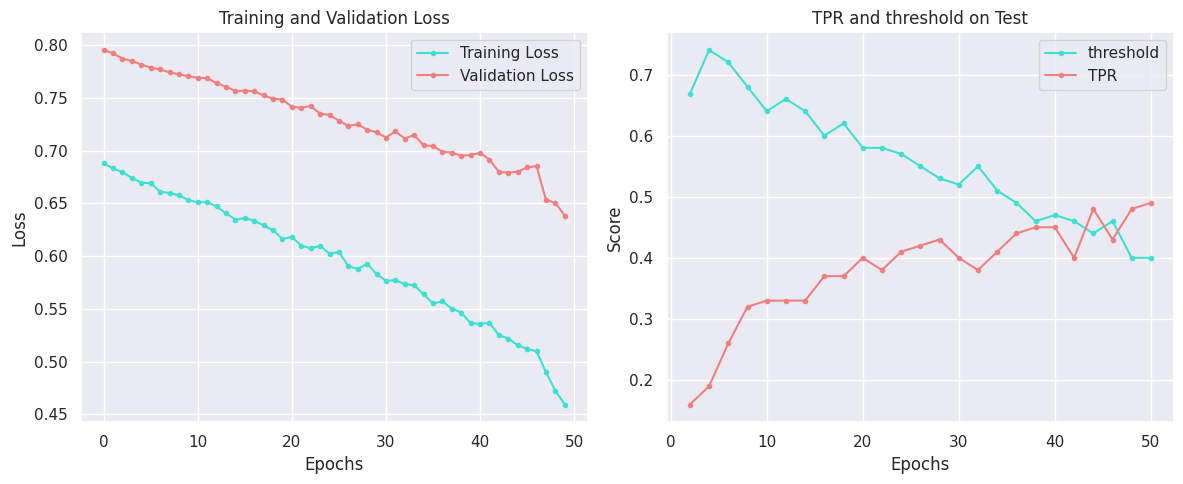

In [80]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='turquoise', marker='.')
plt.plot(val_losses, label='Validation Loss', color='lightcoral', marker='.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

threshold_hist = [
    0.668,  # Epoch 2
    0.740,  # Epoch 4
    0.720,  # Epoch 6
    0.680,  # Epoch 8
    0.640,  # Epoch 10
    0.660,  # Epoch 12
    0.640,  # Epoch 14
    0.600,  # Epoch 16
    0.620,  # Epoch 18
    0.580,  # Epoch 20
    0.580,  # Epoch 22
    0.570,  # Epoch 24
    0.550,  # Epoch 26
    0.530,  # Epoch 28
    0.520,  # Epoch 30
    0.550,  # Epoch 32
    0.510,  # Epoch 34
    0.490,  # Epoch 36
    0.460,  # Epoch 38
    0.470,  # Epoch 40
    0.460,  # Epoch 42
    0.440,  # Epoch 44
    0.460,  # Epoch 46
    0.400,  # Epoch 48
    0.400   # Epoch 50
]

tpr_hist = [
    0.160,  # Epoch 2
    0.190,  # Epoch 4
    0.260,  # Epoch 6
    0.320,  # Epoch 8
    0.330,  # Epoch 10
    0.330,  # Epoch 12
    0.330,  # Epoch 14
    0.370,  # Epoch 16
    0.370,  # Epoch 18
    0.400,  # Epoch 20
    0.380,  # Epoch 22
    0.410,  # Epoch 24
    0.420,  # Epoch 26
    0.430,  # Epoch 28
    0.400,  # Epoch 30
    0.380,  # Epoch 32
    0.410,  # Epoch 34
    0.440,  # Epoch 36
    0.450,  # Epoch 38
    0.450,  # Epoch 40
    0.400,  # Epoch 42
    0.480,  # Epoch 44
    0.430,  # Epoch 46
    0.480,  # Epoch 48
    0.490   # Epoch 50
]
plt.subplot(1, 2, 2)
plt.plot(list(range(2, 52, 2)), threshold_hist, label='threshold', color='turquoise', marker='.')
plt.plot(list(range(2, 52, 2)), tpr_hist, label='TPR', color='lightcoral', marker='.')
plt.title('TPR and threshold on Test')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()


**сохраним модель:**

In [81]:
checkpoint_path='/kaggle/working/runs/efficientnetb1_with_triplet_trained_50_epochs.pth'
torch.save(model_triplet.state_dict(), checkpoint_path)

#### IRM для модели с TripletLoss:

**Посчитаем Identification Rate Metric для значений fpr = [0.5, 0.2, 0.1, 0.05].**

In [82]:
model_triplet.eval()

query_embeddings = compute_embeddings(model_triplet, query_img_paths)
distractor_embeddings = compute_embeddings(model_triplet, distractors_img_paths)
print(f"query_embeddings.shape: {query_embeddings.shape}")
print(f"distractor_embeddings.shape: {distractor_embeddings.shape}")

cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, query_embeddings)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractor_embeddings)

for fpr in [0.5, 0.2, 0.1, 0.05, 0.01]:
    threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    print(f"at FPR = {fpr}: threshold = {threshold:.3}, TPR = {tpr:.3}")

query_embeddings.shape: (1222, 1280)
distractor_embeddings.shape: (2001, 1280)
at FPR = 0.5: threshold = 0.00682, TPR = 0.974
at FPR = 0.2: threshold = 0.1, TPR = 0.915
at FPR = 0.1: threshold = 0.17, TPR = 0.84
at FPR = 0.05: threshold = 0.241, TPR = 0.743
at FPR = 0.01: threshold = 0.394, TPR = 0.494


#### Распределение эмбеддингов сэмпла классов для модели обученной с Triplet Loss:

посмотрим на t-SNE для модели обученной с Triplet Loss на тех же лейблах, что смотрели для CE и ArcFace

90


Text(0, 0.5, 't-SNE Component 2')

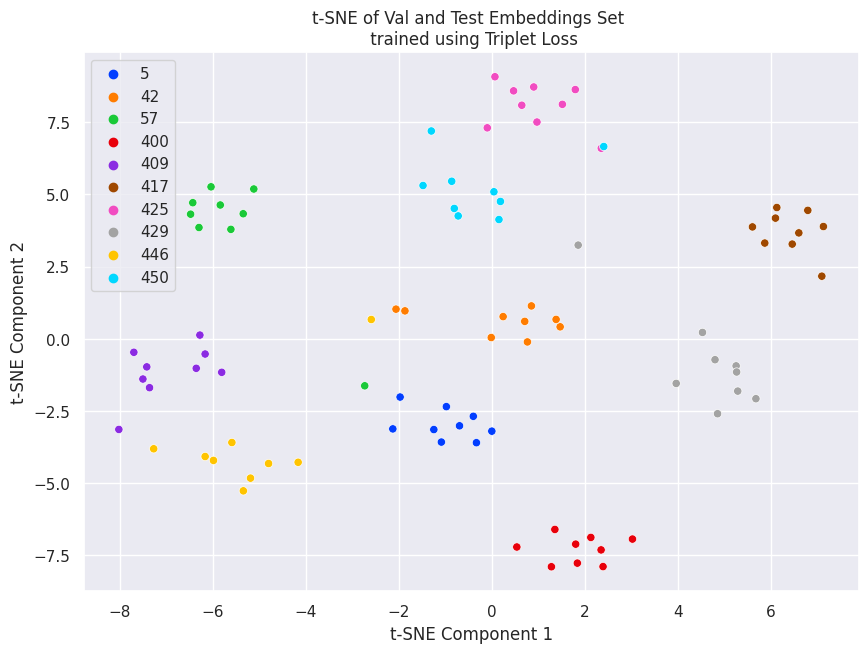

In [84]:
# вытягиваем данные для нужных лейблов:
ids = [5, 42, 57, 400, 409, 417, 425, 429, 446, 450]   

val_test_dataset = torch.utils.data.ConcatDataset([val_dataset, test_dataset]) 
top10_labels = []

for label in ids:
    i = 0
    for j in range(9):
        while (val_test_dataset[i][1] != label):
            i += 1  
        # print(val_test_dataset[i][1])
        top10_labels.append(val_test_dataset[i])
        i += 1

print(len(top10_labels))

# Визуализируем t-SNE:
test_embeddings = []
test_labels = []

with torch.no_grad():
    for inputs, labels in top10_labels:  
        inputs = inputs.unsqueeze(0).to(DEVICE)
        embeddings = model_triplet(inputs)
        test_embeddings.append(embeddings.to("cpu").numpy())
        test_labels.append(labels)

test_embeddings = np.concatenate(test_embeddings)
test_labels = np.array(test_labels)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(np.array(test_embeddings))

plt.figure(figsize=(10, 7))
sns.scatterplot(x = tsne_result[:, 0], y = tsne_result[:, 1], hue=test_labels, palette='bright', style=labels)
plt.title('t-SNE of Val and Test Embeddings Set \n trained using Triplet Loss')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

**Краткие выводы:**

- IRM оценки на тестовом датасете `celebA-ir` для модели обученной на `TripletLoss` оказались самыми высокими, по сравнению с IRM для моделями с `CrossEntropyLoss` и `ArcFaceLoss`;
- t-SNE распределение эмбеддингов так же как и для предыдущих лоссов скопилось в кластеры, но в отличие от распределения для `CrossEntropyLoss` образованные облака находятся гораздо дальше друг от друга, неудивительно, что IRM оценки на тесте самые лучшие у модели обученной с данным лоссом.

<a name="3.6"></a>
### 3.6. Обучение нейросети на смеси ArcFace loss и Triplet loss. (1 балла)
[к содержанию](#content) 


**Задача:** 
- обучить сеть на смеси ArcFace loss и Triplet loss;
- добиться достаточного качества классификации.

**Критерий оценки:** 
- обучена сеть на смеси ArcFace loss и Triplet loss;
- accuracy на тестовой части датасета CelebA-500 > 0.7.

#### Другие лосс-функции

Кроме ArcFace и Triplet Loss, есть еще много разных вариантов лоссов для задачи face recognition. Некоторые из них можно найти, например, [тут](https://openaccess.thecvf.com/content_CVPRW_2020/papers/w48/Hsu_A_Comprehensive_Study_on_Loss_Functions_for_Cross-Factor_Face_Recognition_CVPRW_2020_paper.pdf). Вы можете попробовать реализовать другие лосс-функции в этом проекте.

Кроме этого, можно миксовать лосс-функции. Например, обучать нейросеть на сумме ArcFace и TripletLoss. Часто так выходит лучше, чем если обучать на каком-то одном лоссе.

<a name="conclusion"></a>
### Заключение:
[к содержанию](#content)

В ходе выполнения проекта по распознаванию лиц были исследованы различные подходы к обучению моделей, включая использование Cross-Entropy Loss, ArcFace Loss и Triplet Loss. Основной целью было улучшение точности распознавания лиц и снижение числа ошибок при идентификации.

По итогу были получены следующие результаты:

1. Точность модели:

   - Модель, обученная с использованием Cross-Entropy Loss (CE Loss), показала точность 77.66% на тестовой выборке.

   - Модель, обученная с ArcFace Loss, продемонстрировала значительное улучшение с точностью 87.73%. Это подтверждает эффективность ArcFace Loss в задачах распознавания лиц.

2. Метрики идентификации (IRM):

   • Для модели с CE Loss наблюдаются высокие значения True Positive Rate (TPR) на различных уровнях False Positive Rate (FPR), однако, с увеличением FPR, TPR быстро снижается.

   • Модель с ArcFace Loss показала улучшенные показатели по сравнению с CE Loss, особенно на высоких уровнях FPR, но TPR все еще оставалась ниже, что может указывать на потенциальное переобучение модели.

   • Модель, обученная с Triplet Loss, достигла наилучших результатов по IRM, особенно на малых значениях. Это подтверждает гипотезу о том, что Triplet Loss лучше подходит для задач, требующих высокой точности в различении классов, особенно когда классов очень много. 

3. Качество эмбеддингов:

   • t-SNE представление эмбеддингов показало, что при использовании ArcFace Loss эмбеддинги объектов одного класса стали более сжатыми и вытянутыми в линии, что указывает на близость углов между векторами одного класса и матрицей весов.

   • Эмбеддинги, полученные с помощью CE Loss, также образовали визуально разделимые кластеры, но имели больше outliers, что может быть связано с различиями в изображениях (например, изменения внешности).

   • Эмбеддинги от модели с Triplet Loss демонстрируют наиболее четкое разделение классов, что объясняет их высокие оценки IRM.

4. Сравнительный анализ версий ArcFace Loss:

   • Обучение модели с ArcFace Loss второй версии (где матрица весов классификатора инициализируется в отдельной функции) показало более быструю сходимость и лучшую точность по сравнению с первой версией (где матрица весов классификатора инициализурется в классе модели). Возможные факторы, влияющие на это: использование различных весов (IMAGENET1KV1 против IMAGENET1KV2) и изменение скорости обучения (learning rate).

   • Несмотря на улучшения, необходимо провести дополнительные эксперименты для выяснения влияния каждого из этих факторов на результаты.

**Итоговые результаты:**

**accuracy на тестовой выборке:**
  - для efficientnetb1 с CE Loss: 77.66%
  - для efficientnetb1 с ArcFace Loss: 87.73%

**IRM на датасете celebA-ir:**

    - с CE Loss:
  
        at FPR = 0.5: threshold = 0.241; TPR = 0.98
        at FPR = 0.2: threshold = 0.338; TPR = 0.903
        at FPR = 0.1: threshold = 0.391; TPR = 0.812
        at FPR = 0.05: threshold = 0.436; TPR = 0.703
        
    - с ArcFaceLoss:

        at FPR = 0.5: threshold = 0.0475; TPR = 0.948
        at FPR = 0.2: threshold = 0.105; TPR = 0.855
        at FPR = 0.1: threshold = 0.14; TPR = 0.776
        at FPR = 0.05: threshold = 0.174; TPR = 0.695
    
    - с TripletLoss:
       
        at FPR = 0.5: threshold = 0.00682, TPR = 0.974
        at FPR = 0.2: threshold = 0.1, TPR = 0.915
        at FPR = 0.1: threshold = 0.17, TPR = 0.84
        at FPR = 0.05: threshold = 0.241, TPR = 0.743

<a name="appendix"></a>
## Приложение 
[к содержанию](#content)


#### **Доп. секция с результатами полученными при различных подходах обучения моделей в процессе работы над проектом**

### 3.1. Обучение нейросети на CE loss

- **model:** resnet50
- **weights:** IMAGENET1K_V1
- **loss:** CrossEntropyLoss

**выберем сеть для обучения:**

In [8]:
class ResNet50(nn.Module):
    def __init__(self, n_classes):
        super(ResNet50, self).__init__()
        self.resnet = models.resnet50(pretrained=True)

        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, n_classes)

    def forward(self, x):
        return self.resnet(x)

In [9]:
n_classes = len(np.unique(images_info.image_id))
print("we will classify: {}".format(n_classes))

model = ResNet50(n_classes)
model = model.to(DEVICE)

we will classify: 500


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s] 


**создадим директорию для сохранения чекпоинтов модели:**

In [10]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

**создадим даталоудер:**

In [11]:
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

**создадим функцию для обучения:**

In [12]:
torch.autograd.set_detect_anomaly(True)

def train_model(
    model, 
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda'
):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    # Early stopping
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Wrap train_loader with tqdm
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_predictions / total_predictions
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        # Wrap val_loader with tqdm
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels).mean()
                val_running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            # Save model checkpoint
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        print(f'Epoch [{epoch + 1} / {num_epochs}], '
              f'Train Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies

**запустим обучение:**

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model, 
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100,
    model_name="resnet50"
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Validation: 100%|██████████| 15/15 [00:07<00:00,  1.98batch/s]


Epoch [1 / 100], Train Loss: 6.2291, Train Accuracy: 0.27%, Validation Loss: 6.1900, Validation Accuracy: 0.43%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [2 / 100], Train Loss: 6.1315, Train Accuracy: 0.81%, Validation Loss: 6.1257, Validation Accuracy: 0.53%


Validation: 100%|██████████| 15/15 [00:06<00:00,  2.14batch/s]


Epoch [3 / 100], Train Loss: 6.0508, Train Accuracy: 1.69%, Validation Loss: 6.0617, Validation Accuracy: 1.70%


Validation: 100%|██████████| 15/15 [00:06<00:00,  2.15batch/s]


Epoch [4 / 100], Train Loss: 5.9592, Train Accuracy: 3.66%, Validation Loss: 5.9875, Validation Accuracy: 3.25%


Validation: 100%|██████████| 15/15 [00:12<00:00,  1.18batch/s]


Epoch [5 / 100], Train Loss: 5.8586, Train Accuracy: 7.00%, Validation Loss: 5.8958, Validation Accuracy: 4.85%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [6 / 100], Train Loss: 5.7448, Train Accuracy: 10.48%, Validation Loss: 5.7826, Validation Accuracy: 6.18%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [7 / 100], Train Loss: 5.6149, Train Accuracy: 12.94%, Validation Loss: 5.6729, Validation Accuracy: 8.04%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [8 / 100], Train Loss: 5.4826, Train Accuracy: 15.78%, Validation Loss: 5.5475, Validation Accuracy: 9.80%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [9 / 100], Train Loss: 5.3431, Train Accuracy: 17.58%, Validation Loss: 5.4134, Validation Accuracy: 11.18%


Validation: 100%|██████████| 15/15 [00:06<00:00,  2.15batch/s]


Epoch [10 / 100], Train Loss: 5.2012, Train Accuracy: 20.11%, Validation Loss: 5.2893, Validation Accuracy: 12.94%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [11 / 100], Train Loss: 5.0553, Train Accuracy: 22.46%, Validation Loss: 5.1619, Validation Accuracy: 14.86%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [12 / 100], Train Loss: 4.9109, Train Accuracy: 24.73%, Validation Loss: 5.0225, Validation Accuracy: 16.61%


Validation: 100%|██████████| 15/15 [00:06<00:00,  2.16batch/s]


Epoch [13 / 100], Train Loss: 4.7648, Train Accuracy: 27.24%, Validation Loss: 4.8859, Validation Accuracy: 18.42%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [14 / 100], Train Loss: 4.6186, Train Accuracy: 29.63%, Validation Loss: 4.7773, Validation Accuracy: 20.45%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [15 / 100], Train Loss: 4.4758, Train Accuracy: 32.36%, Validation Loss: 4.6513, Validation Accuracy: 22.42%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [16 / 100], Train Loss: 4.3337, Train Accuracy: 34.67%, Validation Loss: 4.5423, Validation Accuracy: 24.23%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [17 / 100], Train Loss: 4.1951, Train Accuracy: 37.28%, Validation Loss: 4.4169, Validation Accuracy: 25.99%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [18 / 100], Train Loss: 4.0594, Train Accuracy: 39.68%, Validation Loss: 4.3035, Validation Accuracy: 27.90%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [19 / 100], Train Loss: 3.9203, Train Accuracy: 42.52%, Validation Loss: 4.1913, Validation Accuracy: 30.72%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [20 / 100], Train Loss: 3.7868, Train Accuracy: 44.64%, Validation Loss: 4.0626, Validation Accuracy: 32.48%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [21 / 100], Train Loss: 3.6508, Train Accuracy: 46.93%, Validation Loss: 3.9624, Validation Accuracy: 34.03%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [22 / 100], Train Loss: 3.5179, Train Accuracy: 50.54%, Validation Loss: 3.8780, Validation Accuracy: 35.94%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [23 / 100], Train Loss: 3.3849, Train Accuracy: 52.43%, Validation Loss: 3.7578, Validation Accuracy: 37.59%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [24 / 100], Train Loss: 3.2559, Train Accuracy: 55.50%, Validation Loss: 3.6767, Validation Accuracy: 39.08%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [25 / 100], Train Loss: 3.1319, Train Accuracy: 57.12%, Validation Loss: 3.5557, Validation Accuracy: 40.52%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [26 / 100], Train Loss: 3.0046, Train Accuracy: 59.63%, Validation Loss: 3.4582, Validation Accuracy: 41.69%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [27 / 100], Train Loss: 2.8823, Train Accuracy: 62.42%, Validation Loss: 3.3886, Validation Accuracy: 43.82%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [28 / 100], Train Loss: 2.7686, Train Accuracy: 64.57%, Validation Loss: 3.2807, Validation Accuracy: 45.69%


Validation: 100%|██████████| 15/15 [00:07<00:00,  1.99batch/s]


Epoch [29 / 100], Train Loss: 2.6458, Train Accuracy: 66.90%, Validation Loss: 3.2017, Validation Accuracy: 47.34%


Validation: 100%|██████████| 15/15 [00:08<00:00,  1.79batch/s]


Epoch [30 / 100], Train Loss: 2.5310, Train Accuracy: 69.00%, Validation Loss: 3.1197, Validation Accuracy: 48.94%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.00batch/s]


Epoch [31 / 100], Train Loss: 2.4207, Train Accuracy: 71.20%, Validation Loss: 3.0378, Validation Accuracy: 49.95%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [32 / 100], Train Loss: 2.3087, Train Accuracy: 73.50%, Validation Loss: 2.9708, Validation Accuracy: 51.97%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [33 / 100], Train Loss: 2.2043, Train Accuracy: 75.06%, Validation Loss: 2.8883, Validation Accuracy: 53.25%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [34 / 100], Train Loss: 2.1005, Train Accuracy: 76.72%, Validation Loss: 2.8207, Validation Accuracy: 54.69%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [35 / 100], Train Loss: 2.0010, Train Accuracy: 78.56%, Validation Loss: 2.7351, Validation Accuracy: 55.64%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [36 / 100], Train Loss: 1.9025, Train Accuracy: 80.03%, Validation Loss: 2.6769, Validation Accuracy: 56.98%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [37 / 100], Train Loss: 1.8034, Train Accuracy: 81.71%, Validation Loss: 2.6157, Validation Accuracy: 58.25%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [38 / 100], Train Loss: 1.7150, Train Accuracy: 83.16%, Validation Loss: 2.5637, Validation Accuracy: 59.32%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [39 / 100], Train Loss: 1.6182, Train Accuracy: 85.03%, Validation Loss: 2.4995, Validation Accuracy: 60.01%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [40 / 100], Train Loss: 1.5396, Train Accuracy: 86.14%, Validation Loss: 2.4341, Validation Accuracy: 60.86%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [41 / 100], Train Loss: 1.4541, Train Accuracy: 87.21%, Validation Loss: 2.3875, Validation Accuracy: 62.09%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.08batch/s]


Epoch [42 / 100], Train Loss: 1.3727, Train Accuracy: 88.72%, Validation Loss: 2.3339, Validation Accuracy: 63.21%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [43 / 100], Train Loss: 1.2995, Train Accuracy: 89.69%, Validation Loss: 2.2927, Validation Accuracy: 64.32%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [44 / 100], Train Loss: 1.2230, Train Accuracy: 90.77%, Validation Loss: 2.2455, Validation Accuracy: 64.54%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [45 / 100], Train Loss: 1.1513, Train Accuracy: 91.41%, Validation Loss: 2.1931, Validation Accuracy: 65.92%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [46 / 100], Train Loss: 1.0858, Train Accuracy: 92.28%, Validation Loss: 2.1523, Validation Accuracy: 66.35%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [47 / 100], Train Loss: 1.0159, Train Accuracy: 93.05%, Validation Loss: 2.1187, Validation Accuracy: 67.36%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.00batch/s]


Epoch [48 / 100], Train Loss: 0.9510, Train Accuracy: 93.90%, Validation Loss: 2.0677, Validation Accuracy: 67.57%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [49 / 100], Train Loss: 0.8947, Train Accuracy: 94.53%, Validation Loss: 2.0398, Validation Accuracy: 67.73%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [50 / 100], Train Loss: 0.8383, Train Accuracy: 95.28%, Validation Loss: 1.9958, Validation Accuracy: 68.74%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [51 / 100], Train Loss: 0.7799, Train Accuracy: 95.58%, Validation Loss: 1.9651, Validation Accuracy: 68.96%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [52 / 100], Train Loss: 0.7358, Train Accuracy: 96.20%, Validation Loss: 1.9362, Validation Accuracy: 68.85%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [53 / 100], Train Loss: 0.6884, Train Accuracy: 96.41%, Validation Loss: 1.9038, Validation Accuracy: 69.49%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [54 / 100], Train Loss: 0.6405, Train Accuracy: 96.99%, Validation Loss: 1.8819, Validation Accuracy: 70.13%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.06batch/s]


Epoch [55 / 100], Train Loss: 0.5966, Train Accuracy: 97.19%, Validation Loss: 1.8512, Validation Accuracy: 70.45%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.08batch/s]


Epoch [56 / 100], Train Loss: 0.5550, Train Accuracy: 97.64%, Validation Loss: 1.8260, Validation Accuracy: 70.50%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [57 / 100], Train Loss: 0.5223, Train Accuracy: 97.82%, Validation Loss: 1.7928, Validation Accuracy: 71.03%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.08batch/s]


Epoch [58 / 100], Train Loss: 0.4812, Train Accuracy: 98.24%, Validation Loss: 1.7837, Validation Accuracy: 71.14%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.02batch/s]


Epoch [59 / 100], Train Loss: 0.4520, Train Accuracy: 98.41%, Validation Loss: 1.7479, Validation Accuracy: 70.93%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [60 / 100], Train Loss: 0.4163, Train Accuracy: 98.62%, Validation Loss: 1.7419, Validation Accuracy: 71.30%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [61 / 100], Train Loss: 0.3923, Train Accuracy: 98.62%, Validation Loss: 1.7066, Validation Accuracy: 71.51%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [62 / 100], Train Loss: 0.3665, Train Accuracy: 98.86%, Validation Loss: 1.6920, Validation Accuracy: 71.94%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [63 / 100], Train Loss: 0.3413, Train Accuracy: 99.01%, Validation Loss: 1.6725, Validation Accuracy: 71.78%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [64 / 100], Train Loss: 0.3136, Train Accuracy: 99.23%, Validation Loss: 1.6528, Validation Accuracy: 72.58%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [65 / 100], Train Loss: 0.2961, Train Accuracy: 99.31%, Validation Loss: 1.6365, Validation Accuracy: 71.30%


Validation: 100%|██████████| 15/15 [00:10<00:00,  1.48batch/s]


Epoch [66 / 100], Train Loss: 0.2759, Train Accuracy: 99.39%, Validation Loss: 1.6234, Validation Accuracy: 72.10%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [67 / 100], Train Loss: 0.2611, Train Accuracy: 99.45%, Validation Loss: 1.6035, Validation Accuracy: 71.78%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [68 / 100], Train Loss: 0.2414, Train Accuracy: 99.60%, Validation Loss: 1.5864, Validation Accuracy: 72.63%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [69 / 100], Train Loss: 0.2257, Train Accuracy: 99.67%, Validation Loss: 1.5725, Validation Accuracy: 72.63%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [70 / 100], Train Loss: 0.2111, Train Accuracy: 99.68%, Validation Loss: 1.5661, Validation Accuracy: 72.74%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [71 / 100], Train Loss: 0.2001, Train Accuracy: 99.73%, Validation Loss: 1.5435, Validation Accuracy: 73.00%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [72 / 100], Train Loss: 0.1859, Train Accuracy: 99.78%, Validation Loss: 1.5383, Validation Accuracy: 72.95%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [73 / 100], Train Loss: 0.1728, Train Accuracy: 99.84%, Validation Loss: 1.5156, Validation Accuracy: 72.90%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [74 / 100], Train Loss: 0.1613, Train Accuracy: 99.91%, Validation Loss: 1.5068, Validation Accuracy: 72.90%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [75 / 100], Train Loss: 0.1529, Train Accuracy: 99.92%, Validation Loss: 1.5000, Validation Accuracy: 73.59%


Validation: 100%|██████████| 15/15 [00:06<00:00,  2.15batch/s]


Epoch [76 / 100], Train Loss: 0.1422, Train Accuracy: 99.92%, Validation Loss: 1.4848, Validation Accuracy: 73.70%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.05batch/s]


Epoch [77 / 100], Train Loss: 0.1321, Train Accuracy: 99.94%, Validation Loss: 1.4801, Validation Accuracy: 73.70%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.11batch/s]


Epoch [78 / 100], Train Loss: 0.1252, Train Accuracy: 99.98%, Validation Loss: 1.4601, Validation Accuracy: 73.59%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [79 / 100], Train Loss: 0.1193, Train Accuracy: 99.95%, Validation Loss: 1.4551, Validation Accuracy: 73.75%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [80 / 100], Train Loss: 0.1095, Train Accuracy: 99.99%, Validation Loss: 1.4506, Validation Accuracy: 73.96%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [81 / 100], Train Loss: 0.1050, Train Accuracy: 99.98%, Validation Loss: 1.4329, Validation Accuracy: 74.23%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [82 / 100], Train Loss: 0.0996, Train Accuracy: 99.99%, Validation Loss: 1.4275, Validation Accuracy: 74.23%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [83 / 100], Train Loss: 0.0930, Train Accuracy: 99.99%, Validation Loss: 1.4239, Validation Accuracy: 73.32%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.12batch/s]


Epoch [84 / 100], Train Loss: 0.0880, Train Accuracy: 100.00%, Validation Loss: 1.4103, Validation Accuracy: 74.17%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [85 / 100], Train Loss: 0.0841, Train Accuracy: 99.98%, Validation Loss: 1.4056, Validation Accuracy: 73.91%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [86 / 100], Train Loss: 0.0777, Train Accuracy: 100.00%, Validation Loss: 1.3923, Validation Accuracy: 74.01%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [87 / 100], Train Loss: 0.0736, Train Accuracy: 100.00%, Validation Loss: 1.3886, Validation Accuracy: 74.23%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [88 / 100], Train Loss: 0.0710, Train Accuracy: 100.00%, Validation Loss: 1.3865, Validation Accuracy: 74.17%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.14batch/s]


Epoch [89 / 100], Train Loss: 0.0678, Train Accuracy: 100.00%, Validation Loss: 1.3732, Validation Accuracy: 73.70%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.01batch/s]


Epoch [90 / 100], Train Loss: 0.0628, Train Accuracy: 100.00%, Validation Loss: 1.3695, Validation Accuracy: 74.23%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.00batch/s]


Epoch [91 / 100], Train Loss: 0.0595, Train Accuracy: 100.00%, Validation Loss: 1.3663, Validation Accuracy: 73.75%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.04batch/s]


Epoch [92 / 100], Train Loss: 0.0557, Train Accuracy: 100.00%, Validation Loss: 1.3538, Validation Accuracy: 74.07%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.04batch/s]


Epoch [93 / 100], Train Loss: 0.0542, Train Accuracy: 100.00%, Validation Loss: 1.3502, Validation Accuracy: 74.55%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.07batch/s]


Epoch [94 / 100], Train Loss: 0.0518, Train Accuracy: 100.00%, Validation Loss: 1.3470, Validation Accuracy: 74.49%


Validation: 100%|██████████| 15/15 [00:07<00:00,  1.97batch/s]


Epoch [95 / 100], Train Loss: 0.0489, Train Accuracy: 100.00%, Validation Loss: 1.3362, Validation Accuracy: 74.07%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.10batch/s]


Epoch [96 / 100], Train Loss: 0.0460, Train Accuracy: 100.00%, Validation Loss: 1.3250, Validation Accuracy: 74.65%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.01batch/s]


Epoch [97 / 100], Train Loss: 0.0437, Train Accuracy: 100.00%, Validation Loss: 1.3230, Validation Accuracy: 74.55%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.09batch/s]


Epoch [98 / 100], Train Loss: 0.0429, Train Accuracy: 100.00%, Validation Loss: 1.3153, Validation Accuracy: 74.33%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.08batch/s]


Epoch [99 / 100], Train Loss: 0.0403, Train Accuracy: 100.00%, Validation Loss: 1.3118, Validation Accuracy: 74.60%


Validation: 100%|██████████| 15/15 [00:07<00:00,  2.13batch/s]


Epoch [100 / 100], Train Loss: 0.0382, Train Accuracy: 100.00%, Validation Loss: 1.3055, Validation Accuracy: 74.12%


**выведем графики изменения loss и accuracy в зависимости от эпохи обучения:**

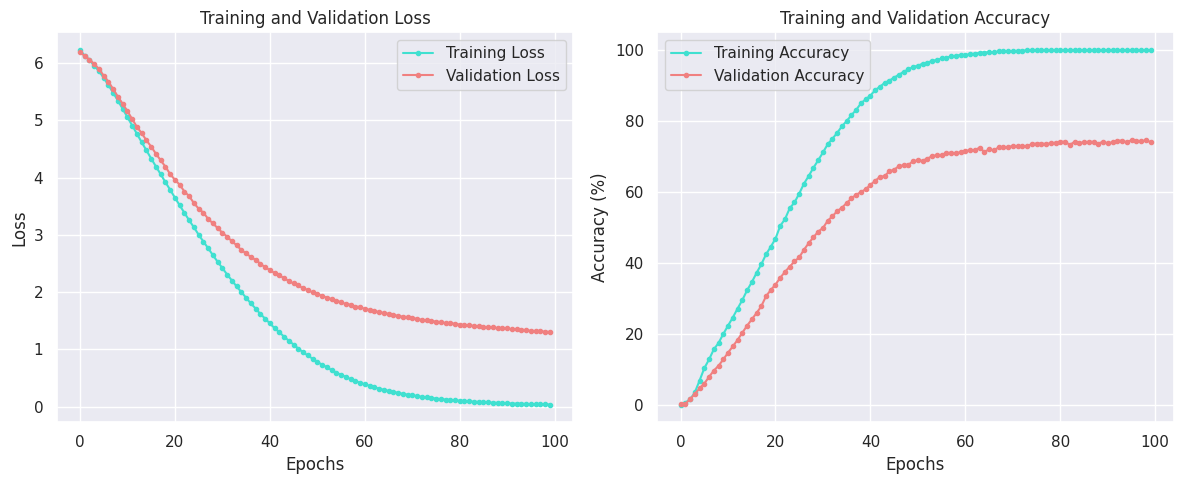

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='turquoise', marker='.')
plt.plot(val_losses, label='Validation Loss', color='lightcoral', marker='.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='turquoise', marker='.')
plt.plot(val_accuracies, label='Validation Accuracy', color='lightcoral', marker='.')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()

**оценим accuracy модели на тесте:**

In [15]:
model.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Test', unit='batch'):
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        loss = criterion(outputs, labels).mean()
        test_running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test: 100%|██████████| 13/13 [00:07<00:00,  1.78batch/s]

Test Loss: 1.3942, Test Accuracy: 73.57%


**сохраним модель:**

In [16]:
checkpoint_path='/kaggle/working/runs/resnet50_trained_100_epochs.pth'
torch.save(model.state_dict(), checkpoint_path)

### 3.3. Обучение нейросети на ArcFace loss (version 1).

- **model:** resnet50 modified - возвращает эмбеддинги и внутри инициализируются веса для вычисления логитов
- **weights:** IMAGENET1K_V1
- **loss:** ArcFace loss версии 1 - с инициализацией весов в теле модели, а не в отдельном классе вычисляющем логиты 

**Выбор сети и её модификация для работы с ArcFaceLoss (version 1):**

для того чтобы можно было вычислить ArcFaceLoss делаем так, чтобы модель возвращала:
- эмбеддинг картинки - outputs предпоследнего слоя модели
- матрицу весов последнего слоя

In [22]:
class ResNet50Modified(nn.Module):
    def __init__(self, n_classes):
        super(ResNet50Modified, self).__init__()
        
        # Загружаем предобученную модель ResNet50
        self.resnet = models.resnet50(pretrained=True)
        
        # Извлечем информацию о размере эмбеддинга
        self.emb_size = self.resnet.fc.in_features
        
        # Удаляем последний слой (классификатор)
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])

        # Создадим веса для последнего слоя
        self.weights = nn.Parameter(torch.Tensor(self.emb_size, n_classes))
        self.weights.data.uniform_(-1, 1).renorm_(2, 1, 1e-5).mul_(1e5)
        
    def forward(self, x):
        return self.resnet(x).squeeze()

**для того чтобы воспользоваться ArcFaceLoss изменим функцию для обучения сети:**

In [23]:
torch.autograd.set_detect_anomaly(True)

def train_model_with_arcface(
    model, 
    train_loader,
    val_loader,
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda'
):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    # Early stopping
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Wrap train_loader with tqdm
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            features = model(images)
            logits = features @ model.weights
            loss = criterion(features, model.weights, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(logits.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_predictions / total_predictions
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        # Wrap val_loader with tqdm
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                features = model(images)
                logits = features @ model.weights
                loss = criterion(features, model.weights, labels)
                val_running_loss += loss.item()

                _, predicted = torch.max(logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            # Save model checkpoint
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        print(f'Epoch [{epoch + 1} / {num_epochs}], '
              f'Train Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies

**подготовим даталоудер:**

In [24]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

**запустим обучение:**

In [25]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()

n_classes = len(np.unique(images_info.image_id))
print(f"we will classify: {n_classes} classes")
model_arc = ResNet50Modified(n_classes) 
print(f"device: {DEVICE}")
model_arc.to(DEVICE)

criterion = ArcFaceLoss() 
optimizer = optim.Adam(model_arc.parameters(), lr=0.00001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, train_accuracies, val_losses, val_accuracies = train_model_with_arcface(
    model_arc,
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100,
    model_name="resnet50_with_arcface",
    device=DEVICE
)

we will classify: 500 classes


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 200MB/s]


device: cuda:0


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Validation: 100%|██████████| 30/30 [00:06<00:00,  4.56batch/s]


Epoch [1 / 100], Train Loss: 37.4011, Train Accuracy: 0.20%, Validation Loss: 37.0430, Validation Accuracy: 0.37%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [2 / 100], Train Loss: 36.7435, Train Accuracy: 1.49%, Validation Loss: 36.6999, Validation Accuracy: 1.54%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [3 / 100], Train Loss: 36.3430, Train Accuracy: 4.86%, Validation Loss: 36.4127, Validation Accuracy: 3.73%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [4 / 100], Train Loss: 35.9678, Train Accuracy: 10.24%, Validation Loss: 36.1417, Validation Accuracy: 7.08%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [5 / 100], Train Loss: 35.6090, Train Accuracy: 16.87%, Validation Loss: 35.8536, Validation Accuracy: 11.40%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [6 / 100], Train Loss: 35.2431, Train Accuracy: 24.49%, Validation Loss: 35.5753, Validation Accuracy: 14.80%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [7 / 100], Train Loss: 34.8810, Train Accuracy: 32.61%, Validation Loss: 35.3114, Validation Accuracy: 18.42%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [8 / 100], Train Loss: 34.5412, Train Accuracy: 39.93%, Validation Loss: 35.0368, Validation Accuracy: 21.94%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [9 / 100], Train Loss: 34.1841, Train Accuracy: 46.65%, Validation Loss: 34.7900, Validation Accuracy: 26.36%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [10 / 100], Train Loss: 33.8481, Train Accuracy: 51.70%, Validation Loss: 34.5451, Validation Accuracy: 31.36%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [11 / 100], Train Loss: 33.5001, Train Accuracy: 57.22%, Validation Loss: 34.2891, Validation Accuracy: 35.09%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [12 / 100], Train Loss: 33.1444, Train Accuracy: 62.07%, Validation Loss: 34.0395, Validation Accuracy: 37.49%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [13 / 100], Train Loss: 32.7885, Train Accuracy: 66.43%, Validation Loss: 33.8064, Validation Accuracy: 39.72%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.64batch/s]


Epoch [14 / 100], Train Loss: 32.4353, Train Accuracy: 69.84%, Validation Loss: 33.5643, Validation Accuracy: 42.55%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.64batch/s]


Epoch [15 / 100], Train Loss: 32.0625, Train Accuracy: 73.43%, Validation Loss: 33.3224, Validation Accuracy: 44.09%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.63batch/s]


Epoch [16 / 100], Train Loss: 31.6865, Train Accuracy: 76.69%, Validation Loss: 33.0726, Validation Accuracy: 46.70%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.63batch/s]


Epoch [17 / 100], Train Loss: 31.2867, Train Accuracy: 79.49%, Validation Loss: 32.8341, Validation Accuracy: 47.28%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [18 / 100], Train Loss: 30.8822, Train Accuracy: 81.43%, Validation Loss: 32.5730, Validation Accuracy: 49.57%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [19 / 100], Train Loss: 30.4772, Train Accuracy: 83.27%, Validation Loss: 32.3202, Validation Accuracy: 50.53%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [20 / 100], Train Loss: 30.0312, Train Accuracy: 85.55%, Validation Loss: 32.0663, Validation Accuracy: 51.81%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.71batch/s]


Epoch [21 / 100], Train Loss: 29.5847, Train Accuracy: 87.18%, Validation Loss: 31.7824, Validation Accuracy: 53.89%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [22 / 100], Train Loss: 29.1098, Train Accuracy: 88.97%, Validation Loss: 31.5338, Validation Accuracy: 55.11%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [23 / 100], Train Loss: 28.6357, Train Accuracy: 89.78%, Validation Loss: 31.2606, Validation Accuracy: 55.59%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [24 / 100], Train Loss: 28.1289, Train Accuracy: 90.62%, Validation Loss: 30.9474, Validation Accuracy: 57.19%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [25 / 100], Train Loss: 27.6079, Train Accuracy: 91.82%, Validation Loss: 30.6705, Validation Accuracy: 57.19%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [26 / 100], Train Loss: 27.1074, Train Accuracy: 92.68%, Validation Loss: 30.4059, Validation Accuracy: 57.93%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [27 / 100], Train Loss: 26.5390, Train Accuracy: 93.12%, Validation Loss: 30.1041, Validation Accuracy: 59.11%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [28 / 100], Train Loss: 25.9832, Train Accuracy: 93.82%, Validation Loss: 29.8038, Validation Accuracy: 58.79%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [29 / 100], Train Loss: 25.4274, Train Accuracy: 94.42%, Validation Loss: 29.4859, Validation Accuracy: 59.42%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [30 / 100], Train Loss: 24.8469, Train Accuracy: 95.05%, Validation Loss: 29.2845, Validation Accuracy: 60.44%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [31 / 100], Train Loss: 24.2453, Train Accuracy: 95.19%, Validation Loss: 28.9134, Validation Accuracy: 60.86%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [32 / 100], Train Loss: 23.6701, Train Accuracy: 95.66%, Validation Loss: 28.5968, Validation Accuracy: 61.61%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.58batch/s]


Epoch [33 / 100], Train Loss: 23.0644, Train Accuracy: 95.95%, Validation Loss: 28.3252, Validation Accuracy: 62.46%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [34 / 100], Train Loss: 22.4811, Train Accuracy: 96.64%, Validation Loss: 28.0161, Validation Accuracy: 62.67%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [35 / 100], Train Loss: 21.9015, Train Accuracy: 96.58%, Validation Loss: 27.7363, Validation Accuracy: 62.94%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [36 / 100], Train Loss: 21.2987, Train Accuracy: 96.75%, Validation Loss: 27.4196, Validation Accuracy: 63.26%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [37 / 100], Train Loss: 20.6953, Train Accuracy: 97.07%, Validation Loss: 27.1232, Validation Accuracy: 64.43%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.64batch/s]


Epoch [38 / 100], Train Loss: 20.0798, Train Accuracy: 97.32%, Validation Loss: 26.8455, Validation Accuracy: 64.75%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [39 / 100], Train Loss: 19.4547, Train Accuracy: 97.35%, Validation Loss: 26.5356, Validation Accuracy: 65.07%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [40 / 100], Train Loss: 18.8488, Train Accuracy: 97.57%, Validation Loss: 26.2659, Validation Accuracy: 65.02%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [41 / 100], Train Loss: 18.2434, Train Accuracy: 97.82%, Validation Loss: 25.9989, Validation Accuracy: 65.23%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [42 / 100], Train Loss: 17.6441, Train Accuracy: 97.92%, Validation Loss: 25.6602, Validation Accuracy: 65.71%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [43 / 100], Train Loss: 17.1205, Train Accuracy: 98.01%, Validation Loss: 25.4313, Validation Accuracy: 66.19%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [44 / 100], Train Loss: 16.5292, Train Accuracy: 97.98%, Validation Loss: 25.1182, Validation Accuracy: 66.40%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.70batch/s]


Epoch [45 / 100], Train Loss: 15.9032, Train Accuracy: 98.17%, Validation Loss: 24.8443, Validation Accuracy: 67.41%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [46 / 100], Train Loss: 15.3695, Train Accuracy: 98.38%, Validation Loss: 24.5805, Validation Accuracy: 67.31%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.60batch/s]


Epoch [47 / 100], Train Loss: 14.7753, Train Accuracy: 98.37%, Validation Loss: 24.3390, Validation Accuracy: 67.09%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [48 / 100], Train Loss: 14.2448, Train Accuracy: 98.46%, Validation Loss: 24.0725, Validation Accuracy: 67.78%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [49 / 100], Train Loss: 13.7028, Train Accuracy: 98.65%, Validation Loss: 23.8551, Validation Accuracy: 68.21%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [50 / 100], Train Loss: 13.1454, Train Accuracy: 98.61%, Validation Loss: 23.6029, Validation Accuracy: 68.42%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [51 / 100], Train Loss: 12.6990, Train Accuracy: 98.75%, Validation Loss: 23.3803, Validation Accuracy: 68.48%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [52 / 100], Train Loss: 12.0941, Train Accuracy: 98.85%, Validation Loss: 23.1672, Validation Accuracy: 68.69%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [53 / 100], Train Loss: 11.6539, Train Accuracy: 98.84%, Validation Loss: 22.8179, Validation Accuracy: 69.65%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [54 / 100], Train Loss: 11.1507, Train Accuracy: 98.97%, Validation Loss: 22.7313, Validation Accuracy: 69.38%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [55 / 100], Train Loss: 10.6120, Train Accuracy: 99.01%, Validation Loss: 22.4943, Validation Accuracy: 69.28%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [56 / 100], Train Loss: 10.1665, Train Accuracy: 98.92%, Validation Loss: 22.2597, Validation Accuracy: 70.93%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [57 / 100], Train Loss: 9.7131, Train Accuracy: 99.12%, Validation Loss: 22.0884, Validation Accuracy: 70.82%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [58 / 100], Train Loss: 9.2822, Train Accuracy: 99.08%, Validation Loss: 21.9735, Validation Accuracy: 71.03%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [59 / 100], Train Loss: 8.8404, Train Accuracy: 99.15%, Validation Loss: 21.7550, Validation Accuracy: 71.25%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [60 / 100], Train Loss: 8.4336, Train Accuracy: 99.12%, Validation Loss: 21.5333, Validation Accuracy: 71.51%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [61 / 100], Train Loss: 7.9957, Train Accuracy: 99.24%, Validation Loss: 21.3897, Validation Accuracy: 71.25%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [62 / 100], Train Loss: 7.5923, Train Accuracy: 99.23%, Validation Loss: 21.2411, Validation Accuracy: 71.03%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [63 / 100], Train Loss: 7.1967, Train Accuracy: 99.26%, Validation Loss: 21.0306, Validation Accuracy: 71.62%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [64 / 100], Train Loss: 6.8161, Train Accuracy: 99.32%, Validation Loss: 20.8002, Validation Accuracy: 71.78%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [65 / 100], Train Loss: 6.4714, Train Accuracy: 99.34%, Validation Loss: 20.7895, Validation Accuracy: 72.20%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [66 / 100], Train Loss: 6.1325, Train Accuracy: 99.50%, Validation Loss: 20.7003, Validation Accuracy: 72.04%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [67 / 100], Train Loss: 5.7443, Train Accuracy: 99.44%, Validation Loss: 20.4999, Validation Accuracy: 72.36%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [68 / 100], Train Loss: 5.4295, Train Accuracy: 99.52%, Validation Loss: 20.3644, Validation Accuracy: 72.04%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [69 / 100], Train Loss: 5.1473, Train Accuracy: 99.54%, Validation Loss: 20.1650, Validation Accuracy: 73.22%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [70 / 100], Train Loss: 4.8806, Train Accuracy: 99.56%, Validation Loss: 20.0937, Validation Accuracy: 73.22%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [71 / 100], Train Loss: 4.5310, Train Accuracy: 99.63%, Validation Loss: 19.9898, Validation Accuracy: 73.54%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [72 / 100], Train Loss: 4.2699, Train Accuracy: 99.65%, Validation Loss: 19.8508, Validation Accuracy: 73.11%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [73 / 100], Train Loss: 3.9990, Train Accuracy: 99.63%, Validation Loss: 19.8483, Validation Accuracy: 72.58%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.64batch/s]


Epoch [74 / 100], Train Loss: 3.7744, Train Accuracy: 99.65%, Validation Loss: 19.7495, Validation Accuracy: 73.48%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.66batch/s]


Epoch [75 / 100], Train Loss: 3.5047, Train Accuracy: 99.70%, Validation Loss: 19.6353, Validation Accuracy: 73.06%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [76 / 100], Train Loss: 3.2447, Train Accuracy: 99.72%, Validation Loss: 19.4939, Validation Accuracy: 73.91%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [77 / 100], Train Loss: 3.0337, Train Accuracy: 99.77%, Validation Loss: 19.5053, Validation Accuracy: 73.32%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.70batch/s]


Epoch [78 / 100], Train Loss: 2.8524, Train Accuracy: 99.71%, Validation Loss: 19.3483, Validation Accuracy: 73.64%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [79 / 100], Train Loss: 2.5830, Train Accuracy: 99.81%, Validation Loss: 19.2046, Validation Accuracy: 74.07%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.64batch/s]


Epoch [80 / 100], Train Loss: 2.4302, Train Accuracy: 99.79%, Validation Loss: 19.1974, Validation Accuracy: 73.96%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [81 / 100], Train Loss: 2.2954, Train Accuracy: 99.81%, Validation Loss: 19.1149, Validation Accuracy: 73.86%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [82 / 100], Train Loss: 2.0521, Train Accuracy: 99.85%, Validation Loss: 19.0719, Validation Accuracy: 74.12%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.70batch/s]


Epoch [83 / 100], Train Loss: 1.9346, Train Accuracy: 99.81%, Validation Loss: 19.0026, Validation Accuracy: 74.44%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.65batch/s]


Epoch [84 / 100], Train Loss: 1.7840, Train Accuracy: 99.85%, Validation Loss: 18.9280, Validation Accuracy: 73.86%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.57batch/s]


Epoch [85 / 100], Train Loss: 1.6148, Train Accuracy: 99.88%, Validation Loss: 18.8968, Validation Accuracy: 73.86%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [86 / 100], Train Loss: 1.4812, Train Accuracy: 99.88%, Validation Loss: 18.8569, Validation Accuracy: 74.17%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [87 / 100], Train Loss: 1.3858, Train Accuracy: 99.91%, Validation Loss: 18.6907, Validation Accuracy: 74.33%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [88 / 100], Train Loss: 1.2405, Train Accuracy: 99.89%, Validation Loss: 18.6717, Validation Accuracy: 74.60%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [89 / 100], Train Loss: 1.1598, Train Accuracy: 99.89%, Validation Loss: 18.7234, Validation Accuracy: 74.39%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [90 / 100], Train Loss: 1.0248, Train Accuracy: 99.94%, Validation Loss: 18.6169, Validation Accuracy: 74.39%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.69batch/s]


Epoch [91 / 100], Train Loss: 0.9327, Train Accuracy: 99.94%, Validation Loss: 18.5670, Validation Accuracy: 74.01%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.61batch/s]


Epoch [92 / 100], Train Loss: 0.8605, Train Accuracy: 99.95%, Validation Loss: 18.4420, Validation Accuracy: 74.23%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.71batch/s]


Epoch [93 / 100], Train Loss: 0.8088, Train Accuracy: 99.94%, Validation Loss: 18.6679, Validation Accuracy: 73.64%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [94 / 100], Train Loss: 0.7410, Train Accuracy: 100.00%, Validation Loss: 18.5310, Validation Accuracy: 74.60%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [95 / 100], Train Loss: 0.6690, Train Accuracy: 99.99%, Validation Loss: 18.4024, Validation Accuracy: 73.70%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [96 / 100], Train Loss: 0.6024, Train Accuracy: 99.98%, Validation Loss: 18.3629, Validation Accuracy: 74.28%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.63batch/s]


Epoch [97 / 100], Train Loss: 0.5794, Train Accuracy: 99.98%, Validation Loss: 18.3479, Validation Accuracy: 73.70%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.67batch/s]


Epoch [98 / 100], Train Loss: 0.5175, Train Accuracy: 100.00%, Validation Loss: 18.3491, Validation Accuracy: 74.55%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.68batch/s]


Epoch [99 / 100], Train Loss: 0.4811, Train Accuracy: 99.99%, Validation Loss: 18.2643, Validation Accuracy: 74.44%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.70batch/s]


Epoch [100 / 100], Train Loss: 0.4491, Train Accuracy: 99.99%, Validation Loss: 18.1340, Validation Accuracy: 74.28%


**выведем графики изменения loss и accuracy в зависимости от эпохи обучения:**

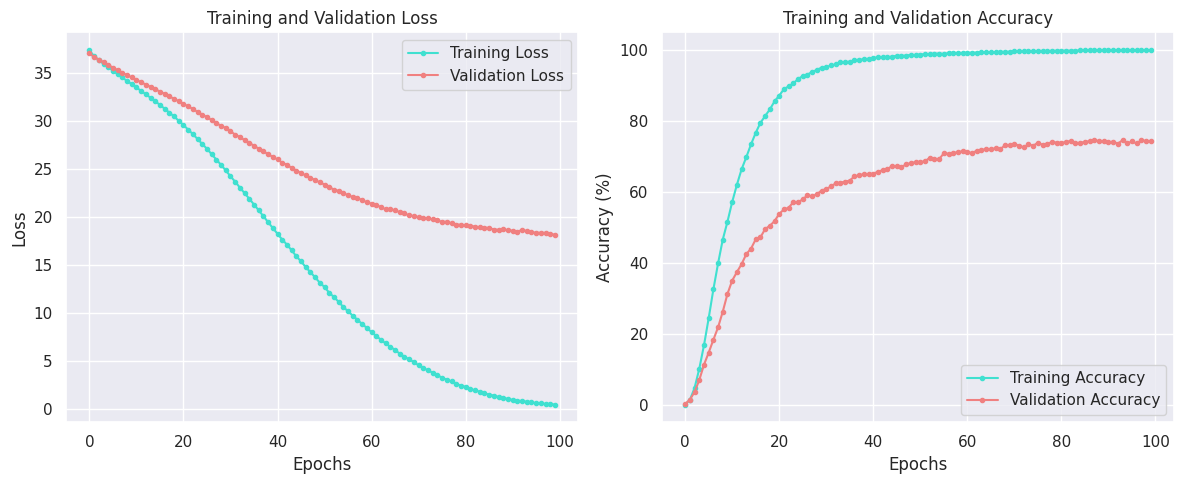

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='turquoise', marker='.')
plt.plot(val_losses, label='Validation Loss', color='lightcoral', marker='.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='turquoise', marker='.')
plt.plot(val_accuracies, label='Validation Accuracy', color='lightcoral', marker='.')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()


**оценим accuracy модели на тесте:**

In [29]:
model_arc.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Test', unit='batch'):        
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        features = model_arc(images)
        logits = features @ model_arc.weights
        loss = criterion(features, model_arc.weights, labels).mean()
        test_running_loss += loss.item()

        _, predicted = torch.max(logits.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    avg_test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test: 100%|██████████| 25/25 [00:05<00:00,  4.46batch/s]

Test Loss: 18.6386, Test Accuracy: 72.94%


**сохраним модель:**

In [30]:
checkpoint_path='/kaggle/working/runs/resnet50_with_arcface_v1_trained_100_epochs.pth'
torch.save(model_arc.state_dict(), checkpoint_path)

### 3.3. Обучение нейросети на ArcFace loss (version 2).

- **model:** resnet50 (modified - возвращает только эмбеддинги)
- **weights:** IMAGENET1K_V2
- **loss:** ArcFace loss версии 2 - с инициализацией весов в отдельном классе вычисляющим логиты 

**Выбор сети и её модификация для работы с ArcFaceLoss (version 2):**

для того чтобы можно было вычислить ArcFaceLoss делаем так, чтобы модель возвращала:
- эмбеддинг картинки - outputs предпоследнего слоя модели

при этом матрицу весов последнего слоя инициализируем в отдельном классе считающем логиты


In [33]:
from torchvision.models import resnet50, ResNet50_Weights

class ResNet50Modified(nn.Module):
    def __init__(self):
        super(ResNet50Modified, self).__init__()
        
        # Загружаем предобученную модель ResNet50
        # self.resnet = resnet50(pretrained=True) # old weights - IMAGENET1K_V1
        self.resnet = resnet50(weights=ResNet50_Weights.DEFAULT) # new weights - IMAGENET1K_V2
        
        # Извлечем информацию о размере эмбеддинга
        self.emb_size = self.resnet.fc.in_features
        
        # Удаляем последний слой (классификатор)
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])
        
    def forward(self, x):
        return self.resnet(x).squeeze()

**для того чтобы воспользоваться ArcFaceLoss изменим функцию для обучения сети:**

In [34]:
torch.autograd.set_detect_anomaly(True)

def train_model_with_arcface(
    model, 
    logits_calc,
    train_loader,
    val_loader,
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda'
):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    # Early stopping
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        # Wrap train_loader with tqdm
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            features = model(images)
            logits = logits_calc(features)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(logits.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_predictions / total_predictions
        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        # Wrap val_loader with tqdm
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                images, labels = images.to(device), labels.to(device)
                features = model(images)
                logits = logits_calc(features)
                loss = criterion(logits, labels)
                val_running_loss += loss.item()

                _, predicted = torch.max(logits.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Scheduler step
        scheduler.step(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            # Save model checkpoint
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

        print(f'Epoch [{epoch + 1} / {num_epochs}], '
              f'Train Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies

**подготовим даталоудер:**

In [35]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

**запустим обучение:**

In [36]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()


model_arc = ResNet50Modified() 
ebmb_size = model_arc.emb_size
print(f"ebmbedding size: {ebmb_size}")
n_classes = len(np.unique(images_info.image_id))
print(f"we will classify: {n_classes} classes")
print(f"device: {DEVICE}")
model_arc.to(DEVICE)

logits_calc = LogitsCalculation(ebmb_size, n_classes)
criterion = ArcFaceLoss() 
optimizer = optim.Adam(model_arc.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_losses, train_accuracies, val_losses, val_accuracies = train_model_with_arcface(
    model_arc,
    logits_calc,
    train_loader,
    val_loader, 
    criterion, 
    optimizer, 
    scheduler, 
    num_epochs=100,
    model_name="resnet50_with_arcface",
    device=DEVICE
)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]


ebmbedding size: 2048
we will classify: 500 classes
device: cuda:0


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.56batch/s]


Epoch [1 / 100], Train Loss: 29.8658, Train Accuracy: 4.01%, Validation Loss: 29.3029, Validation Accuracy: 7.77%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [2 / 100], Train Loss: 28.2726, Train Accuracy: 21.22%, Validation Loss: 27.9472, Validation Accuracy: 26.41%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [3 / 100], Train Loss: 26.8531, Train Accuracy: 41.30%, Validation Loss: 26.8944, Validation Accuracy: 40.10%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [4 / 100], Train Loss: 25.3651, Train Accuracy: 57.62%, Validation Loss: 25.8958, Validation Accuracy: 45.74%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [5 / 100], Train Loss: 23.8043, Train Accuracy: 68.07%, Validation Loss: 25.1729, Validation Accuracy: 48.67%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [6 / 100], Train Loss: 22.1097, Train Accuracy: 74.44%, Validation Loss: 23.8176, Validation Accuracy: 53.89%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.37batch/s]


Epoch [7 / 100], Train Loss: 20.4568, Train Accuracy: 77.80%, Validation Loss: 22.5574, Validation Accuracy: 57.24%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [8 / 100], Train Loss: 18.6296, Train Accuracy: 80.71%, Validation Loss: 21.4617, Validation Accuracy: 60.76%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [9 / 100], Train Loss: 16.5341, Train Accuracy: 83.72%, Validation Loss: 19.6434, Validation Accuracy: 64.96%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [10 / 100], Train Loss: 14.6644, Train Accuracy: 86.36%, Validation Loss: 18.8535, Validation Accuracy: 65.07%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [11 / 100], Train Loss: 12.8795, Train Accuracy: 87.92%, Validation Loss: 17.3681, Validation Accuracy: 68.53%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.48batch/s]


Epoch [12 / 100], Train Loss: 11.2735, Train Accuracy: 90.09%, Validation Loss: 16.5847, Validation Accuracy: 68.96%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.46batch/s]


Epoch [13 / 100], Train Loss: 9.4884, Train Accuracy: 91.60%, Validation Loss: 15.9363, Validation Accuracy: 69.86%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.47batch/s]


Epoch [14 / 100], Train Loss: 8.0471, Train Accuracy: 93.38%, Validation Loss: 14.7192, Validation Accuracy: 71.67%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [15 / 100], Train Loss: 6.6583, Train Accuracy: 94.84%, Validation Loss: 13.7687, Validation Accuracy: 74.44%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [16 / 100], Train Loss: 5.8947, Train Accuracy: 95.32%, Validation Loss: 13.4688, Validation Accuracy: 74.17%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [17 / 100], Train Loss: 5.1631, Train Accuracy: 95.67%, Validation Loss: 14.0339, Validation Accuracy: 72.26%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [18 / 100], Train Loss: 4.3538, Train Accuracy: 96.52%, Validation Loss: 13.2705, Validation Accuracy: 73.70%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [19 / 100], Train Loss: 3.6787, Train Accuracy: 96.98%, Validation Loss: 12.6783, Validation Accuracy: 74.01%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.48batch/s]


Epoch [20 / 100], Train Loss: 3.2611, Train Accuracy: 97.51%, Validation Loss: 12.7462, Validation Accuracy: 74.65%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [21 / 100], Train Loss: 2.6927, Train Accuracy: 97.82%, Validation Loss: 12.4743, Validation Accuracy: 74.23%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [22 / 100], Train Loss: 2.5914, Train Accuracy: 97.90%, Validation Loss: 13.6534, Validation Accuracy: 70.34%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [23 / 100], Train Loss: 2.4378, Train Accuracy: 98.20%, Validation Loss: 13.0337, Validation Accuracy: 72.52%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.48batch/s]


Epoch [24 / 100], Train Loss: 2.0899, Train Accuracy: 98.41%, Validation Loss: 12.5013, Validation Accuracy: 74.44%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [25 / 100], Train Loss: 1.3291, Train Accuracy: 99.13%, Validation Loss: 10.8183, Validation Accuracy: 77.85%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [26 / 100], Train Loss: 1.0058, Train Accuracy: 99.37%, Validation Loss: 10.2393, Validation Accuracy: 79.61%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.46batch/s]


Epoch [27 / 100], Train Loss: 0.8768, Train Accuracy: 99.61%, Validation Loss: 10.6655, Validation Accuracy: 78.17%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.48batch/s]


Epoch [28 / 100], Train Loss: 0.7982, Train Accuracy: 99.70%, Validation Loss: 10.5586, Validation Accuracy: 78.70%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.45batch/s]


Epoch [29 / 100], Train Loss: 0.7166, Train Accuracy: 99.72%, Validation Loss: 10.1479, Validation Accuracy: 79.29%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [30 / 100], Train Loss: 0.6532, Train Accuracy: 99.82%, Validation Loss: 10.1012, Validation Accuracy: 79.23%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.48batch/s]


Epoch [31 / 100], Train Loss: 0.6012, Train Accuracy: 99.80%, Validation Loss: 10.3303, Validation Accuracy: 78.81%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [32 / 100], Train Loss: 0.5819, Train Accuracy: 99.87%, Validation Loss: 10.4473, Validation Accuracy: 78.12%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [33 / 100], Train Loss: 0.5754, Train Accuracy: 99.89%, Validation Loss: 10.6092, Validation Accuracy: 78.27%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.46batch/s]


Epoch [34 / 100], Train Loss: 0.4845, Train Accuracy: 99.93%, Validation Loss: 10.1011, Validation Accuracy: 79.23%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.49batch/s]


Epoch [35 / 100], Train Loss: 0.4554, Train Accuracy: 99.92%, Validation Loss: 10.0088, Validation Accuracy: 79.45%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [36 / 100], Train Loss: 0.4124, Train Accuracy: 99.96%, Validation Loss: 9.8393, Validation Accuracy: 80.24%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [37 / 100], Train Loss: 0.3924, Train Accuracy: 99.95%, Validation Loss: 9.7359, Validation Accuracy: 80.24%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [38 / 100], Train Loss: 0.3756, Train Accuracy: 99.96%, Validation Loss: 9.6907, Validation Accuracy: 80.19%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [39 / 100], Train Loss: 0.3600, Train Accuracy: 99.94%, Validation Loss: 9.8101, Validation Accuracy: 79.55%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.51batch/s]


Epoch [40 / 100], Train Loss: 0.3395, Train Accuracy: 99.96%, Validation Loss: 9.9784, Validation Accuracy: 79.29%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.44batch/s]


Epoch [41 / 100], Train Loss: 0.3167, Train Accuracy: 99.95%, Validation Loss: 9.7885, Validation Accuracy: 79.39%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [42 / 100], Train Loss: 0.2918, Train Accuracy: 99.99%, Validation Loss: 9.6450, Validation Accuracy: 79.93%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.54batch/s]


Epoch [43 / 100], Train Loss: 0.2791, Train Accuracy: 99.98%, Validation Loss: 9.6224, Validation Accuracy: 80.19%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.46batch/s]


Epoch [44 / 100], Train Loss: 0.2643, Train Accuracy: 99.99%, Validation Loss: 9.5882, Validation Accuracy: 80.24%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [45 / 100], Train Loss: 0.2706, Train Accuracy: 99.96%, Validation Loss: 9.7272, Validation Accuracy: 79.55%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.53batch/s]


Epoch [46 / 100], Train Loss: 0.2535, Train Accuracy: 99.96%, Validation Loss: 9.7530, Validation Accuracy: 79.82%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.50batch/s]


Epoch [47 / 100], Train Loss: 0.2423, Train Accuracy: 99.99%, Validation Loss: 9.6706, Validation Accuracy: 79.93%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]


Epoch [48 / 100], Train Loss: 0.2412, Train Accuracy: 99.98%, Validation Loss: 9.6045, Validation Accuracy: 80.35%


Validation: 100%|██████████| 30/30 [00:06<00:00,  4.52batch/s]

Early stopping triggered.


**сохраним модель:**

In [ ]:
checkpoint_path='/kaggle/working/runs/resnet50_with_arcface_v2_trained_49_epochs.pth'
torch.save(model_arc.state_dict(), checkpoint_path)

### 3.5. Обучение нейросети на Triplet loss.

- **model:** efficientnetb1 modified - возвращает эмбеддинги
- **weights:** IMAGENET1K_V2
- **loss:** Triplet Loss версии 1 - где positives и negatives для anchor, подбираются рандомно (для positives рандом среди картинок своего класса и для negatives рандом среди объектов другого класса)

#### Подготовка кастомного Dalaset/Dataloader, для возврата тройки элементов: anchor, positive, negative

**подготовим словарь для генерации триплетов, формата:**
    
    { 
        label1: [image11, image12, ... image1M],
        label2: [image21, image22, ... image2M],
        ...
        labelN: [imageN1, imageN2, ... imageNM]
    }


In [4]:
# Группируем изображения по лейблам:
label_dict = dict(
    # images_info[images_info["segment"].isin(["train", "val"])][["image_id", "img_name"]]
    images_info[["image_id", "img_name"]]
    .groupby(["image_id"])["img_name"]
    .apply(lambda x: list(x))
)
print("число уникальных лейблов:", len(label_dict.keys()))
display({key:label_dict[key] for key in [list(label_dict.keys())[123 + i] for i in range(2)]})

число уникальных лейблов: 500


{123: ['000126.jpg',
  '001705.jpg',
  '003636.jpg',
  '011240.jpg',
  '014409.jpg',
  '015067.jpg',
  '015095.jpg',
  '021298.jpg',
  '024466.jpg',
  '027607.jpg',
  '045178.jpg',
  '049160.jpg',
  '052487.jpg',
  '060388.jpg',
  '060521.jpg',
  '065679.jpg',
  '069777.jpg',
  '083342.jpg',
  '111756.jpg',
  '114163.jpg',
  '118921.jpg',
  '119577.jpg',
  '122731.jpg',
  '124230.jpg',
  '130233.jpg',
  '137821.jpg',
  '147157.jpg',
  '148340.jpg',
  '158760.jpg'],
 124: ['000127.jpg',
  '014666.jpg',
  '019008.jpg',
  '023485.jpg',
  '028655.jpg',
  '031462.jpg',
  '045846.jpg',
  '048410.jpg',
  '055900.jpg',
  '085286.jpg',
  '103181.jpg',
  '103349.jpg',
  '119253.jpg',
  '122748.jpg',
  '128986.jpg',
  '141652.jpg',
  '158451.jpg']}

**функция, которая генерирует триплеты:**

In [5]:
import random

def create_triplets(label_dict):
    
    triplets = []
    
    for anchor_label in label_dict.keys():
        anchor_images = label_dict[anchor_label]
        
        for anchor in anchor_images:
            # Положительный пример (из того же класса)
            positive = random.choice(anchor_images)
            while positive is anchor:  # Убедимся, что это не то же самое изображение
                positive = random.choice(anchor_images)

            # Отрицательный пример (из другого класса)
            negative_label = random.choice(list(label_dict.keys()))
            while negative_label == anchor_label:  # Убедимся, что это другой класс
                negative_label = random.choice(list(label_dict.keys()))
            negative = random.choice(label_dict[negative_label])
            
            triplets.append((anchor, anchor_label, positive, anchor_label, negative, negative_label))
    
    return triplets

triplets_df = pd.DataFrame(create_triplets(label_dict), columns=["anchor", "id1", "pos", "id2", "neg", "id3"])
# print(f"{triplets_df.shape[0]} x {triplets_df.shape[1]}")
triplets_df = pd.merge(
    images_info.rename(columns={"img_name":"anchor"})[["segment", "anchor"]],
    triplets_df,
    on=["anchor"]
)
triplets_df
# print(f"\ndistribution by segment:")
# display(triplets_df["segment"].value_counts())

segment      anchor  id1         pos  id2         neg  id3
0       train  000001.jpg    0  053184.jpg    0  052143.jpg  437
1       train  000404.jpg    0  039393.jpg    0  050274.jpg  207
2       train  003415.jpg    0  000404.jpg    0  034633.jpg  451
3       train  004390.jpg    0  122439.jpg    0  105815.jpg  478
4       train  018062.jpg    0  027771.jpg    0  083349.jpg  202
...       ...         ...  ...         ...  ...         ...  ...
12006     val  126297.jpg  499  112927.jpg  499  136115.jpg  400
12007    test  129725.jpg  499  089001.jpg  499  083026.jpg  266
12008    test  132679.jpg  499  112927.jpg  499  076880.jpg  321
12009    test  151415.jpg  499  050098.jpg  499  100909.jpg  164
12010    test  154504.jpg  499  000519.jpg  499  016730.jpg   52

[12011 rows x 7 columns]

**перемешаем триплеты из train и val и создадим из них новые train и val, test оставим как есть:**

In [6]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(triplets_df[triplets_df.segment.isin(["train", "val"])], test_size=0.15, random_state=123, shuffle=True)
test = triplets_df[triplets_df.segment == "test"]

print(f"train size: {train.shape[0]} x {train.shape[1]}")
display(train.head())

print(f"\nval size: {val.shape[0]} x {val.shape[1]}")
display(val.head())

print(f"\ntrain and val datasets overlap: {bool(set(train.index).intersection(val.index))}")

print(f"\ntest size: {test.shape[0]} x {test.shape[1]}")
display(test.head())

train size: 8858 x 7


segment      anchor  id1         pos  id2         neg  id3
9799   train  082734.jpg  407  083980.jpg  407  138466.jpg  404
6288     val  108585.jpg  252  033922.jpg  252  149191.jpg   64
8229   train  007350.jpg  340  112358.jpg  340  044498.jpg  112
8375   train  060110.jpg  345  081234.jpg  345  092315.jpg  309
2851   train  064694.jpg  112  061288.jpg  112  008879.jpg  233


val size: 1564 x 7


segment      anchor  id1         pos  id2         neg  id3
11791   train  022055.jpg  490  129264.jpg  490  026847.jpg  435
11507   train  080059.jpg  478  092038.jpg  478  064768.jpg  459
11662   train  078402.jpg  484  111798.jpg  484  101798.jpg   25
8825      val  140121.jpg  363  053440.jpg  363  162423.jpg  367
6557    train  091877.jpg  264  079288.jpg  264  066963.jpg  296


train and val datasets overlap: False

test size: 1589 x 7


segment      anchor  id1         pos  id2         neg  id3
26    test  131731.jpg    0  061431.jpg    0  044206.jpg  440
27    test  134007.jpg    0  027771.jpg    0  088074.jpg  155
28    test  139106.jpg    0  049142.jpg    0  102480.jpg  432
29    test  140935.jpg    0  058188.jpg    0  089617.jpg  115
56    test  120280.jpg    1  055891.jpg    1  000027.jpg   26

**создадим дадалоудер:**

In [7]:
class TripleDataset(Dataset):
    def __init__(self, triplets, images_dir, mode):            
        self.triplets = triplets
        self.images_dir = images_dir
        self.mode = mode
        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

    def crop(self, img):
            # cropping image:
            image = np.array(img)
            return Image.fromarray(image[77:-41, 45:-50])

    def __len__(self):
        return len(self.triplets)

    def __getitem__(self, idx):
      
        anchor_path = os.path.join(self.images_dir, self.triplets.iloc[idx]['anchor'])
        pos_path = os.path.join(self.images_dir, self.triplets.iloc[idx]['pos'])
        neg_path = os.path.join(self.images_dir, self.triplets.iloc[idx]['neg'])

        if self.mode == 'train':
            transform = transforms.Compose([
                transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
                transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
                transforms.RandomResizedCrop(RESCALE_SIZE, scale=(0.8, 1.0)),  # Random crop with slight zoom-in effect
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
        else:
            transform = transforms.Compose([
                transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
            
        anchor = transform(self.crop(Image.open(anchor_path)).convert('RGB'))
        positive = transform(self.crop(Image.open(pos_path)).convert('RGB'))
        negative = transform(self.crop(Image.open(neg_path)).convert('RGB'))

        return anchor, positive, negative


BATCH_SIZE = 32

train_dataset = TripleDataset(train, images_dir, "train")
val_dataset = TripleDataset(val, images_dir, "val")
test_dataset = TripleDataset(test, images_dir, "test")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

for anchors, positives, negatives in train_loader:
    print("Anchor batch shape:", anchors.shape)
    print("Positive batch shape:", positives.shape)
    print("Negative batch shape:", negatives.shape)
    break  

Anchor batch shape: torch.Size([64, 3, 224, 224])
Positive batch shape: torch.Size([64, 3, 224, 224])
Negative batch shape: torch.Size([64, 3, 224, 224])


**убедимся, что данные подготовлены корректно:**

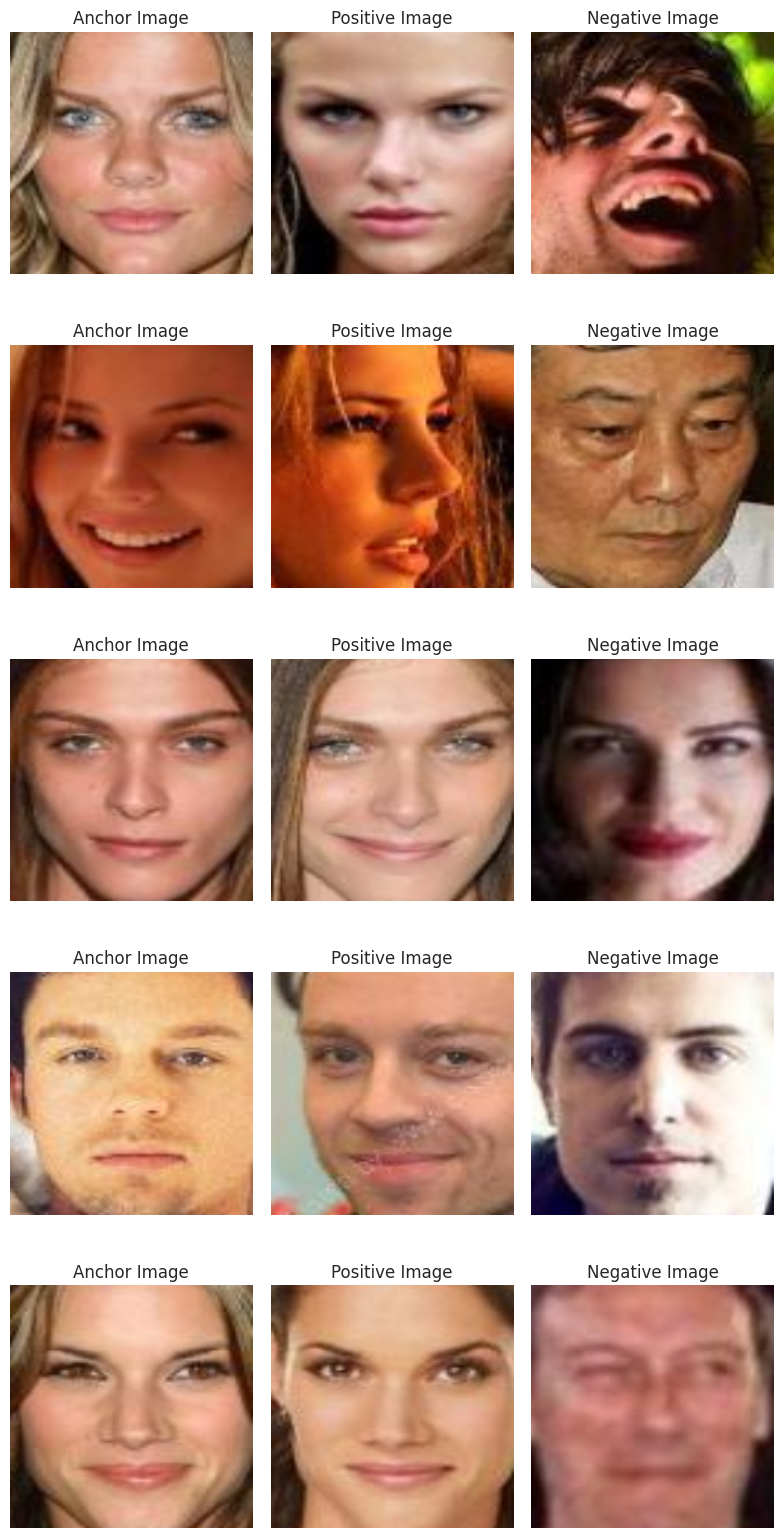

In [8]:
samples = next(iter(val_loader))  
anchors, positives, negatives = samples

anchors = anchors.permute(0, 2, 3, 1).numpy() 
positives = positives.permute(0, 2, 3, 1).numpy()
negatives = negatives.permute(0, 2, 3, 1).numpy()

anchors = (anchors - anchors.min()) / (anchors.max() - anchors.min())
positives = (positives - positives.min()) / (positives.max() - positives.min())
negatives = (negatives - negatives.min()) / (negatives.max() - negatives.min())

f, axarr = plt.subplots(5, 3, figsize=(8, 16))

for i in range(5):
    axarr[i, 0].imshow(anchors[i])
    axarr[i, 0].title.set_text('Anchor Image')
    axarr[i, 0].axis('off')

    axarr[i, 1].imshow(positives[i])
    axarr[i, 1].title.set_text('Positive Image')
    axarr[i, 1].axis('off')
    
    axarr[i, 2].imshow(negatives[i])
    axarr[i, 2].title.set_text('Negative Image')
    axarr[i, 2].axis('off')

plt.tight_layout()
plt.show()

#### Реализация TripletLoss:

In [9]:
class TripletLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        pos_distance = F.pairwise_distance(anchor, positive)  
        neg_distance = F.pairwise_distance(anchor, negative)  
        
        loss = torch.mean(F.relu(pos_distance - neg_distance + self.margin))
        return loss

#### Обучение нейросети с TripletLoss:
**Выберем сеть для обучения:**

In [11]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights

class EfficientNetModified(nn.Module):
    def __init__(self):
        super(EfficientNetModified, self).__init__()
        
        # Загружаем предобученную модель efficientnet_b1
        self.net = models.efficientnet_b1(weights=EfficientNet_B1_Weights.DEFAULT)
        
        # Удаляем последний слой (классификатор)
        self.net = nn.Sequential(*list(self.net.children())[:-1])

    def forward(self, anchor, positive, negative):
            output_anchor = self.net(anchor).squeeze()
            output_positive = self.net(positive).squeeze()
            output_negative = self.net(negative).squeeze()
            return output_anchor, output_positive, output_negative

**для того чтобы воспользоваться TripletLoss изменим функцию для вычисления эмбеддингов:**

In [14]:
def compute_embeddings(model, images_list):
    '''
    compute embeddings from the trained model for list of images.
    params:
        model: trained nn model that takes images and outputs embeddings
        images_list: list of images paths to compute embeddings for
    output:
        array: array of model embeddings. Each embedding corresponds to images
              names from images_list
    '''

    model.eval()
    embeddings = []
    
    transform = transforms.Compose([
        transforms.Resize((RESCALE_SIZE, RESCALE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    with torch.no_grad():
        for image_name in images_list:
            image = Image.open(image_name)
            image = transform(image.convert('RGB'))
            embedding = model(image.unsqueeze(0).to(DEVICE))
            normalized_output = F.normalize(embedding.squeeze((2, 3)))
            embeddings.append(normalized_output.cpu().numpy())
    
    return np.concatenate(embeddings)

**а так же изменим функцию для обучения сети:**

In [15]:
def train_model_with_triplet(
    model, 
    train_loader,
    val_loader,
    query_dict,
    query_imgs,
    query_names,
    distractors_imgs,
    criterion,
    optimizer, 
    scheduler, 
    num_epochs=100, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="", 
    device='cuda',
    fpr=0.01
):
    
    train_losses, val_losses = [], []
    
    best_val_loss = float('inf')
    counter = 0
    
    for epoch in range(num_epochs):
        model.train()  
        total_train_loss = 0.0
        for i, data in enumerate(tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}')):
            img0, img1, img2 = data 
            img0, img1, img2 = img0.to(device), img1.to(device), img2.to(device)

            optimizer.zero_grad()
            output1, output2, output3 = model(img0, img1, img2)  

            loss_contrastive = criterion(output1, output2, output3)
            loss_contrastive.backward()
            optimizer.step()

            total_train_loss += loss_contrastive.item()

        avg_train_loss = total_train_loss / len(train_loader)
        # print(f"Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}")
        train_losses.append(avg_train_loss)
        
        model.eval()  
        total_val_loss = 0.0
        with torch.no_grad():
            for i, data in enumerate(tqdm(test_loader, desc=f'Validating Epoch {epoch + 1}/{num_epochs}')):
                img0, img1, img2 = data  
                img0, img1, img2 = img0.to(device), img1.to(device), img2.to(device)

                output1, output2, output3 = model(img0, img1, img2)  

                val_loss_contrastive = criterion(output1, output2, output3)
                total_val_loss += val_loss_contrastive.item()

        avg_val_loss = total_val_loss / len(test_loader)
        # print(f"Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}")
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch + 1} / {num_epochs}], Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}')

        scheduler.step(avg_val_loss)

        if (epoch + 1) % 2 == 0:
            query_embeddings = compute_embeddings(model.net, query_imgs)
            distractor_embeddings = compute_embeddings(model.net, distractors_imgs)
            
            cosine_query_pos = compute_cosine_query_pos(query_dict, query_names, query_embeddings)
            cosine_query_neg = compute_cosine_query_neg(query_dict, query_names, query_embeddings)
            cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractor_embeddings)

            threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr)
            print(f"at FPR = {fpr}: threshold = {threshold:.3}; TPR = {tpr:.3}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            torch.save(model.state_dict(), checkpoint_path + f"{model_name}_{epoch + 1}.pth")
        else:
            counter += 1
            print(f'No improvement in validation loss for {counter} epochs.')

        if counter >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break
        
    return train_losses, val_losses

**создадим директорию для сохранения чекпоинтов модели:**

In [16]:
directory = '/kaggle/working/runs'
os.makedirs(directory, exist_ok=True)

**запустим обучение:**

In [38]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()

model_triplet = EfficientNetModified() 
print(f"device: {DEVICE}")
model_triplet.to(DEVICE)

criterion = TripletLoss() 
optimizer = optim.Adam(model_triplet.parameters(), lr=0.001)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

train_model_with_triplet(
    model_triplet, 
    train_loader,
    val_loader,
    query_dict,
    query_img_paths,
    query_img_names, 
    distractors_img_paths,
    criterion,
    optimizer, 
    scheduler, 
    num_epochs=50, 
    patience=5, 
    checkpoint_path='/kaggle/working/runs/', 
    model_name="efficientnetb1_with_triplet", 
    device=DEVICE,
    # fpr=0.01
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


device: cuda:0


Validating Epoch 1/50: 100%|██████████| 50/50 [00:10<00:00,  4.72it/s]


Epoch [1 / 50], Train Loss: 0.8628, Validation Loss: 0.5387


Validating Epoch 2/50: 100%|██████████| 50/50 [00:10<00:00,  4.67it/s]


Epoch [2 / 50], Train Loss: 0.4933, Validation Loss: 0.4398
Threshold for FPR=0.01: 0.8471674919128418, TPR: 0.22131648665172202


Validating Epoch 3/50: 100%|██████████| 50/50 [00:10<00:00,  4.73it/s]


Epoch [3 / 50], Train Loss: 0.3513, Validation Loss: 0.4198


Validating Epoch 4/50: 100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Epoch [4 / 50], Train Loss: 0.3035, Validation Loss: 0.4170
Threshold for FPR=0.01: 0.8535552024841309, TPR: 0.2522926431628286


Validating Epoch 5/50: 100%|██████████| 50/50 [00:10<00:00,  4.74it/s]


Epoch [5 / 50], Train Loss: 0.2394, Validation Loss: 0.3973


Validating Epoch 6/50: 100%|██████████| 50/50 [00:10<00:00,  4.72it/s]


Epoch [6 / 50], Train Loss: 0.2012, Validation Loss: 0.4054
Threshold for FPR=0.01: 0.8533717393875122, TPR: 0.24482032470620202
No improvement in validation loss for 1 epochs.


Validating Epoch 7/50: 100%|██████████| 50/50 [00:10<00:00,  4.69it/s]


Epoch [7 / 50], Train Loss: 0.1947, Validation Loss: 0.3426


Validating Epoch 8/50: 100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


Epoch [8 / 50], Train Loss: 0.1477, Validation Loss: 0.3525
Threshold for FPR=0.01: 0.8650611042976379, TPR: 0.2347666598736499
No improvement in validation loss for 1 epochs.


Validating Epoch 9/50: 100%|██████████| 50/50 [00:10<00:00,  4.68it/s]


Epoch [9 / 50], Train Loss: 0.1448, Validation Loss: 0.4464
No improvement in validation loss for 2 epochs.


Validating Epoch 10/50: 100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


Epoch [10 / 50], Train Loss: 0.1392, Validation Loss: 0.3407
Threshold for FPR=0.01: 0.8563227653503418, TPR: 0.2480130425922152


Validating Epoch 11/50: 100%|██████████| 50/50 [00:10<00:00,  4.73it/s]


Epoch [11 / 50], Train Loss: 0.1297, Validation Loss: 0.3692
No improvement in validation loss for 1 epochs.


Validating Epoch 12/50: 100%|██████████| 50/50 [00:10<00:00,  4.71it/s]


Epoch [12 / 50], Train Loss: 0.1082, Validation Loss: 0.3520
Threshold for FPR=0.01: 0.854149580001831, TPR: 0.26669383873378166
No improvement in validation loss for 2 epochs.


Validating Epoch 13/50: 100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


Epoch [13 / 50], Train Loss: 0.1005, Validation Loss: 0.3813
No improvement in validation loss for 3 epochs.


Validating Epoch 14/50: 100%|██████████| 50/50 [00:11<00:00,  4.50it/s]


Epoch [14 / 50], Train Loss: 0.0593, Validation Loss: 0.3036
Threshold for FPR=0.01: 0.8499462604522705, TPR: 0.2977379254126758


Validating Epoch 15/50: 100%|██████████| 50/50 [00:10<00:00,  4.61it/s]


Epoch [15 / 50], Train Loss: 0.0349, Validation Loss: 0.3012


Validating Epoch 16/50: 100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


Epoch [16 / 50], Train Loss: 0.0288, Validation Loss: 0.3015
Threshold for FPR=0.01: 0.8477474451065063, TPR: 0.2945452075266626
No improvement in validation loss for 1 epochs.


Validating Epoch 17/50: 100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


Epoch [17 / 50], Train Loss: 0.0251, Validation Loss: 0.2961


Validating Epoch 18/50: 100%|██████████| 50/50 [00:10<00:00,  4.59it/s]


Epoch [18 / 50], Train Loss: 0.0353, Validation Loss: 0.3026
Threshold for FPR=0.01: 0.8418897390365601, TPR: 0.30758779974186534
No improvement in validation loss for 1 epochs.


Validating Epoch 19/50: 100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Epoch [19 / 50], Train Loss: 0.0265, Validation Loss: 0.3241
No improvement in validation loss for 2 epochs.


Validating Epoch 20/50: 100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


Epoch [20 / 50], Train Loss: 0.0260, Validation Loss: 0.2964
Threshold for FPR=0.01: 0.8481854200363159, TPR: 0.3190000679301678
No improvement in validation loss for 3 epochs.


Validating Epoch 21/50: 100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


Epoch [21 / 50], Train Loss: 0.0180, Validation Loss: 0.2672


Validating Epoch 22/50: 100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Epoch [22 / 50], Train Loss: 0.0134, Validation Loss: 0.2690
Threshold for FPR=0.01: 0.8492158651351929, TPR: 0.3240948305142314
No improvement in validation loss for 1 epochs.


Validating Epoch 23/50: 100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


Epoch [23 / 50], Train Loss: 0.0129, Validation Loss: 0.2621


Validating Epoch 24/50: 100%|██████████| 50/50 [00:11<00:00,  4.54it/s]


Epoch [24 / 50], Train Loss: 0.0087, Validation Loss: 0.2683
Threshold for FPR=0.01: 0.8472092151641846, TPR: 0.31607907071530467
No improvement in validation loss for 1 epochs.


Validating Epoch 25/50: 100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


Epoch [25 / 50], Train Loss: 0.0088, Validation Loss: 0.2777
No improvement in validation loss for 2 epochs.


Validating Epoch 26/50: 100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Epoch [26 / 50], Train Loss: 0.0105, Validation Loss: 0.2842
Threshold for FPR=0.01: 0.8491005301475525, TPR: 0.31275049249371645
No improvement in validation loss for 3 epochs.


Validating Epoch 27/50: 100%|██████████| 50/50 [00:11<00:00,  4.53it/s]


Epoch [27 / 50], Train Loss: 0.0088, Validation Loss: 0.2727
No improvement in validation loss for 4 epochs.


Validating Epoch 28/50: 100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


Epoch [28 / 50], Train Loss: 0.0098, Validation Loss: 0.2572
Threshold for FPR=0.01: 0.8497626781463623, TPR: 0.3242306908498064


Validating Epoch 29/50: 100%|██████████| 50/50 [00:11<00:00,  4.43it/s]


Epoch [29 / 50], Train Loss: 0.0050, Validation Loss: 0.2580
No improvement in validation loss for 1 epochs.


Validating Epoch 30/50: 100%|██████████| 50/50 [00:11<00:00,  4.46it/s]


Epoch [30 / 50], Train Loss: 0.0033, Validation Loss: 0.2573
Threshold for FPR=0.01: 0.8475131988525391, TPR: 0.31927178860131783
No improvement in validation loss for 2 epochs.


Validating Epoch 31/50: 100%|██████████| 50/50 [00:11<00:00,  4.45it/s]


Epoch [31 / 50], Train Loss: 0.0029, Validation Loss: 0.2528


Training Epoch 32/50:  18%|█▊        | 50/277 [00:33<02:34,  1.47it/s]


KeyboardInterrupt: 

**Посчитаем Identification Rate Metric для значений fpr = [0.5, 0.2, 0.1, 0.05, 0.01].**

In [39]:
query_embeddings = compute_embeddings(model_triplet.net, query_img_paths)
distractor_embeddings = compute_embeddings(model_triplet.net, distractors_img_paths)
print(f"query_embeddings.shape: {query_embeddings.shape}")
print(f"distractor_embeddings.shape: {distractor_embeddings.shape}")

cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, query_embeddings)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractor_embeddings)

for fpr in [0.5, 0.2, 0.1, 0.05, 0.01]:
    threshold, tpr = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    print(f"at FPR = {fpr}: threshold = {threshold:.3}, TPR = {tpr:.3}")

query_embeddings.shape: (1222, 1280)
distractor_embeddings.shape: (2001, 1280)
at FPR = 0.5: threshold = 0.343, TPR = 0.994
at FPR = 0.2: threshold = 0.628, TPR = 0.896
at FPR = 0.1: threshold = 0.715, TPR = 0.757
at FPR = 0.05: threshold = 0.77, TPR = 0.606
at FPR = 0.01: threshold = 0.847, TPR = 0.32
